In [2]:
import matplotlib.pyplot as plt

In [3]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib as mpl  

In [4]:
pd.options.display.max_rows = 200

In [5]:
burden_dict = \
{'E_P_GBM454': 2.567235,
 'J_R_SMTB781': 3.4093850000000003,
 'X_R_SMTB302': 4.067572,
 'B_R_GBM898': 4.9197310000000005,
 'D_P_GBM620': 6.767882999999999,
 'X_R_SMTB135': 7.804867999999999,
 'X_P_GBM618': 8.284311000000002,
 'C_R_GBM781': 23.332295,
 'B_P_GBM593': 38.391685999999986,
 'A_R_GBM607': 46.18504800000001,
 'H_P_GBM529': 58.749589,
 'C_RR_GBM937': 62.922092,
 'A_RR_GBM809': 75.85607500000002,
 'J_P_GBM703': 78.30020900000001,
 'D_R_GBM691': 80.84621199999998,
 'X_P_GBM672': 100.40625700000002,
 'I_P_BT2013110': 104.15168,
 'E_R_GBM833': 135.700069,
 'G_P_GBM401': 141.95874999999995,
 'I_R_GBM745': 183.607591,
 'X_P_GBM440': 186.296958,
 'X_P_GBM577': 274.53248799999994,
 'X_R_SMTB814': 288.11394000000007,
 'X_R_SMTB241': 351.32789599999995,
 'G_RR_GBM551': 373.39768200000003,
 'X_P_SMTB123': 384.9045270000001,
 'G_R_GBM498': 405.05991099999994,
 'F_R_GBM492': 488.609452,
 'F_P_GBM460': 509.9145350000001,
 'X_R_GBM945': 582.347414,
 'H_R_GBM832': 696.6370109999999}

In [6]:
low_burden_sample_id = list(burden_dict.keys())[:15]
high_burden_sample_id = list(burden_dict.keys())[15:]

In [7]:
def calculate_total_coverage(df):
    
    if len(df) == 0:
        
        return 0
    
    # Ensure the dataframe is sorted by the start of intervals
    df_sorted = df.sort_values(by='POS')
    
    # Initialize the variables to track the merged intervals
    merged_start = df_sorted.iloc[0]['POS']
    merged_end = df_sorted.iloc[0]['END']
    total_coverage = 0
    
    # Iterate over the sorted dataframe
    for _, row in df_sorted.iterrows():
        current_start, current_end = row['POS'], row['END']
        
        # If the current interval overlaps with the merged interval, extend the merged interval
        if current_start <= merged_end:
            merged_end = max(merged_end, current_end)
        else:
            # No overlap, finalize the current merged interval
            total_coverage += merged_end - merged_start
            # Start a new merged interval
            merged_start, merged_end = current_start, current_end
    
    # Add the last interval to total coverage
    total_coverage += merged_end - merged_start
    
    return total_coverage

In [8]:
chromosomes = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', \
               'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', \
               'chr21', 'chr22', 'chrX']

## Large deletions

In [9]:
### Load filtered large deletions ###

##
somatic_large_DEL_path = '/Users/ryanyutian/Desktop/Manuscript/filtered_sv/DEL/'

somatic_large_DEL_dfs = {}

os.chdir(somatic_large_DEL_path)

temp_files = sorted([i for i in os.listdir(somatic_large_DEL_path) if 'DS' not in i])

for file_name in temp_files:
        
    somatic_large_DEL_dfs[file_name[:-4]] = pd.read_csv(file_name)

In [10]:
list(somatic_large_DEL_dfs.keys())

['A_RR_GBM809_DEL',
 'A_R_GBM607_DEL',
 'B_P_GBM593_DEL',
 'B_R_GBM898_DEL',
 'C_RR_GBM937_DEL',
 'C_R_GBM781_DEL',
 'D_P_GBM620_DEL',
 'D_R_GBM691_DEL',
 'E_P_GBM454_DEL',
 'E_R_GBM833_DEL',
 'F_P_GBM460_DEL',
 'F_R_GBM492_DEL',
 'G_P_GBM401_DEL',
 'G_RR_GBM551_DEL',
 'G_R_GBM498_DEL',
 'H_P_GBM529_DEL',
 'H_R_GBM832_DEL',
 'I_P_BT2013110_DEL',
 'I_R_GBM745_DEL',
 'J_P_GBM703_DEL',
 'J_R_SMTB781_DEL',
 'X_P_GBM440_DEL',
 'X_P_GBM577_DEL',
 'X_P_GBM618_DEL',
 'X_P_GBM672_DEL',
 'X_P_SMTB123_DEL',
 'X_R_GBM945_DEL',
 'X_R_SMTB135_DEL',
 'X_R_SMTB241_DEL',
 'X_R_SMTB302_DEL',
 'X_R_SMTB814_DEL']

In [11]:
large_DEL_burden_per_chrom_dicts = {}

for df_name in somatic_large_DEL_dfs:
    
    temp_output_dict = {}
    
    temp_df = somatic_large_DEL_dfs[df_name]
    
    for chrom in chromosomes:
        
        temp_chrom_df = temp_df[temp_df['CHROM']==chrom]
        
        temp_output_dict[chrom] = calculate_total_coverage(temp_chrom_df)/1e6
        
    large_DEL_burden_per_chrom_dicts[df_name + '_burden_by_chrom'] = temp_output_dict

In [12]:
large_DEL_burden_per_chrom_dicts

{'A_RR_GBM809_DEL_burden_by_chrom': {'chr1': 0.0,
  'chr2': 0.0,
  'chr3': 0.0,
  'chr4': 0.0,
  'chr5': 0.0,
  'chr6': 0.0,
  'chr7': 0.1,
  'chr8': 0.0,
  'chr9': 0.0,
  'chr10': 0.066223,
  'chr11': 2.57,
  'chr12': 0.031164,
  'chr13': 1.272043,
  'chr14': 0.59,
  'chr15': 0.0,
  'chr16': 0.0,
  'chr17': 0.0,
  'chr18': 0.0,
  'chr19': 0.0,
  'chr20': 0.0,
  'chr21': 0.0,
  'chr22': 0.0,
  'chrX': 0.0},
 'A_R_GBM607_DEL_burden_by_chrom': {'chr1': 0.0,
  'chr2': 0.0,
  'chr3': 0.0,
  'chr4': 0.0,
  'chr5': 0.0,
  'chr6': 0.0,
  'chr7': 0.03007,
  'chr8': 0.0,
  'chr9': 0.0,
  'chr10': 0.0,
  'chr11': 0.0,
  'chr12': 0.0,
  'chr13': 0.0,
  'chr14': 0.0,
  'chr15': 0.0,
  'chr16': 0.0,
  'chr17': 0.0,
  'chr18': 0.0,
  'chr19': 0.04647,
  'chr20': 0.0,
  'chr21': 0.0,
  'chr22': 0.0,
  'chrX': 0.0},
 'B_P_GBM593_DEL_burden_by_chrom': {'chr1': 0.11,
  'chr2': 0.0,
  'chr3': 0.0,
  'chr4': 0.0,
  'chr5': 0.0,
  'chr6': 0.23,
  'chr7': 0.090319,
  'chr8': 0.0,
  'chr9': 0.0,
  'chr10': 0

In [13]:
for chrom in chromosomes:
    
    print(chrom)
    temp_low_burden_by_chrom = []
    temp_high_burden_by_chrom = []
    
    ###
    for s_id in low_burden_sample_id:
        
        temp_low_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])
    
    ###
    for s_id in high_burden_sample_id:
        
        temp_high_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])

        
    # Check for normality
    _, p1 = stats.shapiro(temp_low_burden_by_chrom)
    _, p2 = stats.shapiro(temp_high_burden_by_chrom)
    print("Normality Test P-values: Group1 =", p1, ", Group2 =", p2)

    # Check for equal variances
    _, p_levene = stats.levene(temp_low_burden_by_chrom, temp_high_burden_by_chrom)
    print("Levene's Test P-value:", p_levene)


chr1
Normality Test P-values: Group1 = 7.463747806468746e-07 , Group2 = 8.446178298981977e-07
Levene's Test P-value: 0.14459729720531458
chr2
Normality Test P-values: Group1 = 1.1264031485325177e-07 , Group2 = 2.0518269593594596e-05
Levene's Test P-value: 0.0764250403237676
chr3
Normality Test P-values: Group1 = 1.7783443126972998e-06 , Group2 = 2.734838744800072e-05
Levene's Test P-value: 0.13155678618283045
chr4
Normality Test P-values: Group1 = 8.183802719941013e-07 , Group2 = 1.4396158576346352e-06
Levene's Test P-value: 0.35641511670081594
chr5
Normality Test P-values: Group1 = 1.5327399523812346e-05 , Group2 = 1.77468677975412e-06
Levene's Test P-value: 0.11513821532159305
chr6
Normality Test P-values: Group1 = 3.167109809965041e-07 , Group2 = 2.1805819415021688e-05
Levene's Test P-value: 0.05127553806872009
chr7
Normality Test P-values: Group1 = 0.00045475998194888234 , Group2 = 2.6511845135246404e-05
Levene's Test P-value: 0.49817300347486937
chr8
Normality Test P-values: Group

chr1
t-statistic: -1.558984045416641
p-value: 0.13981936493588637


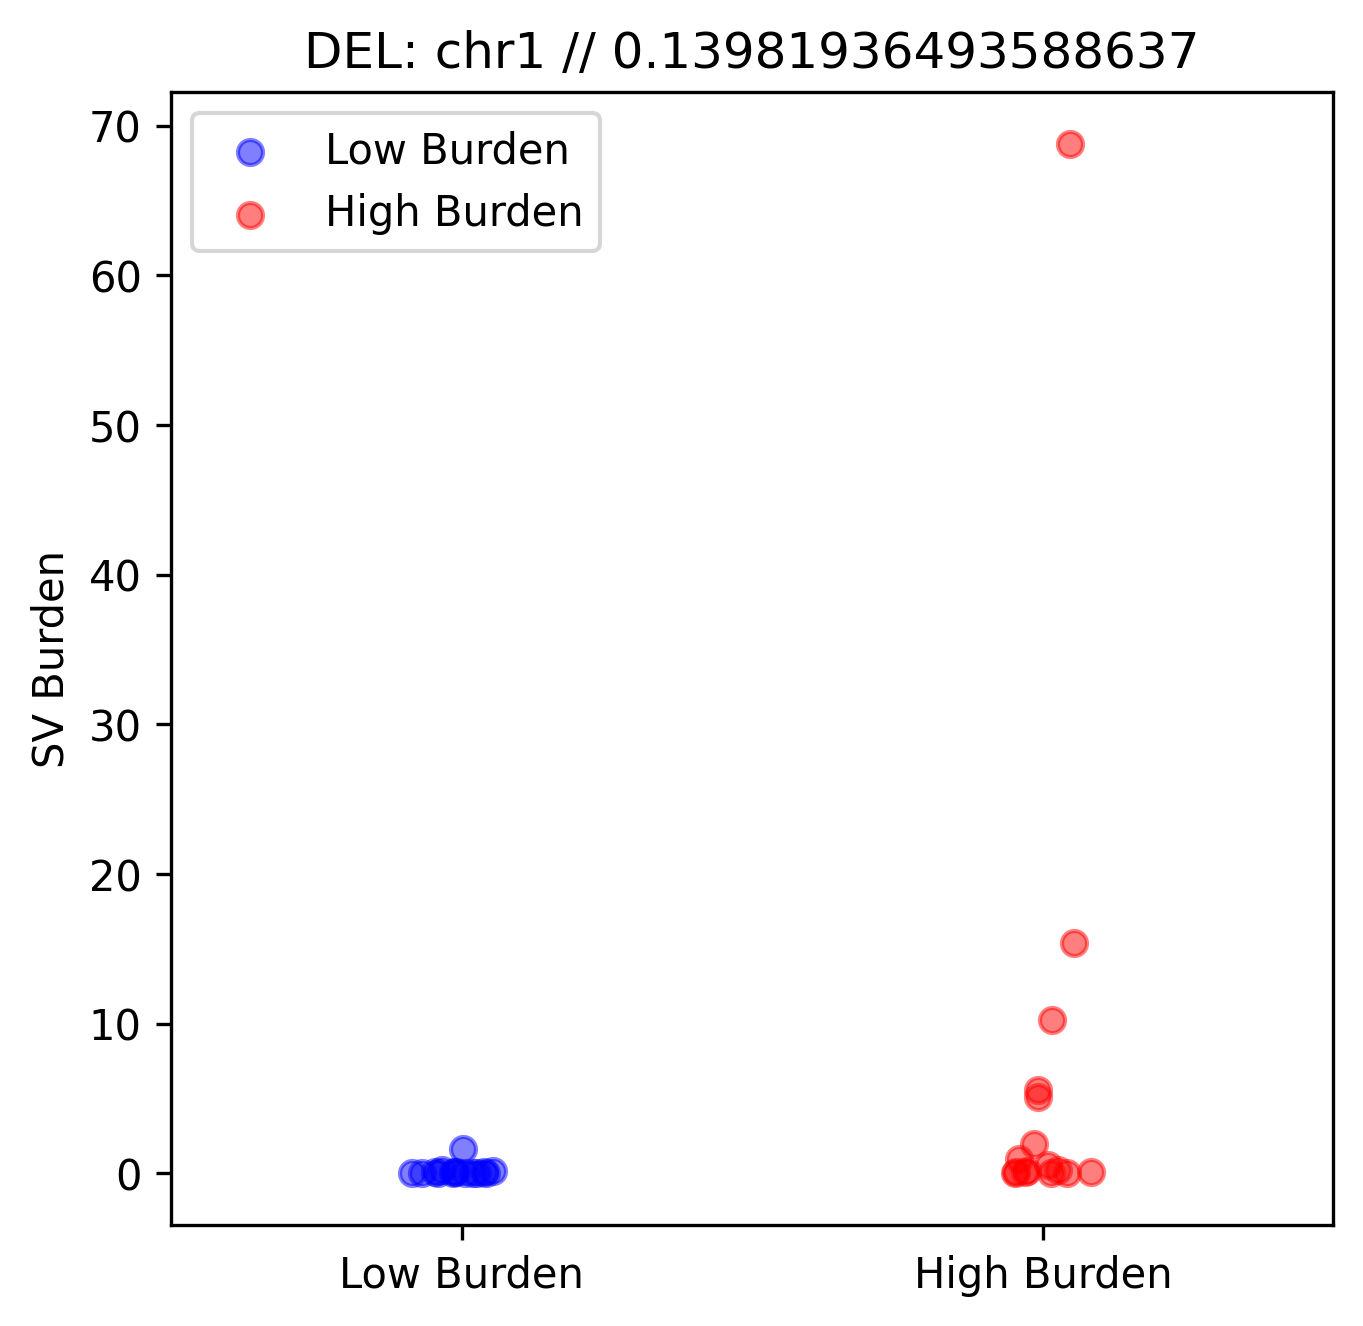

chr2
t-statistic: -1.8834655944625014
p-value: 0.07706071892065636


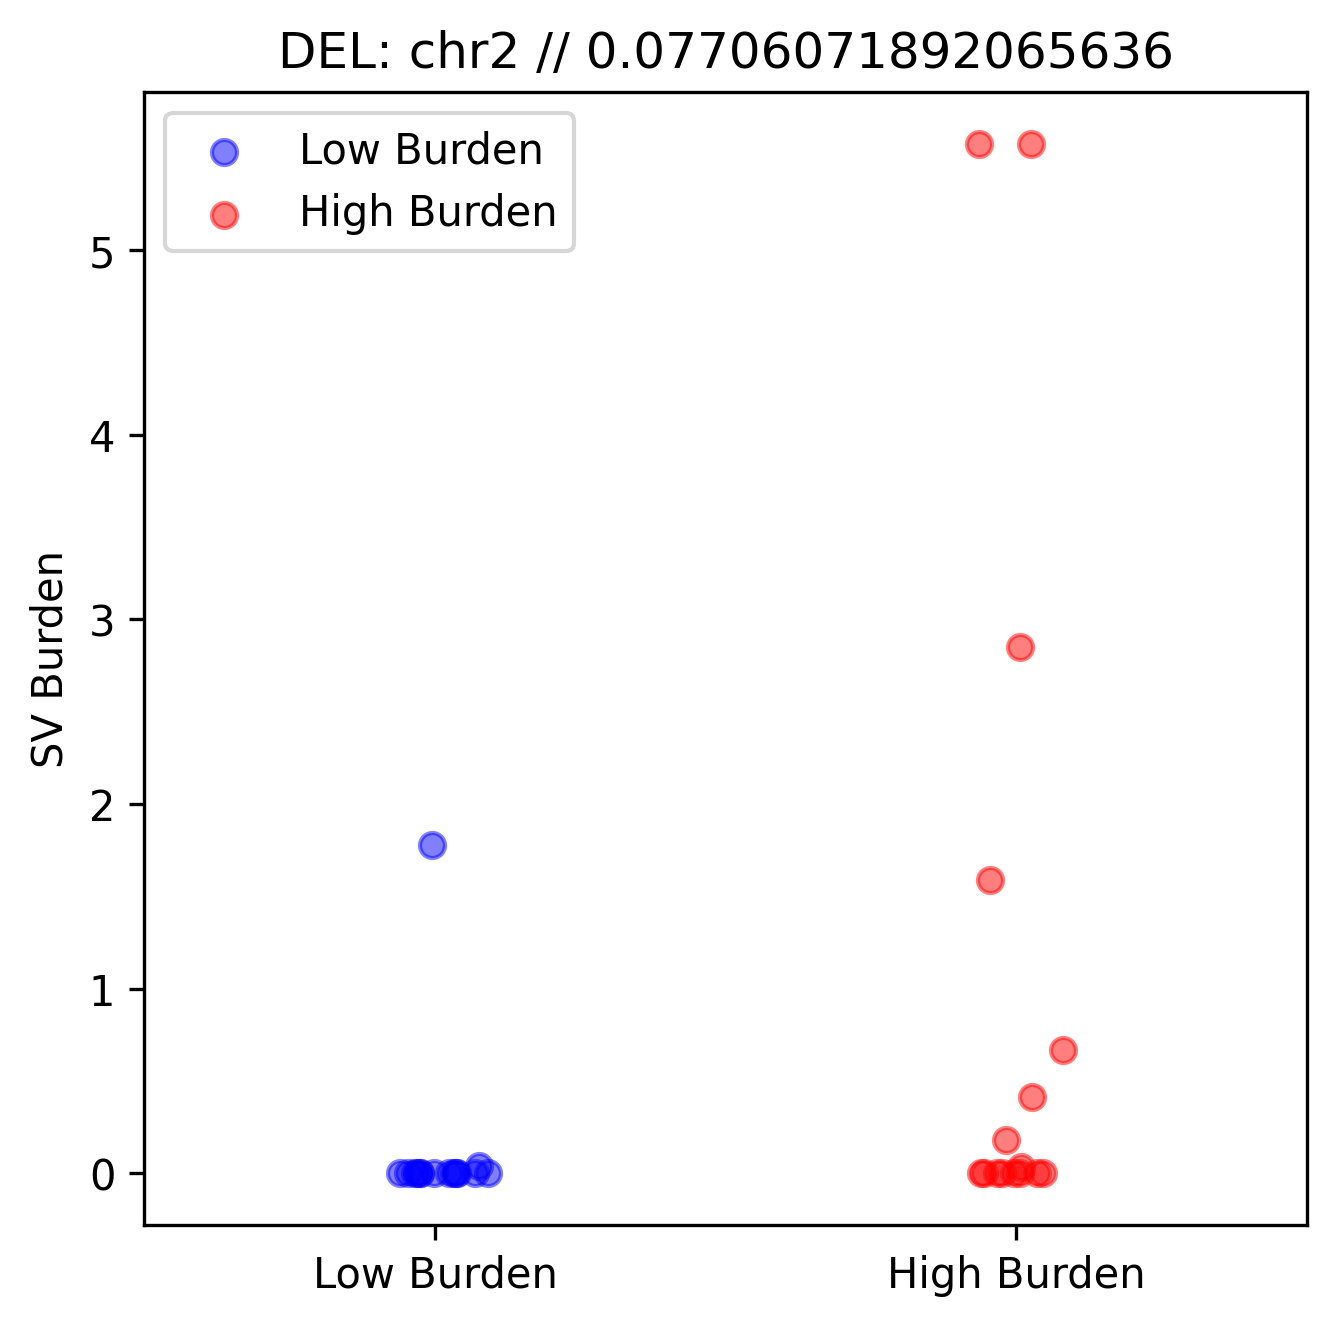

chr3
t-statistic: -1.5635479528531062
p-value: 0.134867250103311


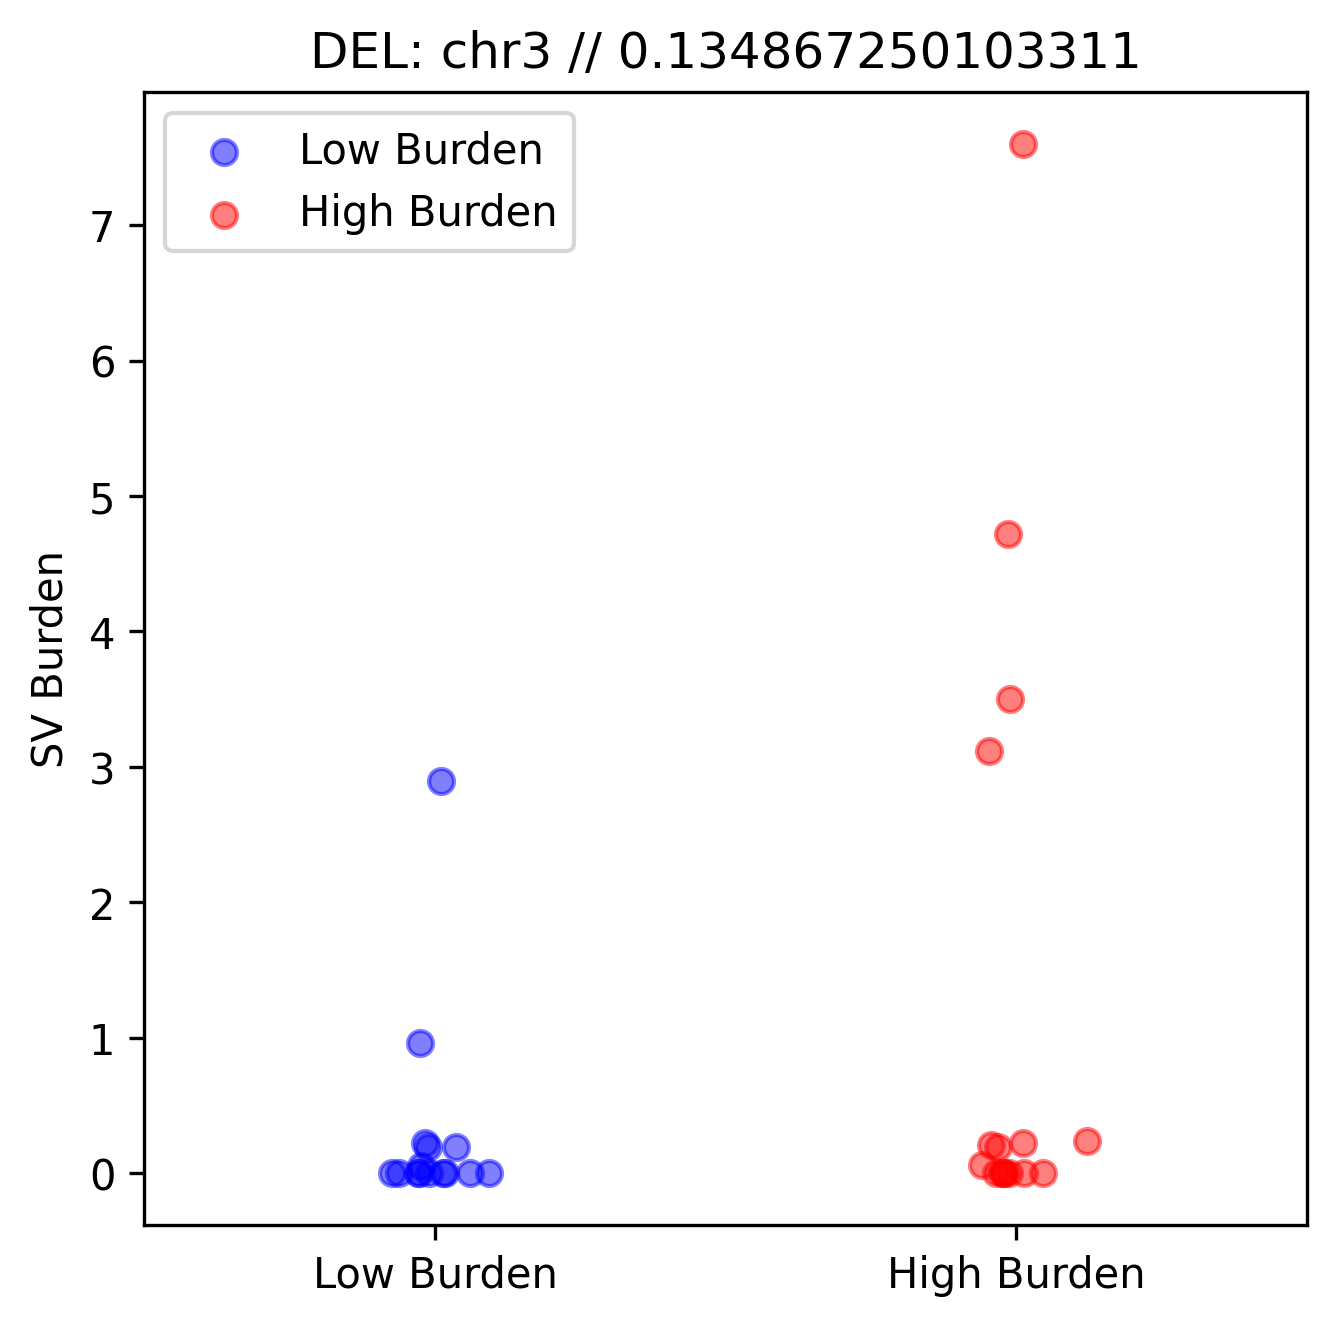

chr4
t-statistic: -0.9603467958549673
p-value: 0.34806926460194554


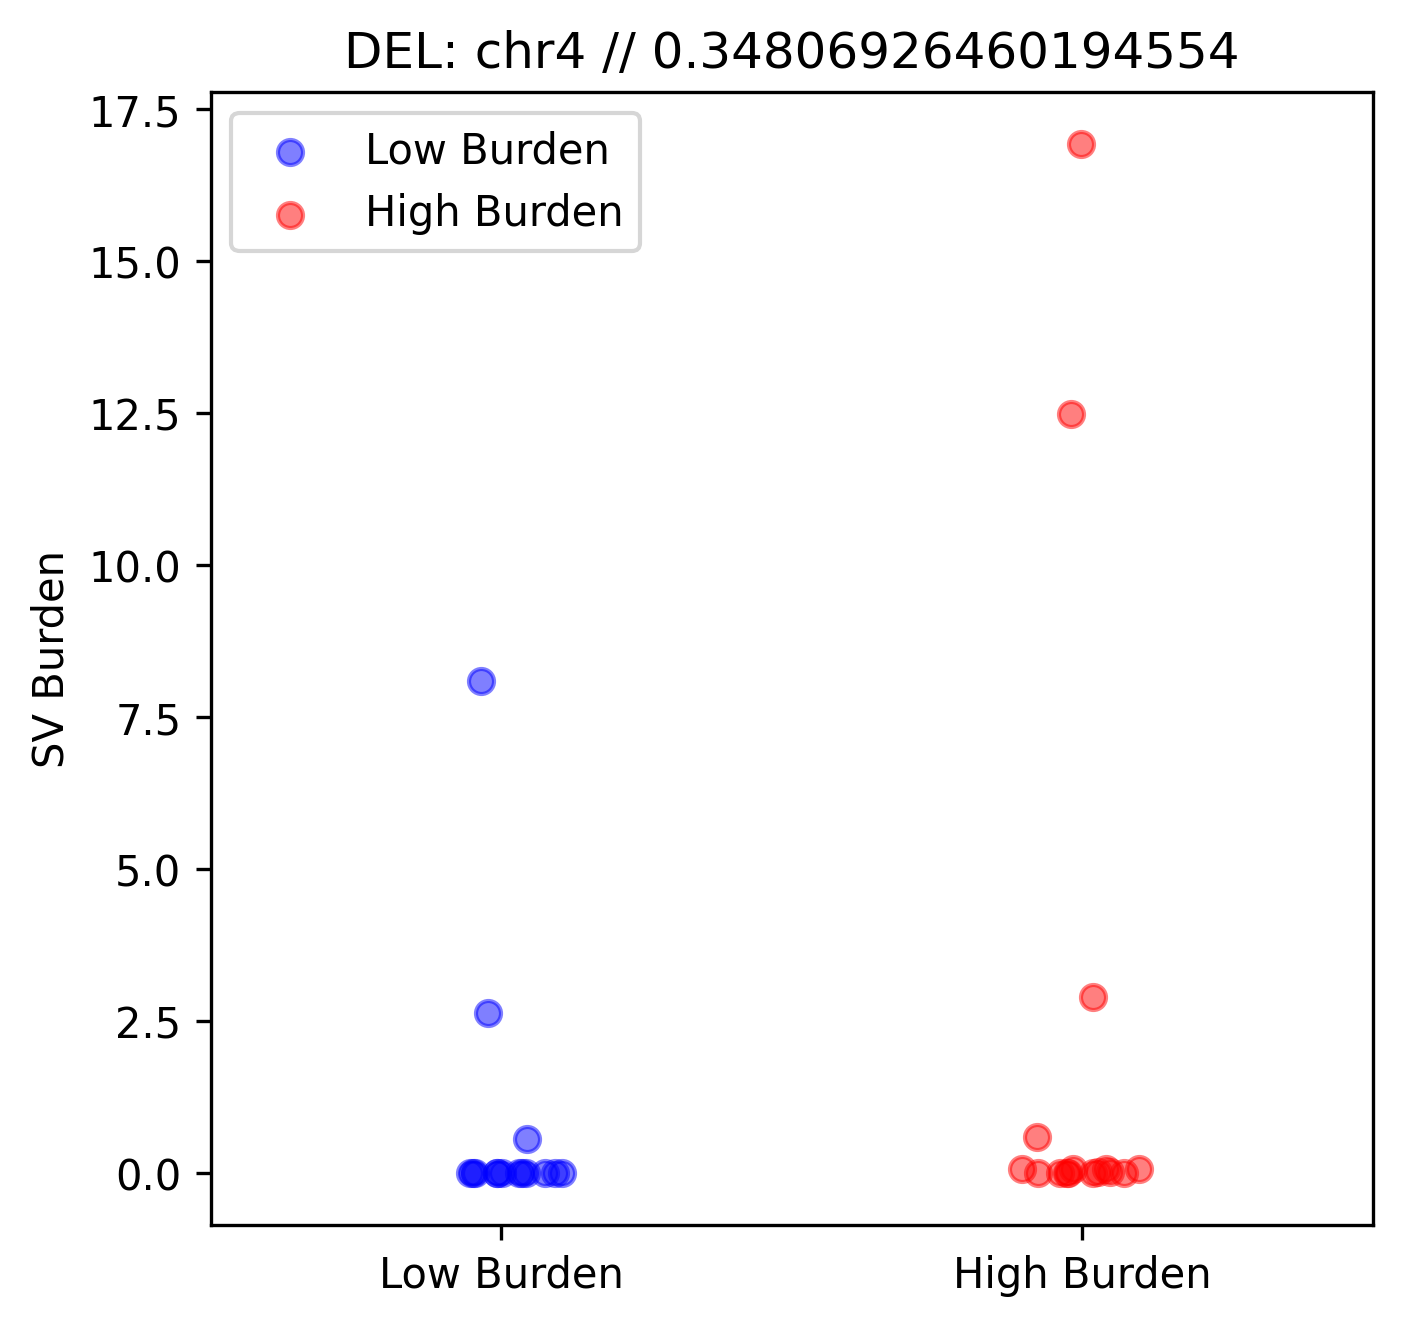

chr5
t-statistic: -1.67778822944277
p-value: 0.11409048022956356


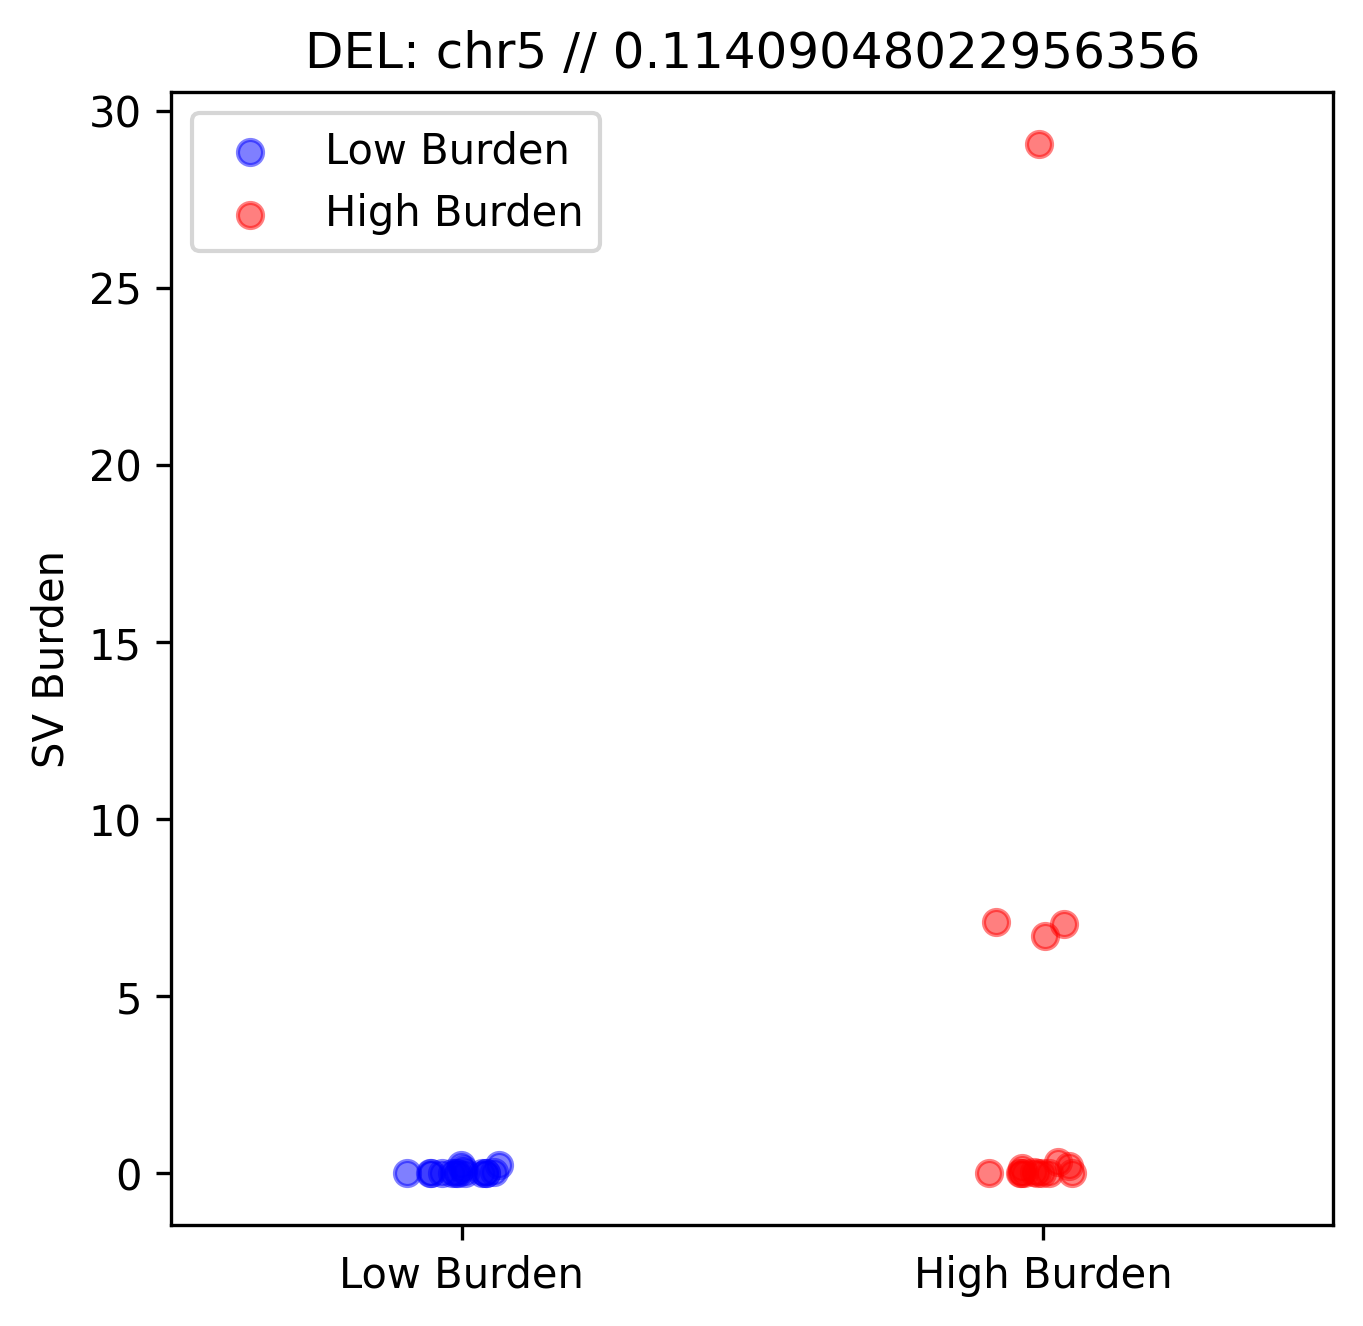

chr6
t-statistic: -2.0995643941552595
p-value: 0.05309463671196874


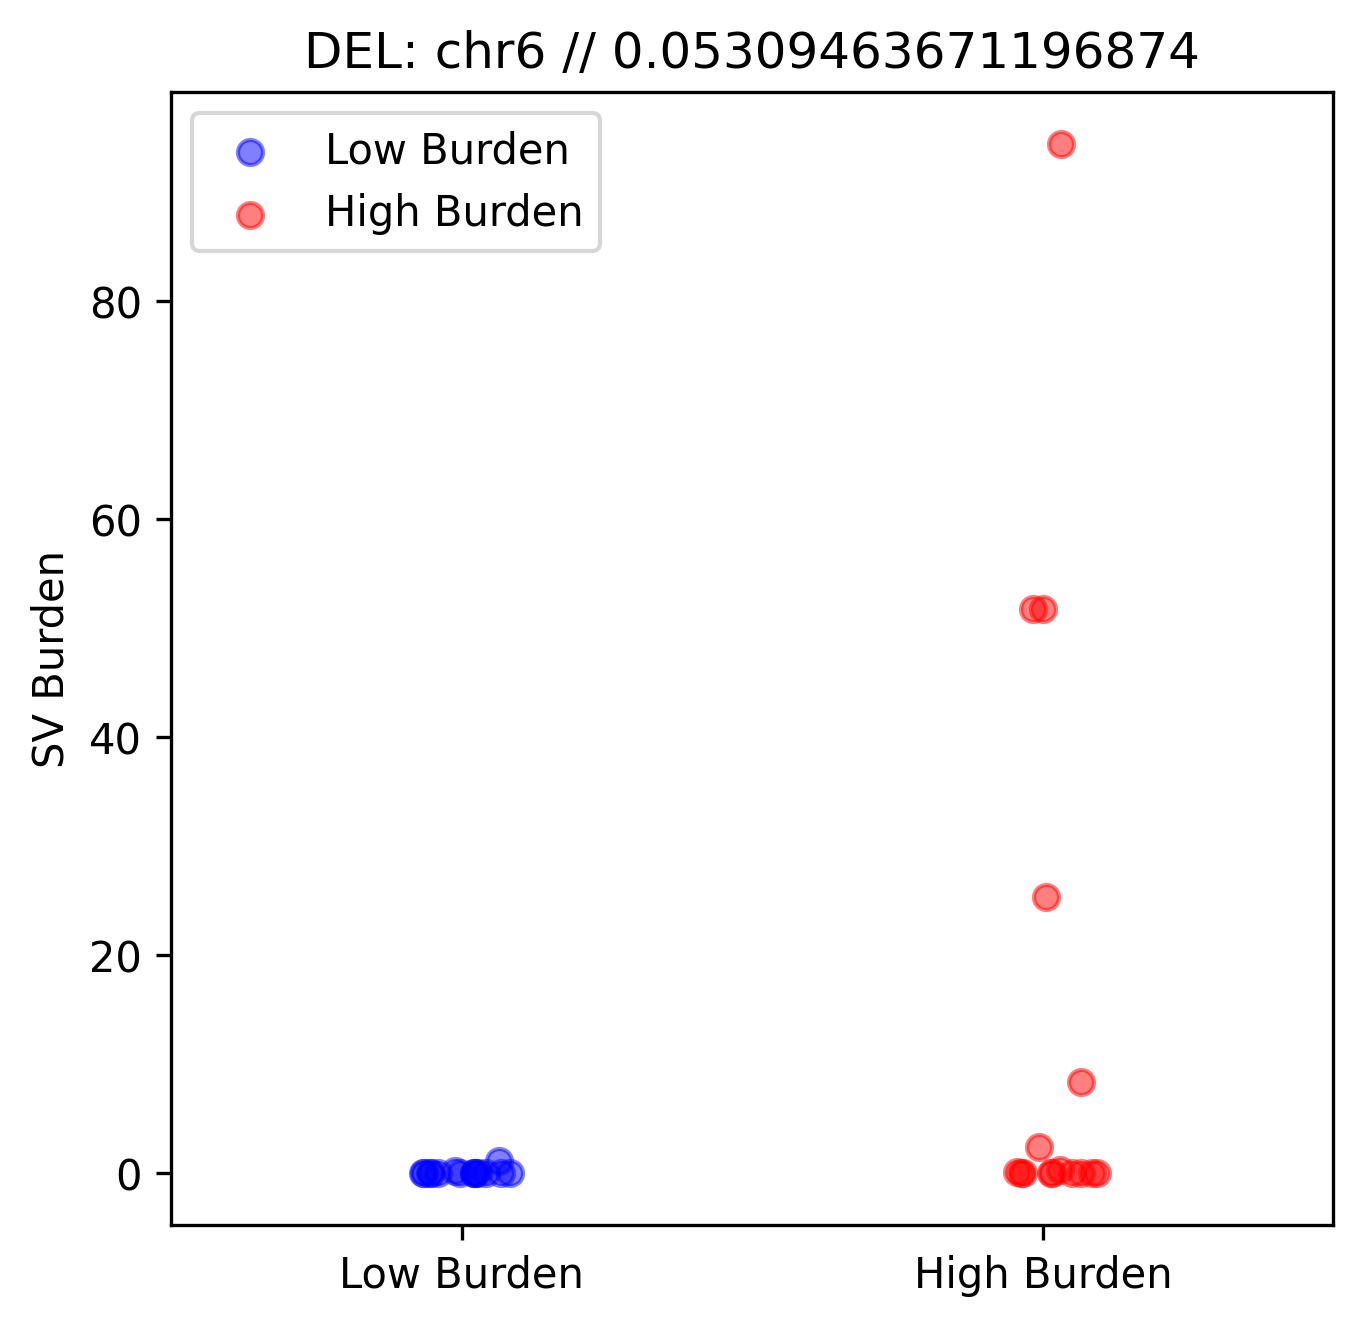

chr7
t-statistic: -0.38521911993794855
p-value: 0.7032395261897593


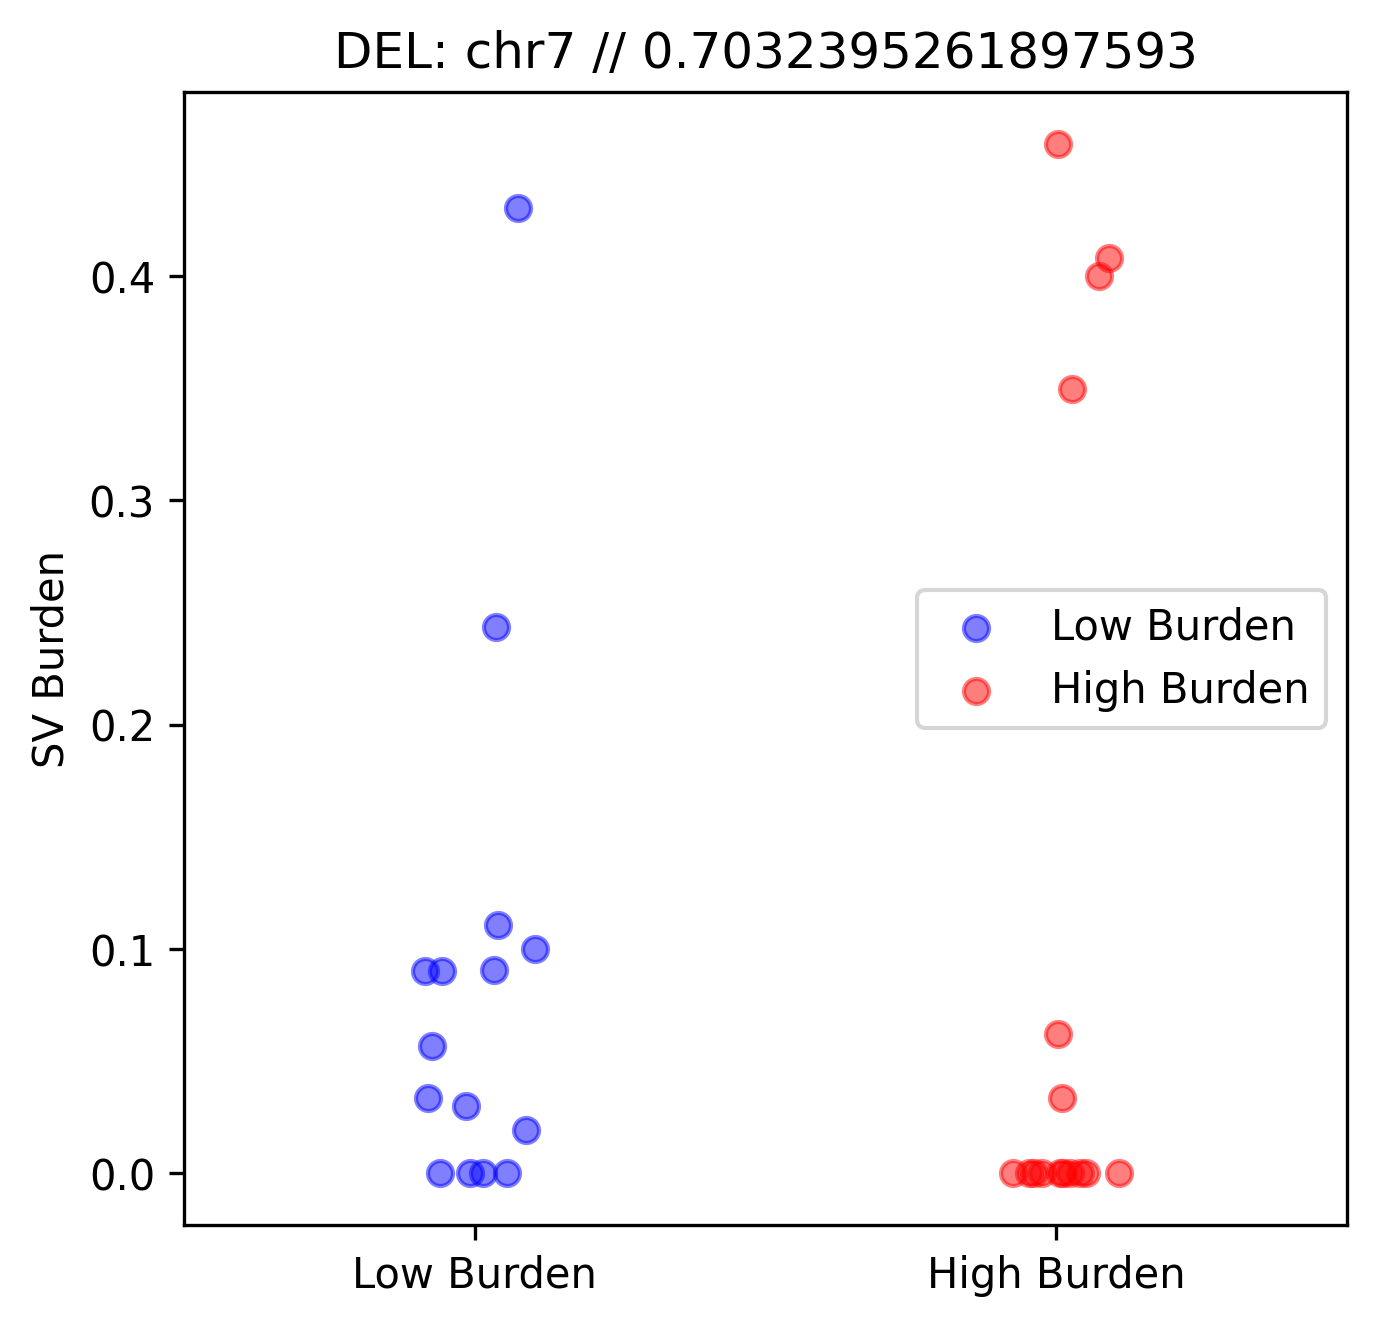

chr8
t-statistic: -1.2088719496179254
p-value: 0.24542303372918522


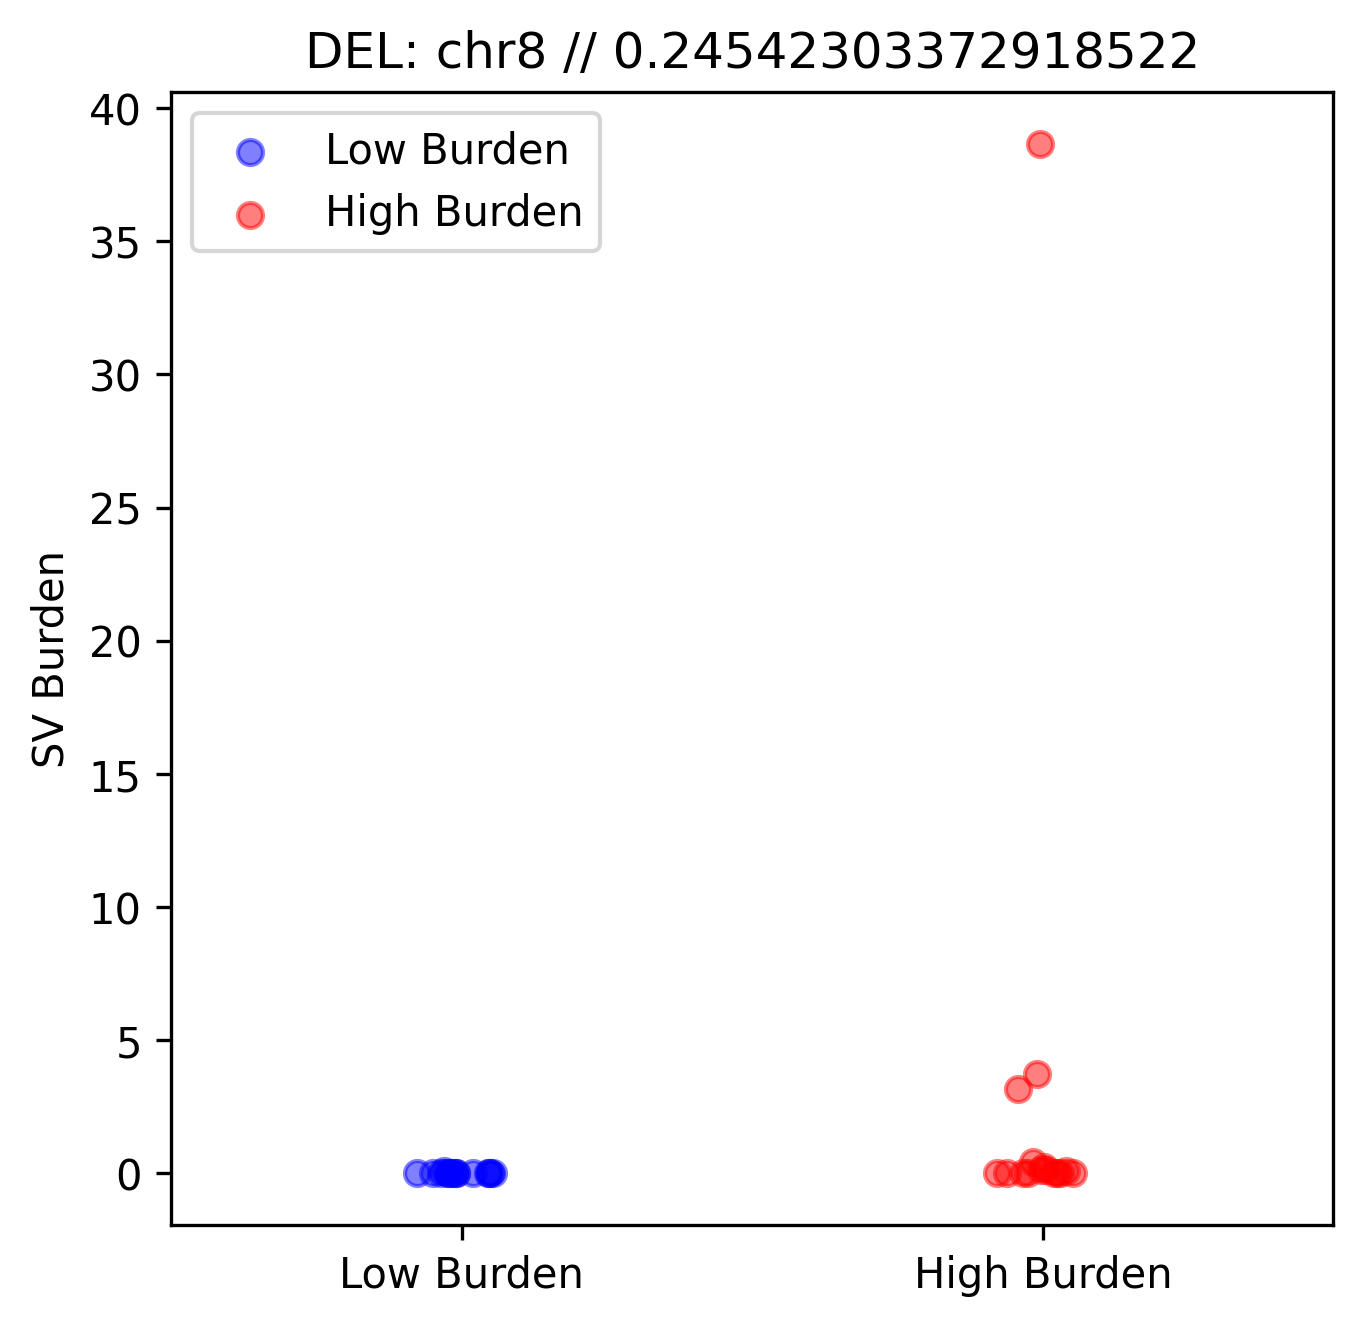

chr9
t-statistic: -2.386861258388893
p-value: 0.03016593173783669


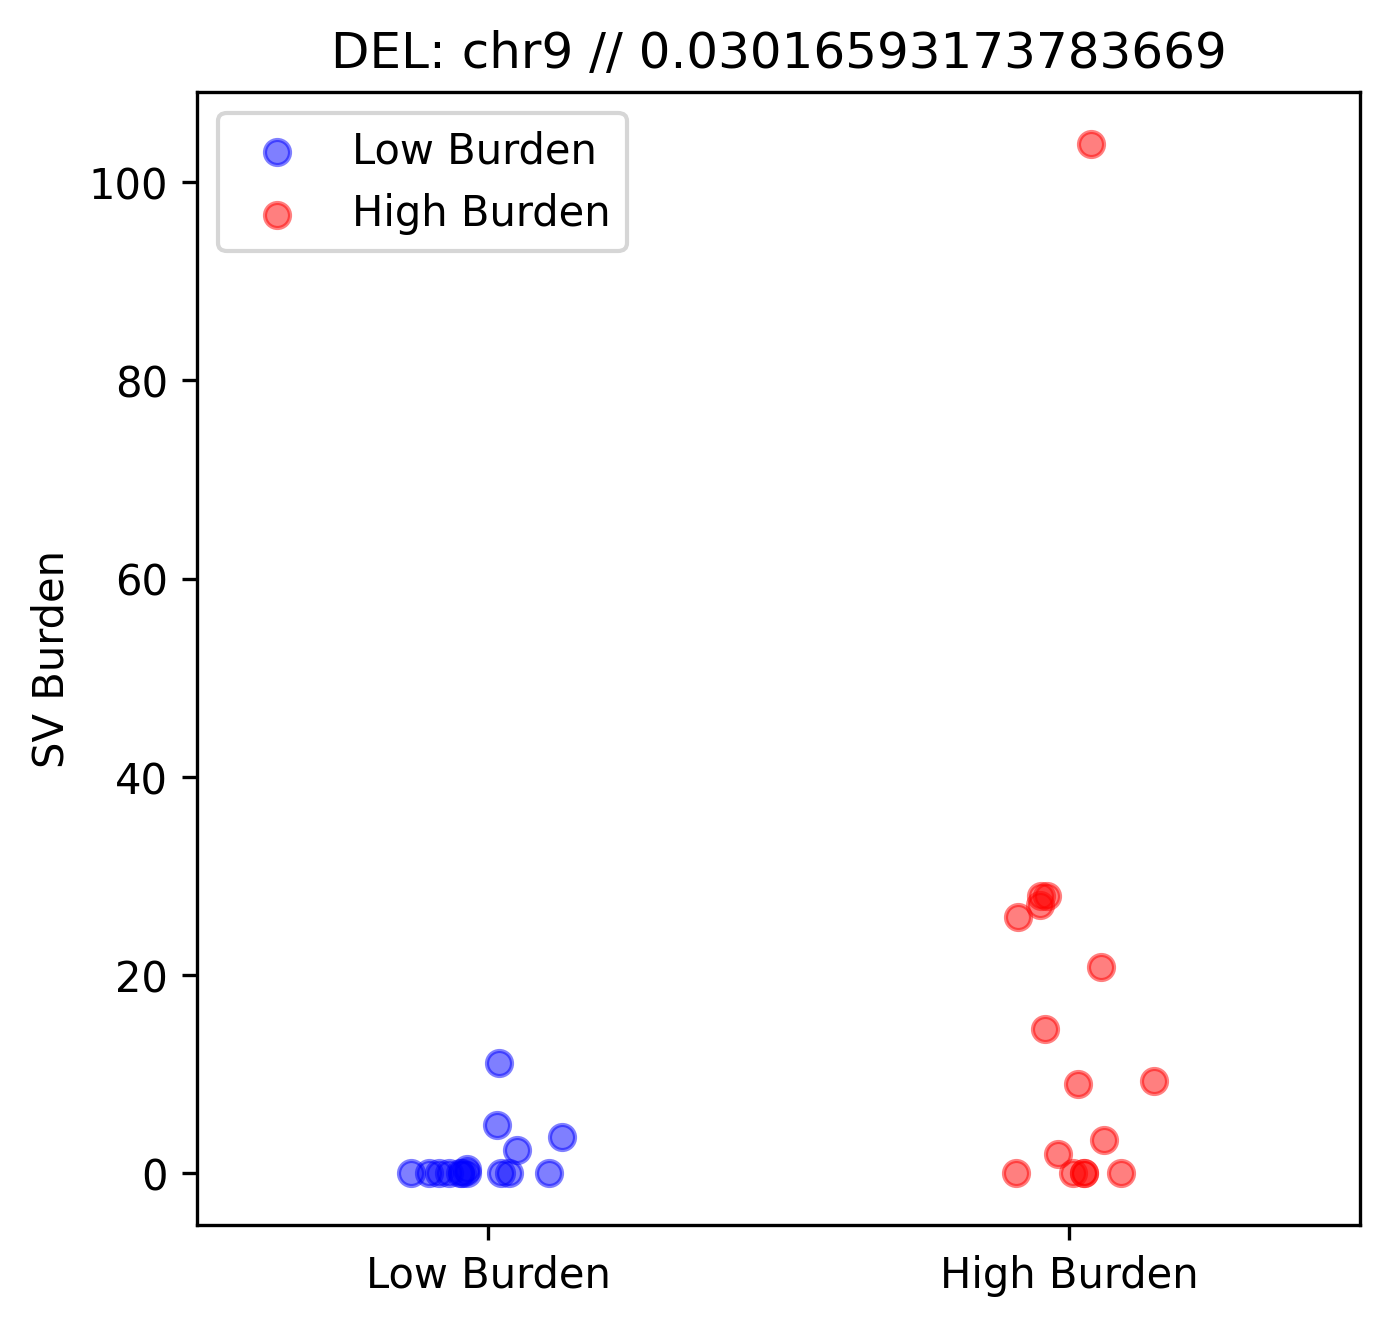

chr10
t-statistic: -2.9231849797448444
p-value: 0.01048820151065278


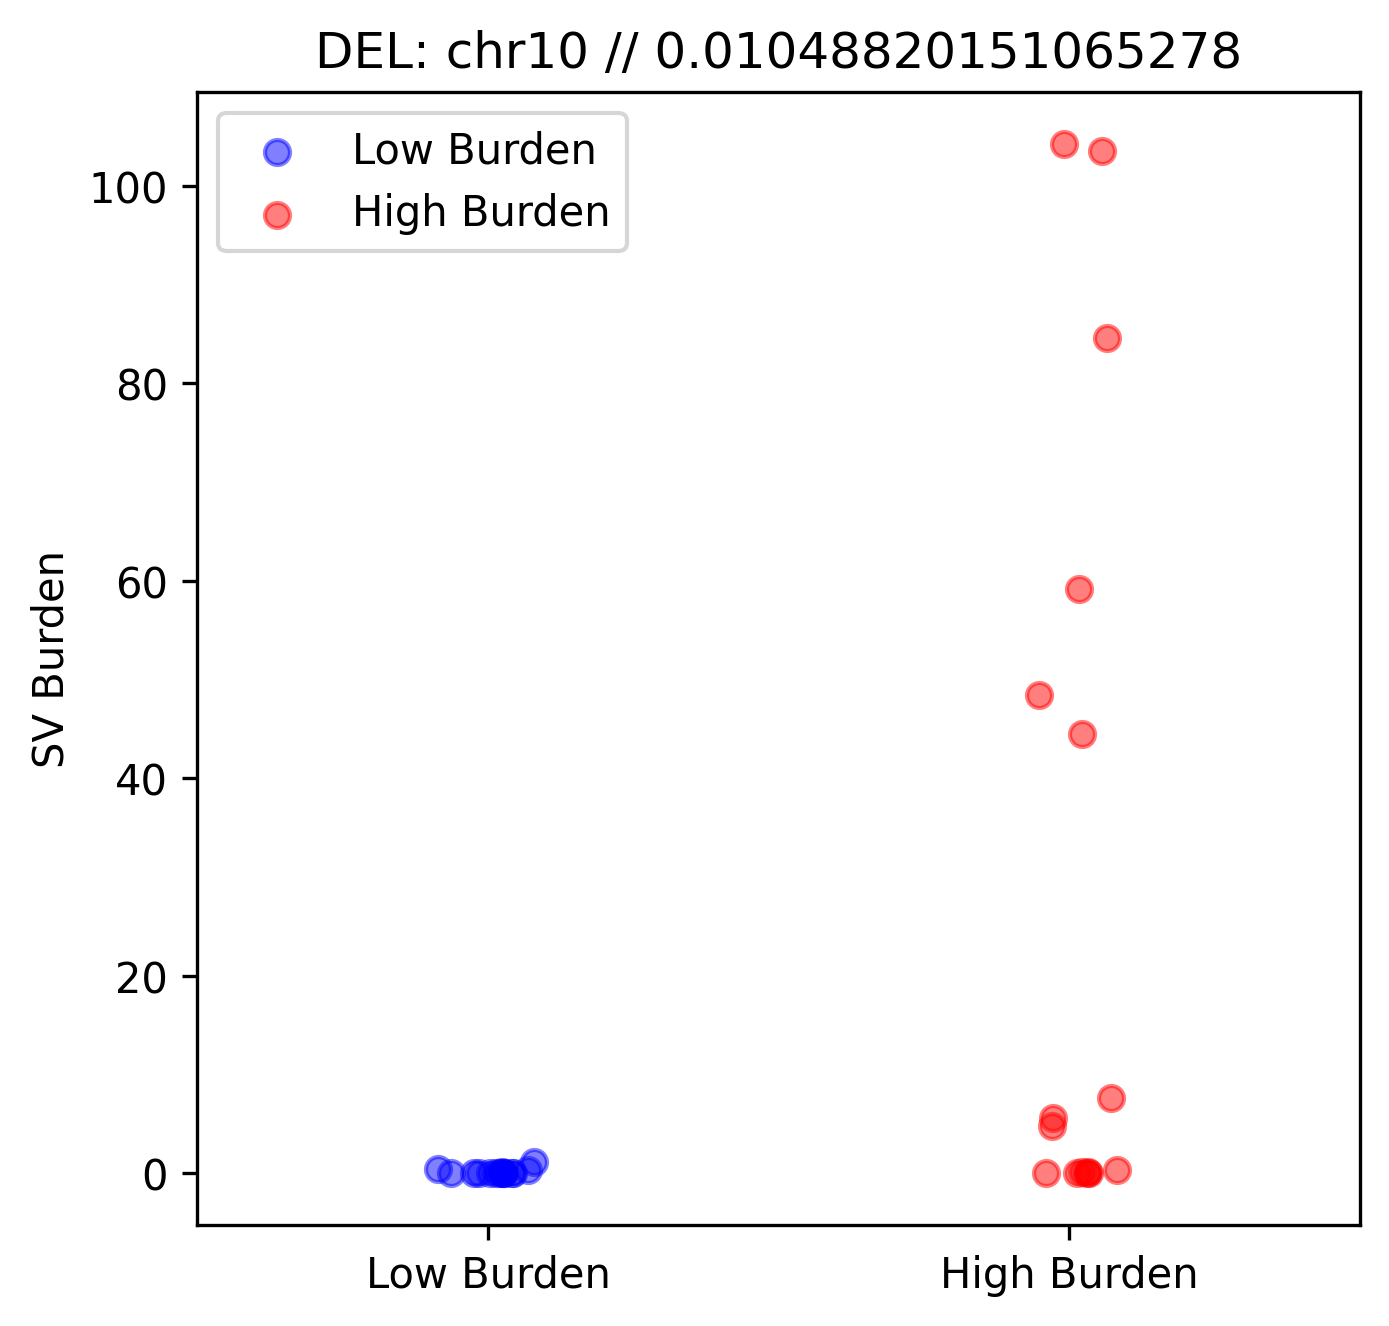

chr11
t-statistic: -0.9784752573521848
p-value: 0.3427665173425368


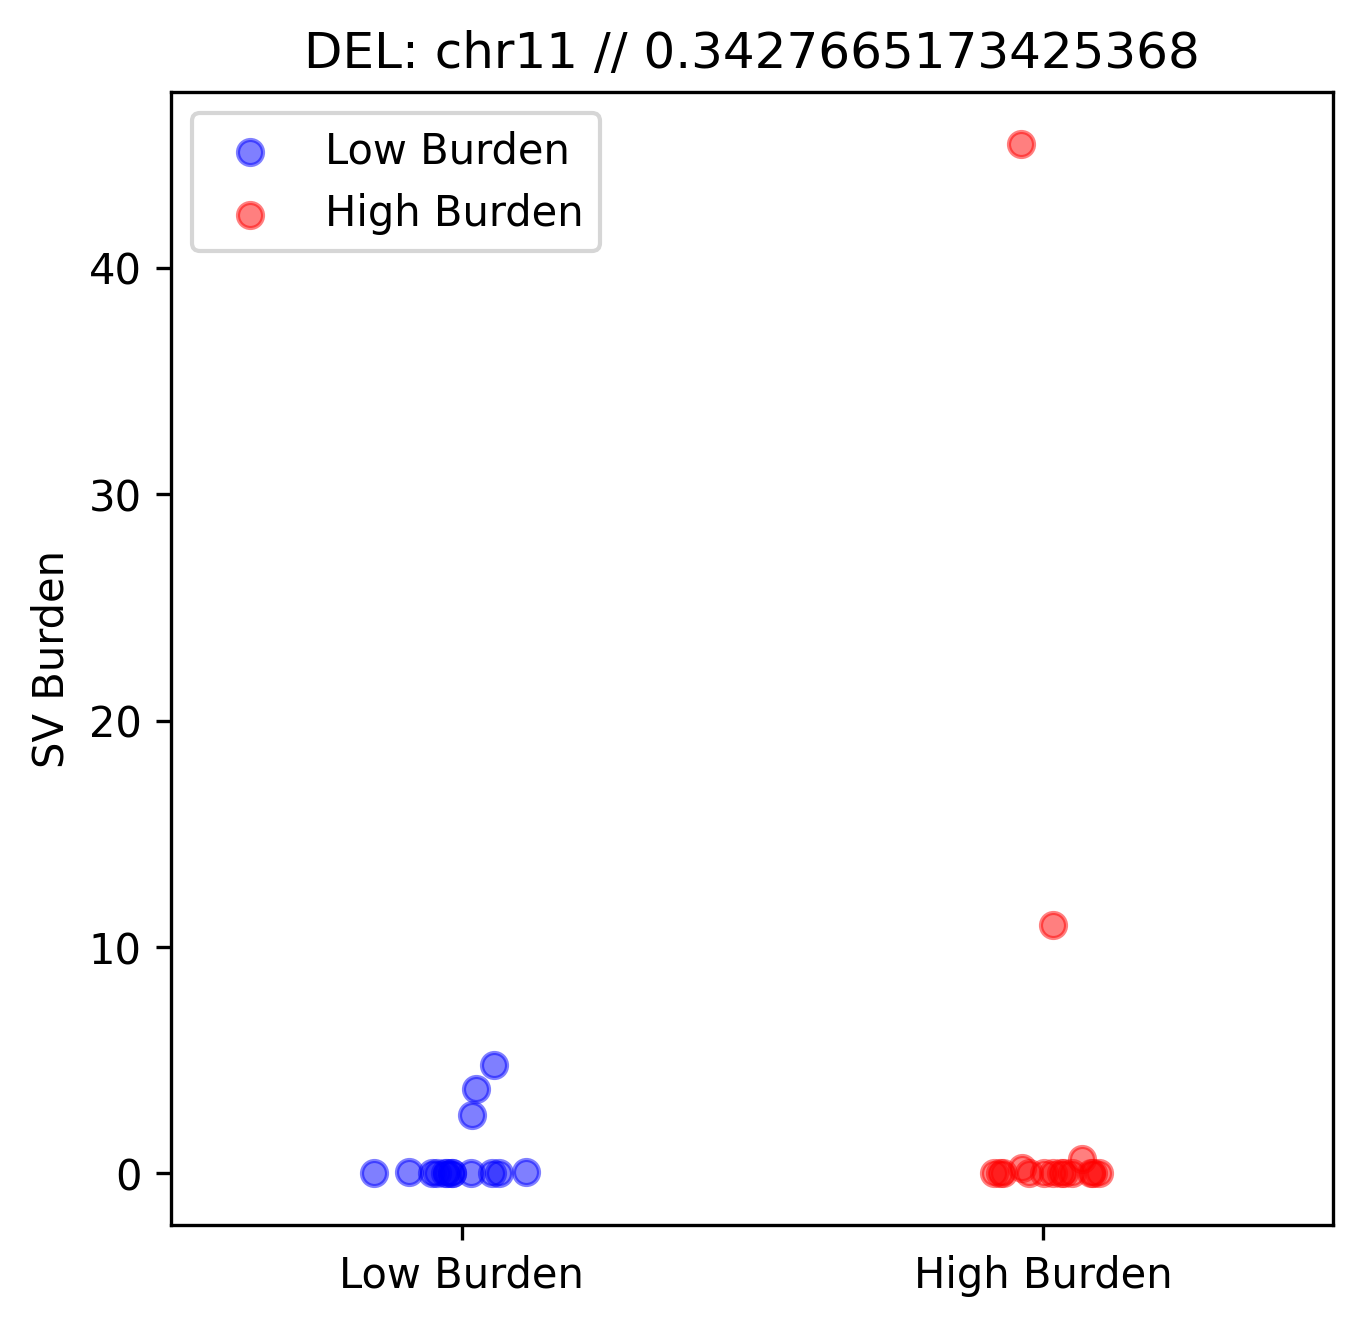

chr12
t-statistic: -2.0965942637455752
p-value: 0.053392941531085175


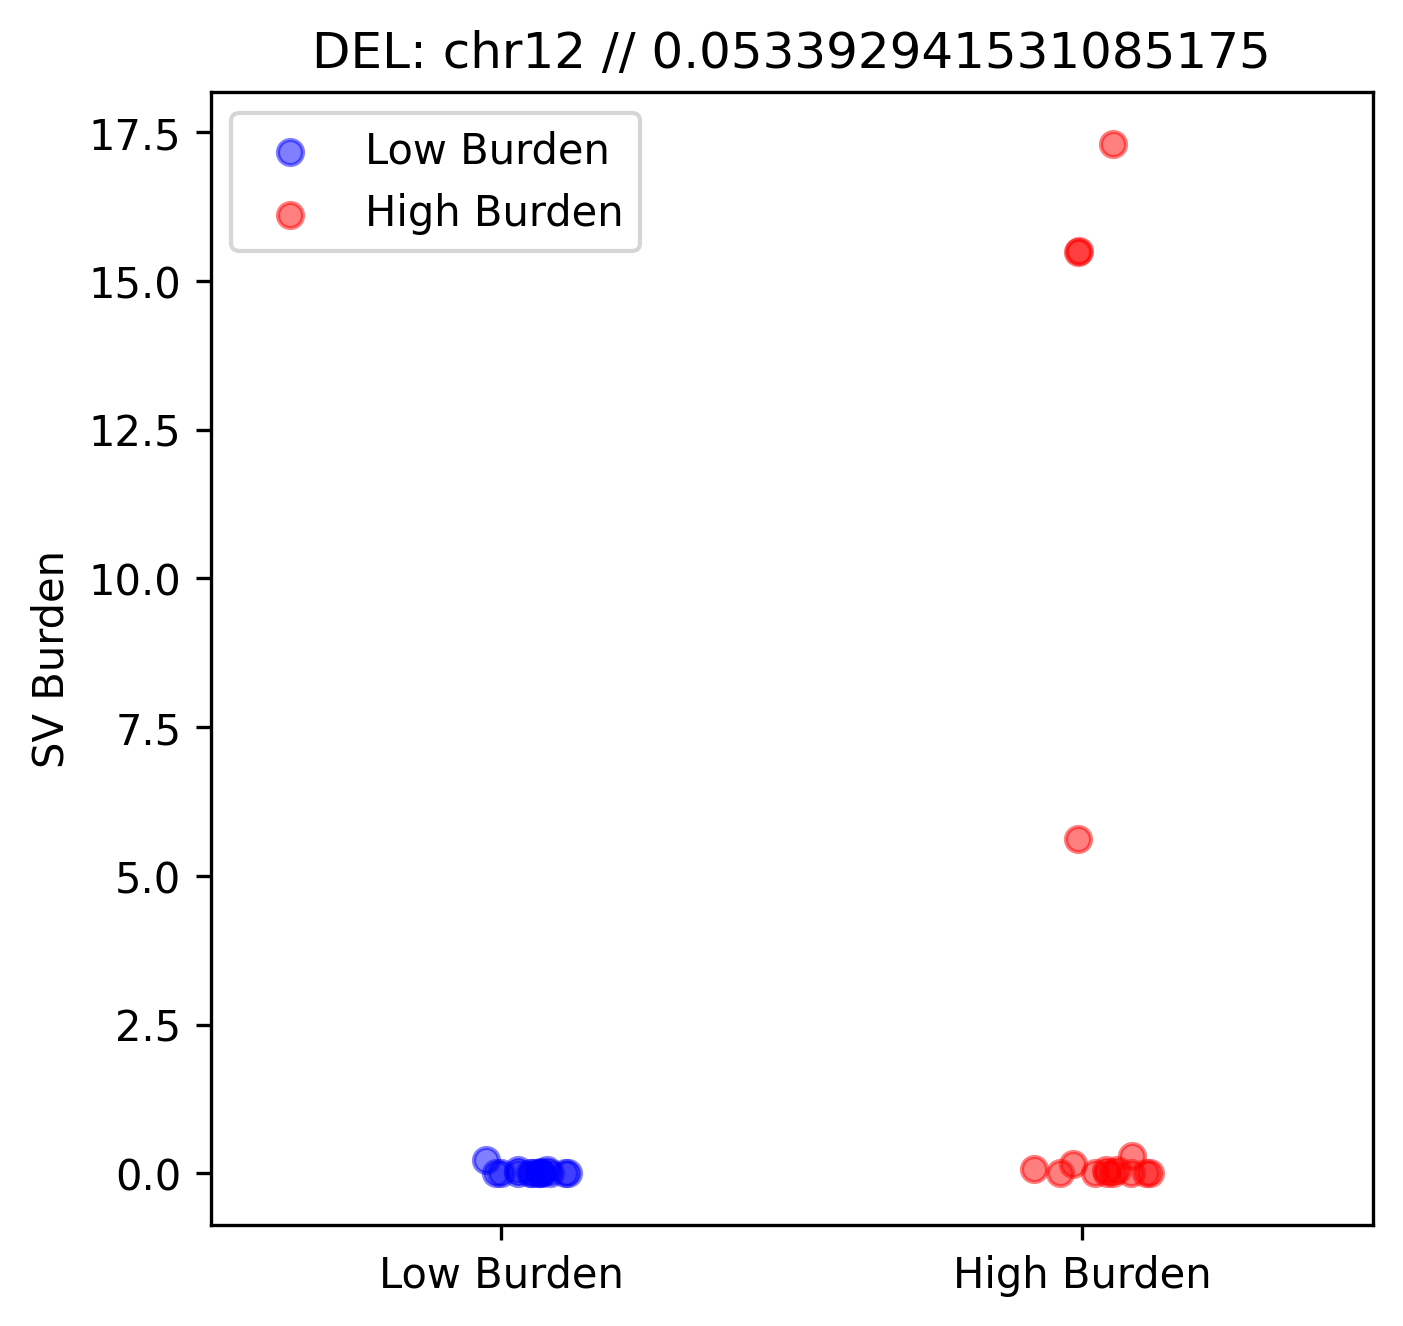

chr13
t-statistic: -3.233539689944248
p-value: 0.00556354522218542


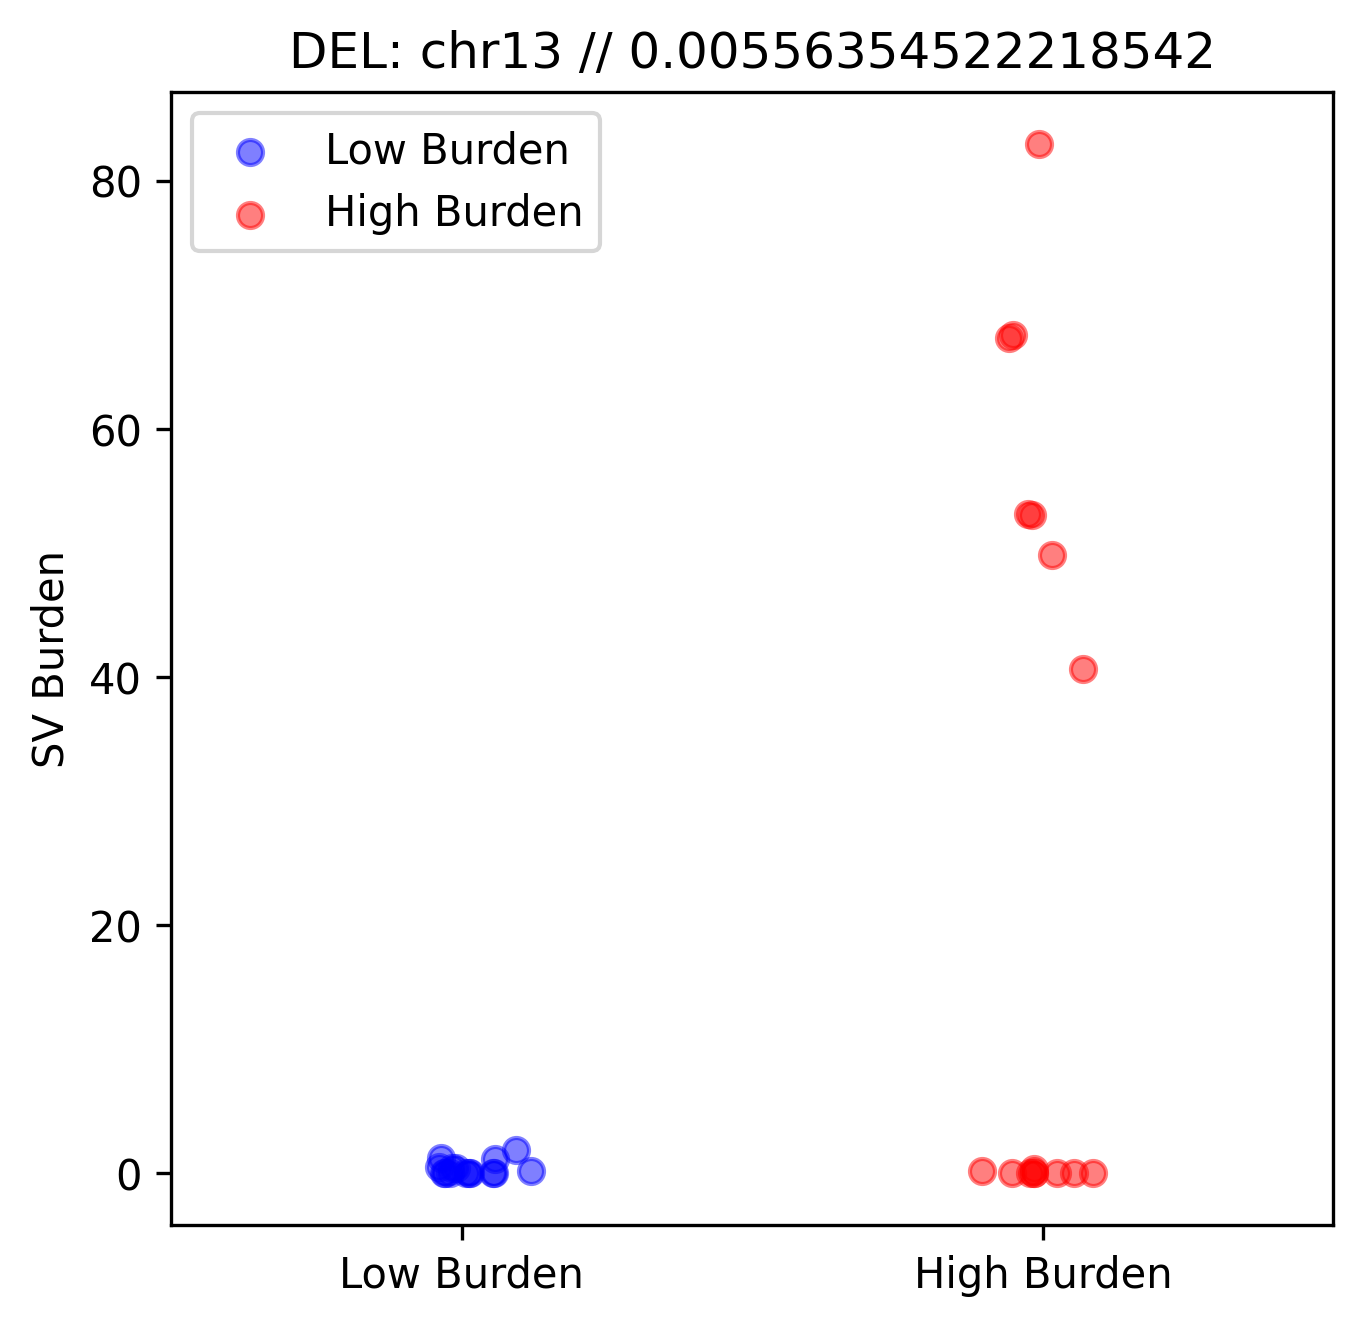

chr14
t-statistic: -2.8560282377770005
p-value: 0.012018643434370653


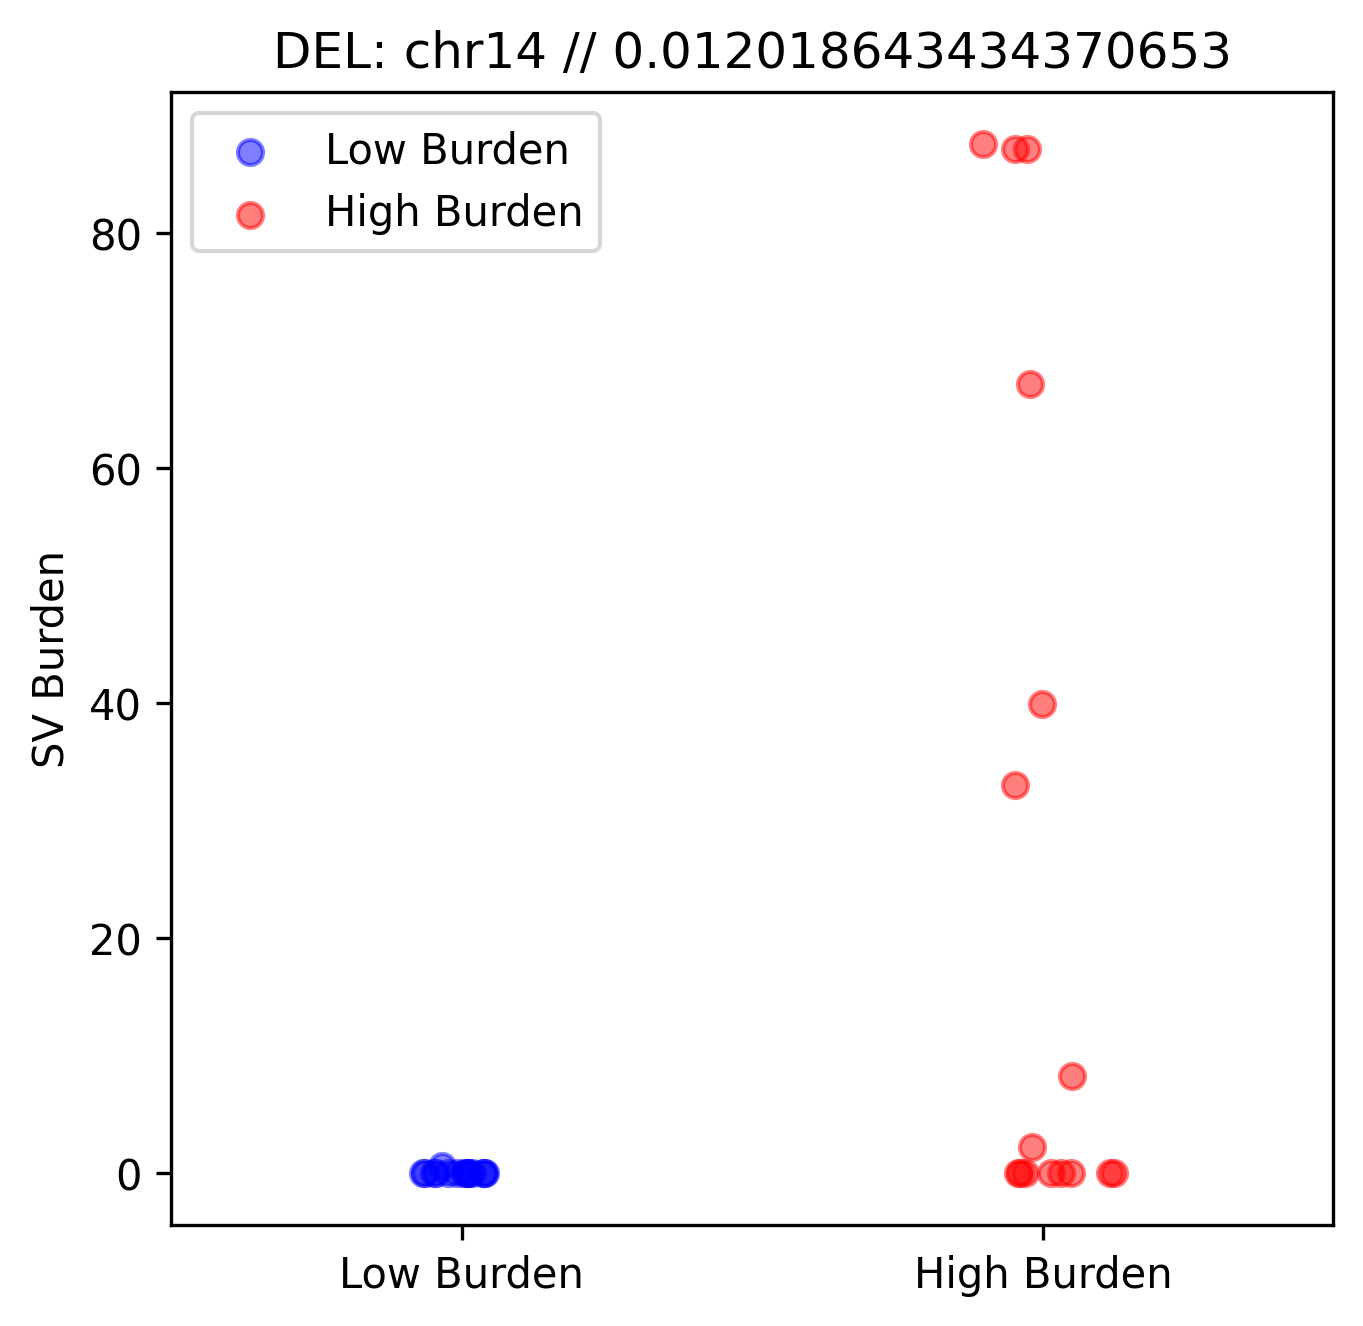

chr15
t-statistic: -2.25636192246282
p-value: 0.039400834720115026


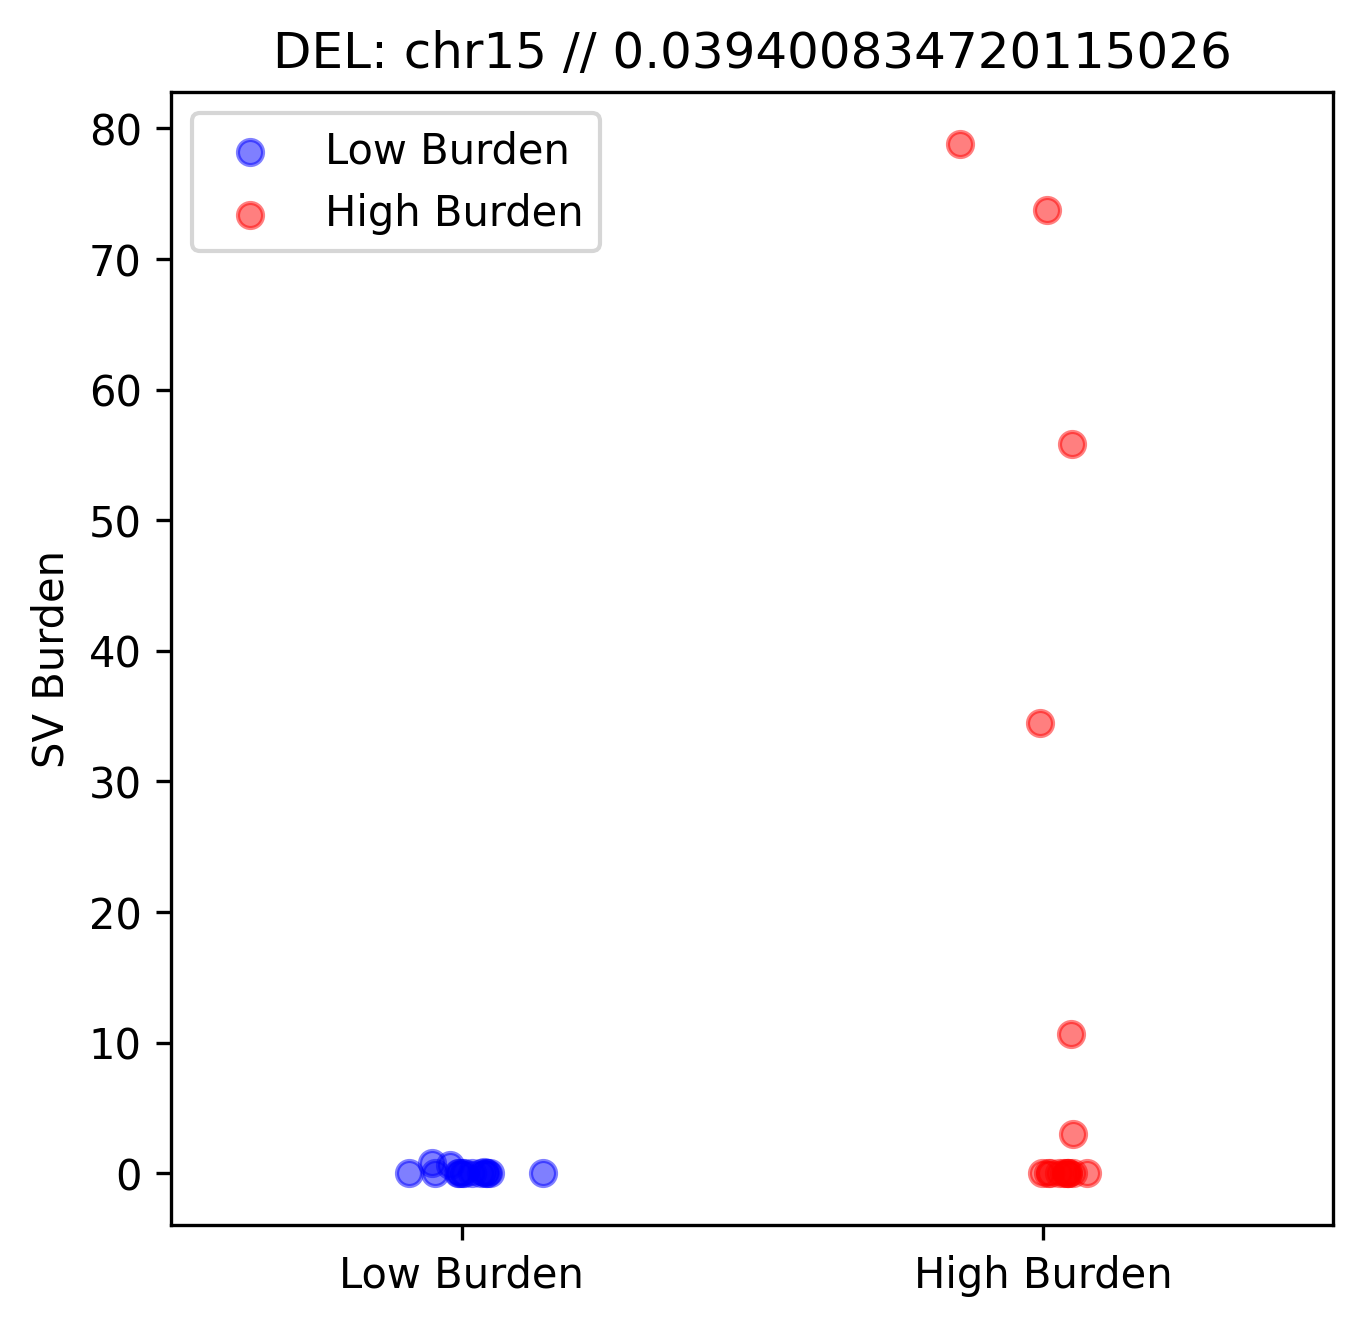

chr16
t-statistic: -1.5667606948657118
p-value: 0.1379942635775546


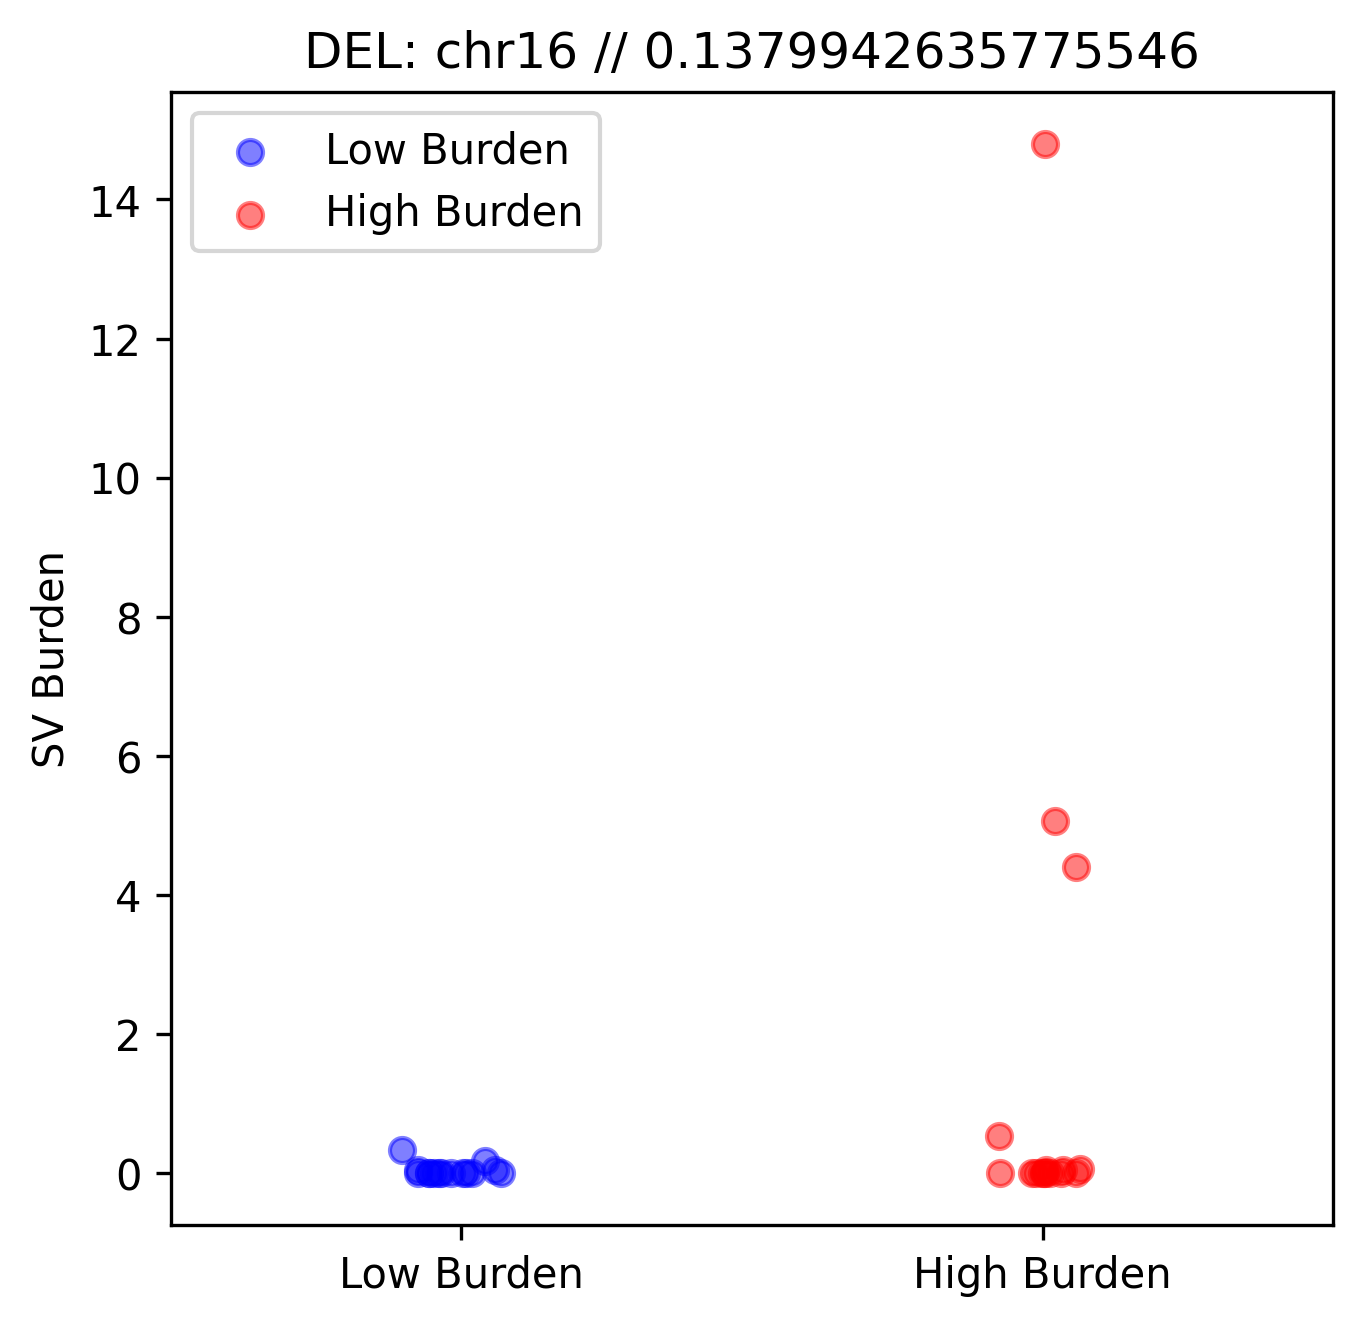

chr17
t-statistic: -1.655345376591728
p-value: 0.1186064029668803


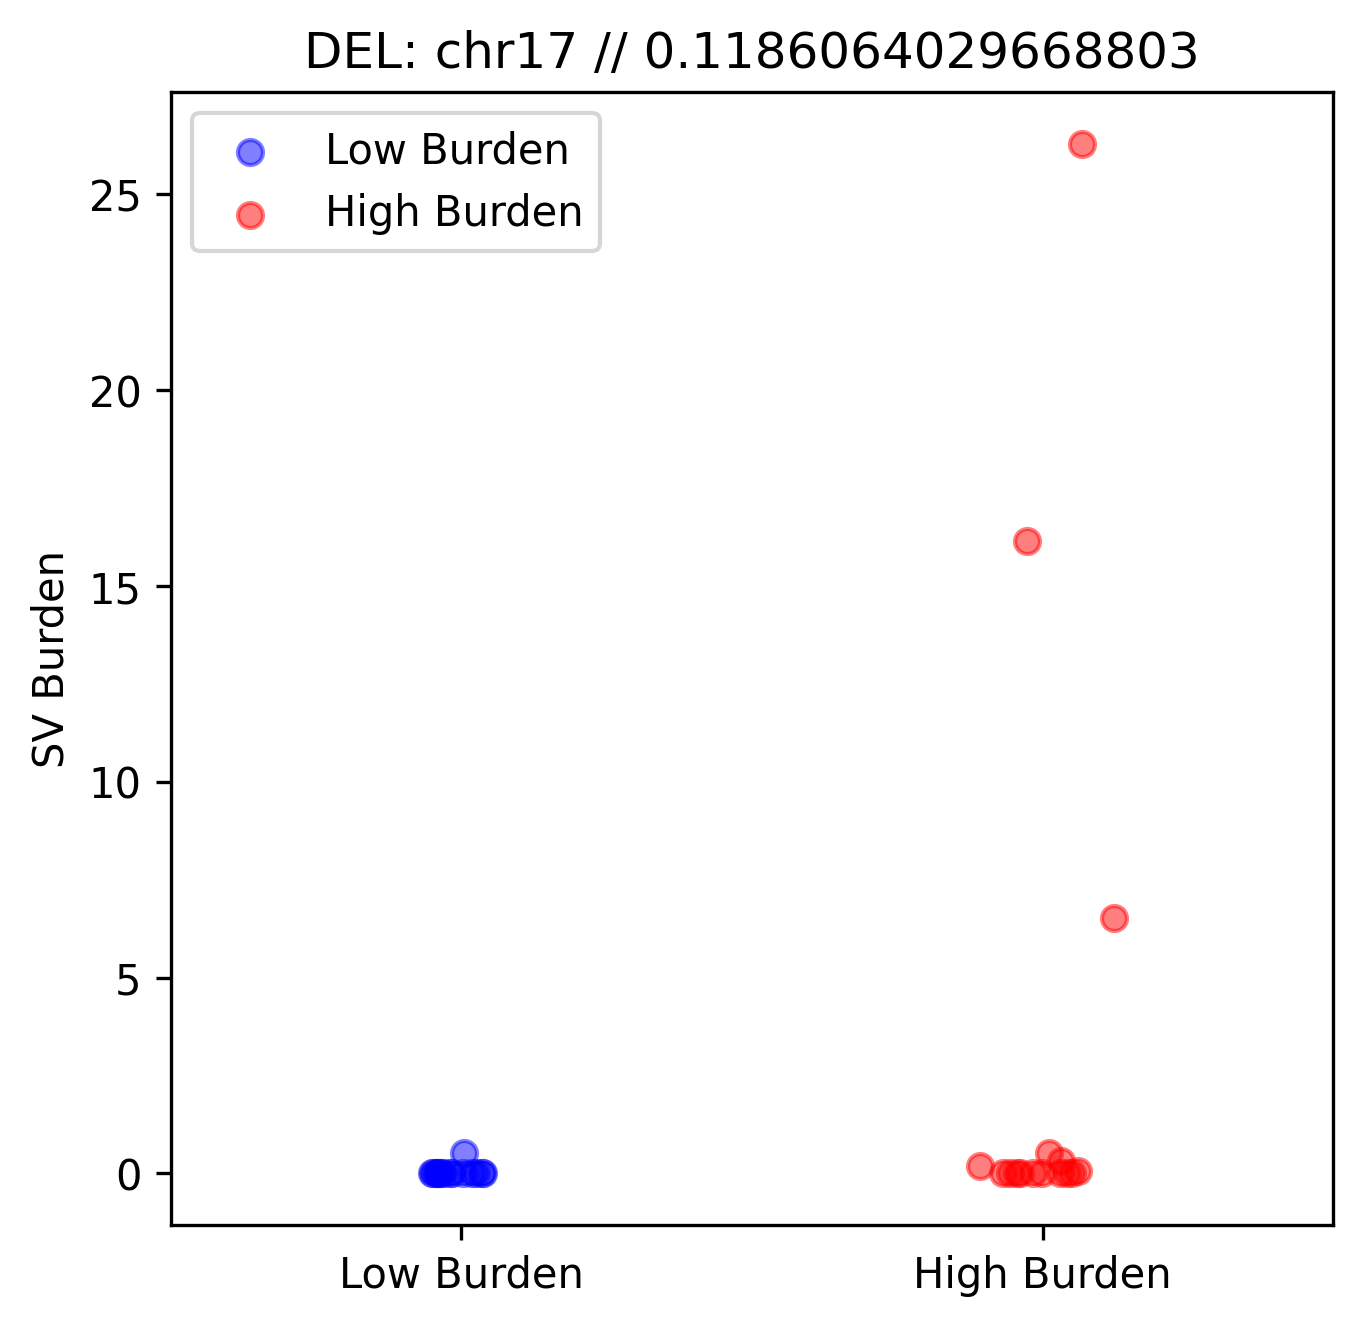

chr18
t-statistic: 0.8530517620654211
p-value: 0.4015761111657692


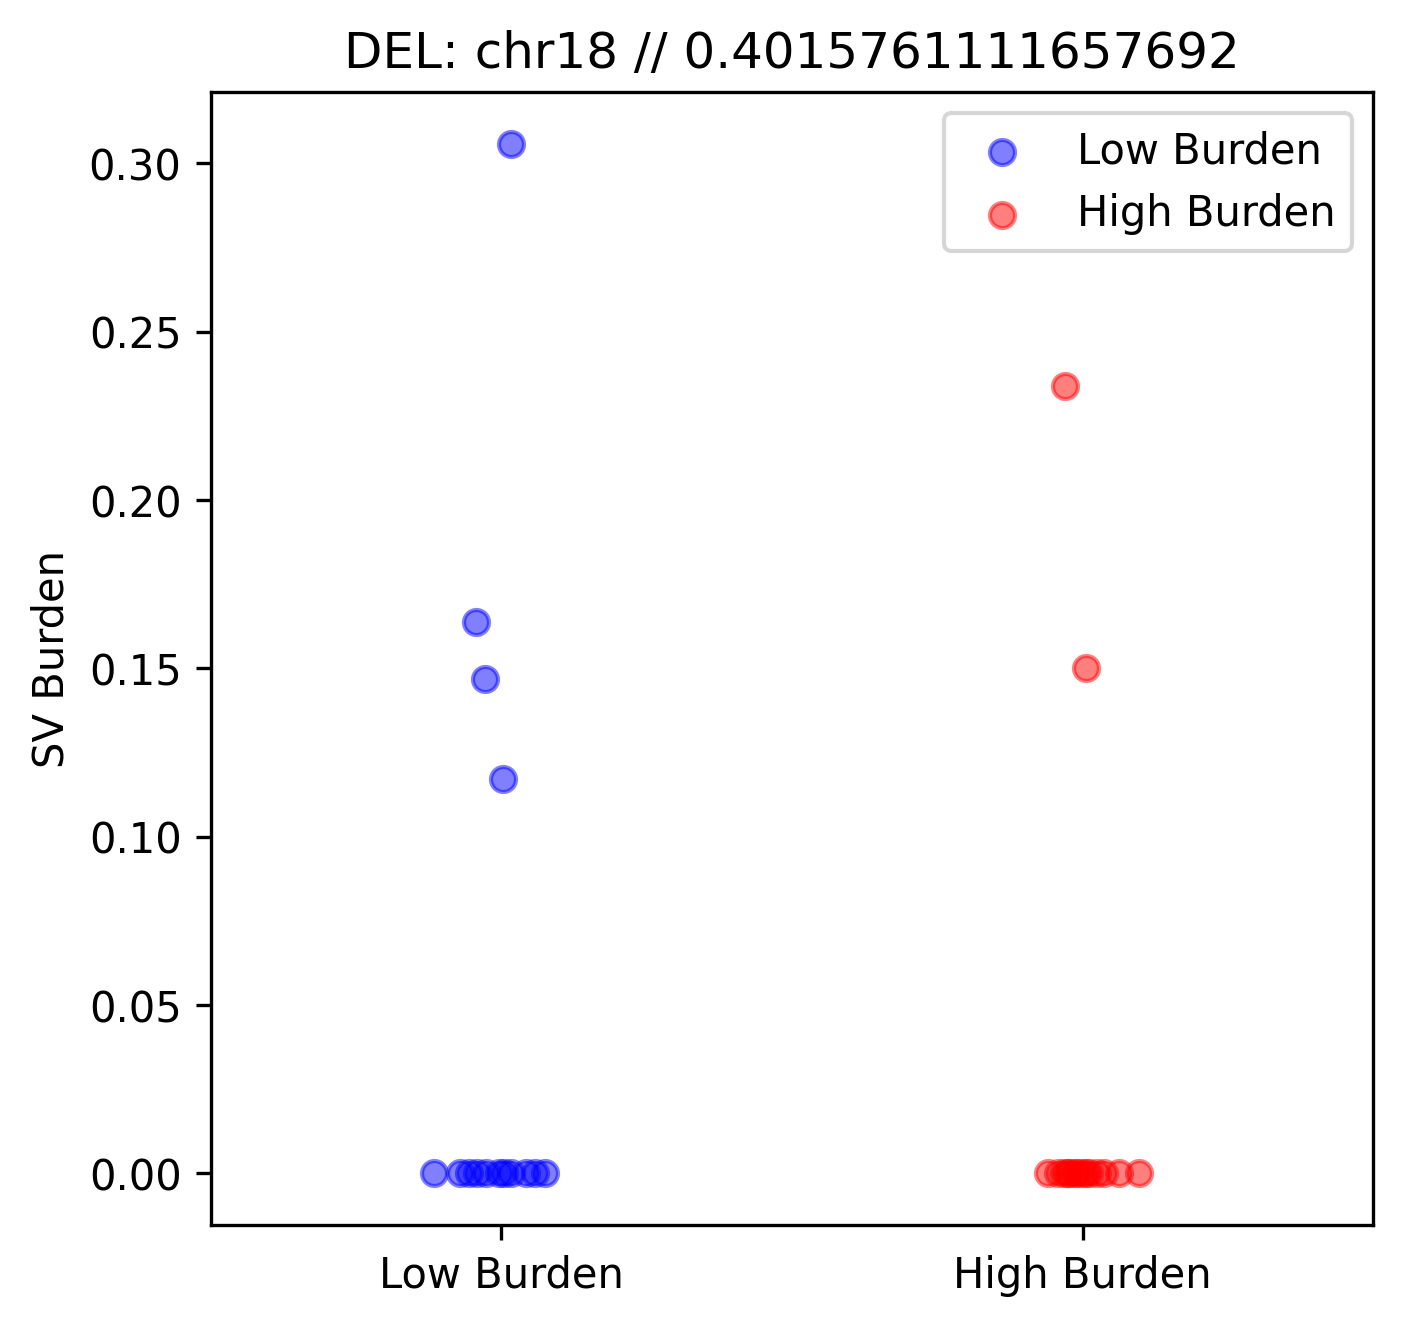

chr19
t-statistic: -1.621399129018054
p-value: 0.12575694365451467


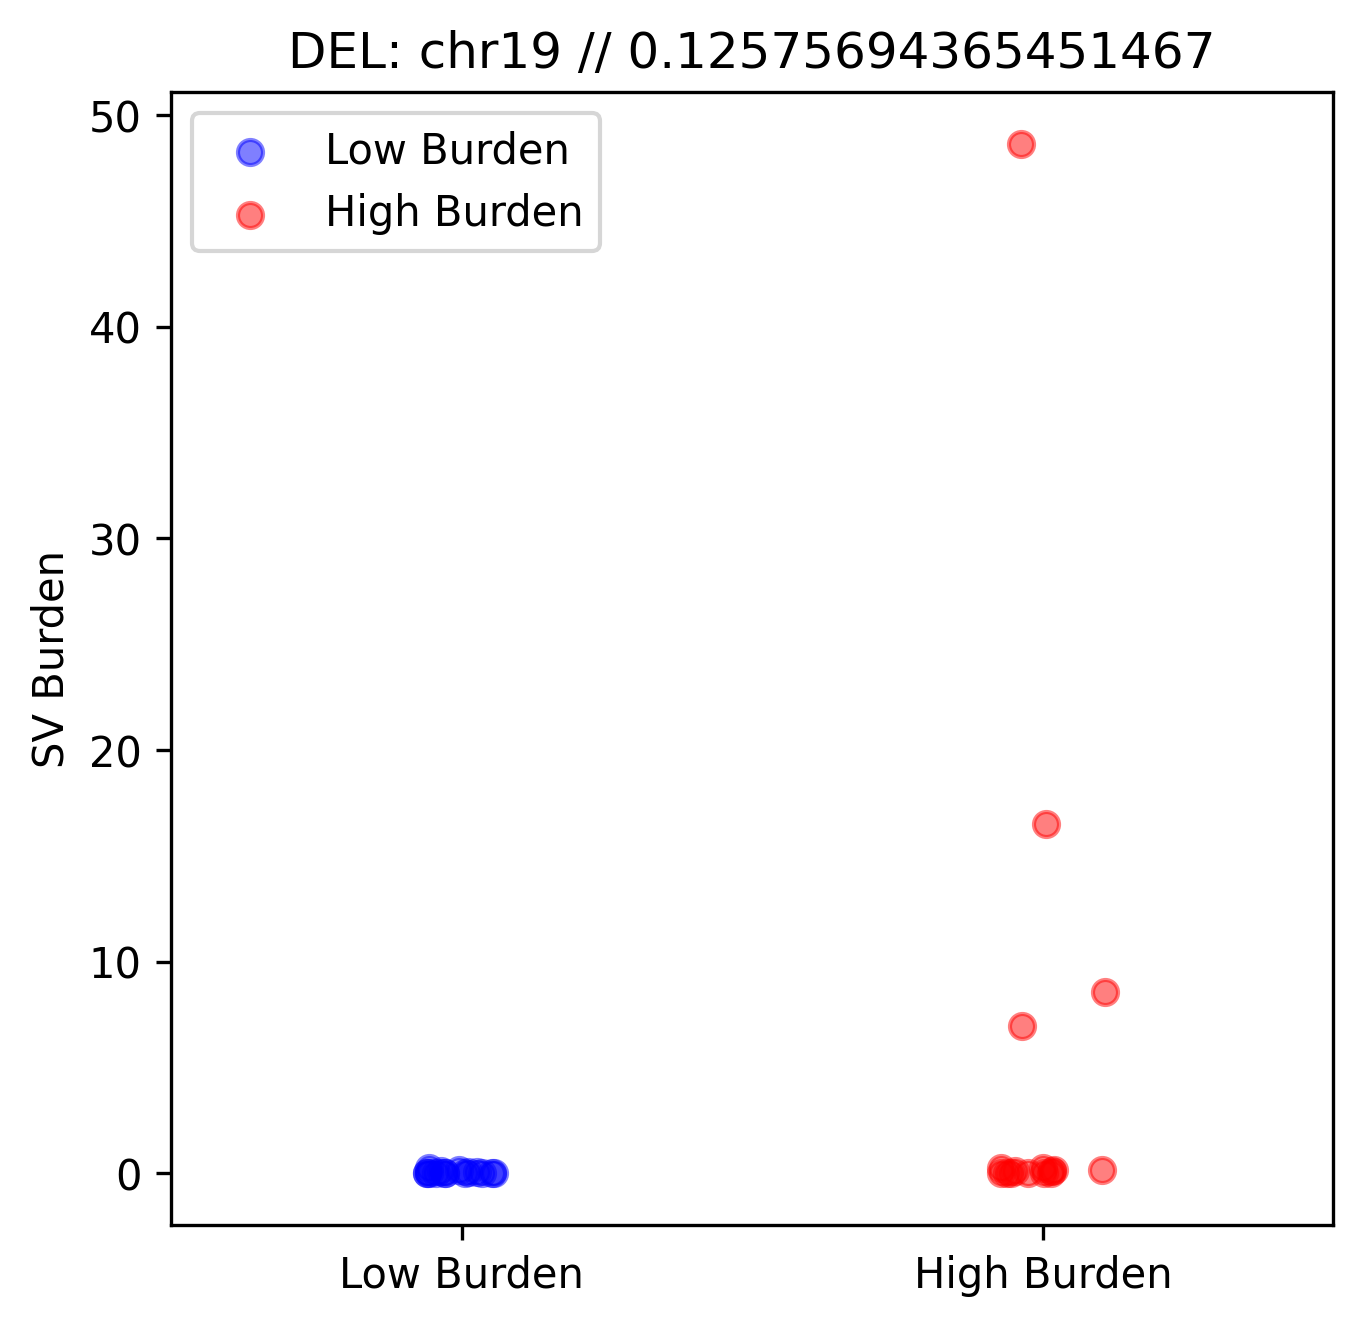

chr20
t-statistic: -1.500749576607628
p-value: 0.14970664830641633


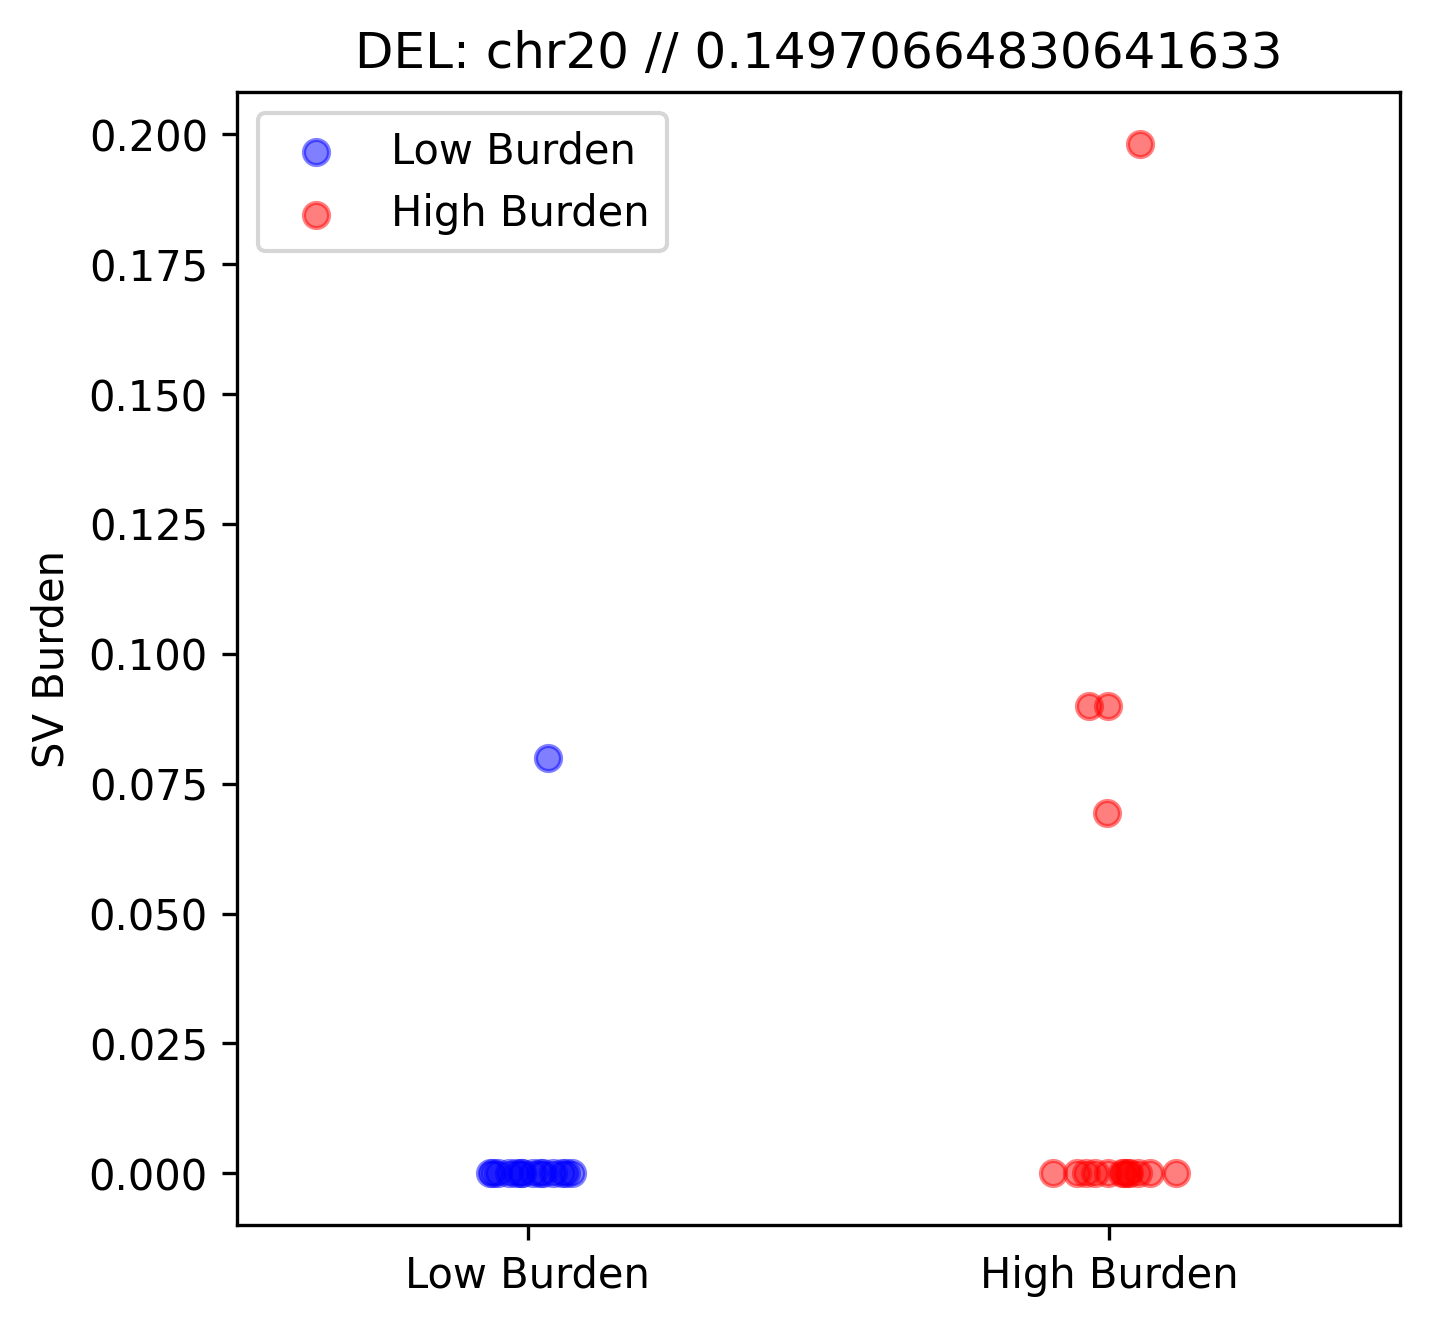

chr21
t-statistic: -0.6248233152452671
p-value: 0.5379288605818728


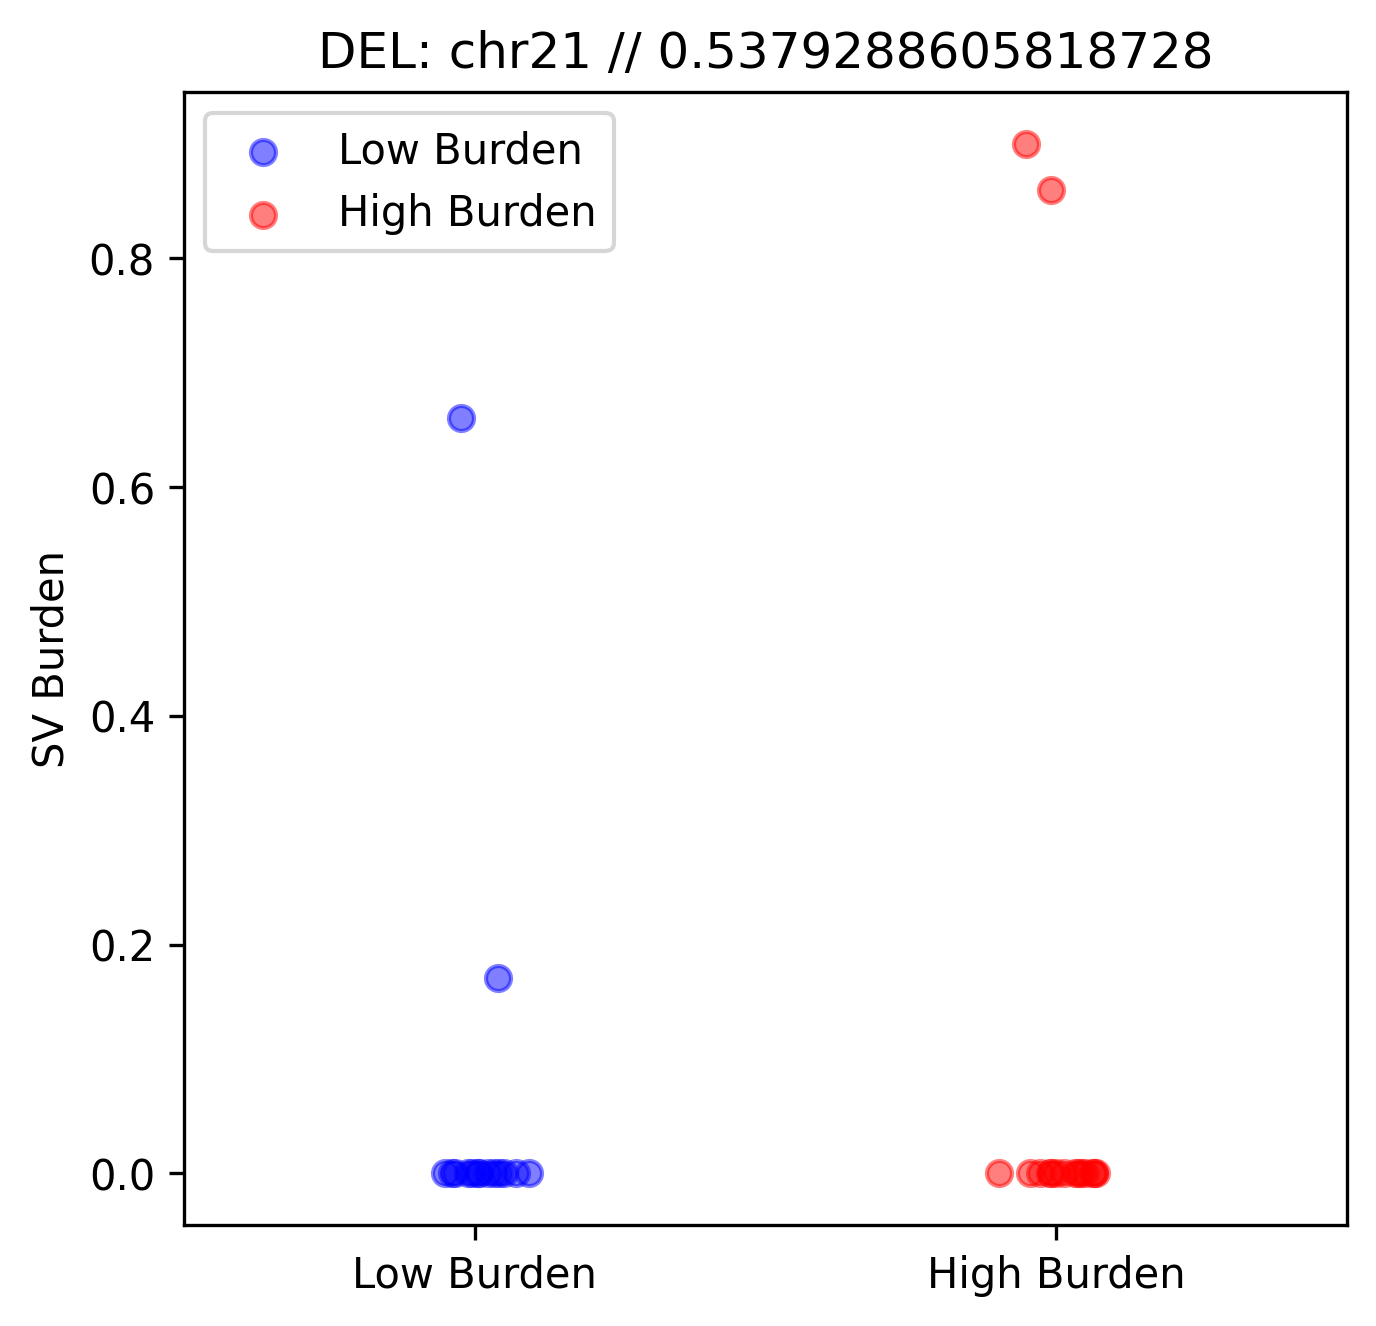

chr22
t-statistic: -2.109170251333536
p-value: 0.052114915070053856


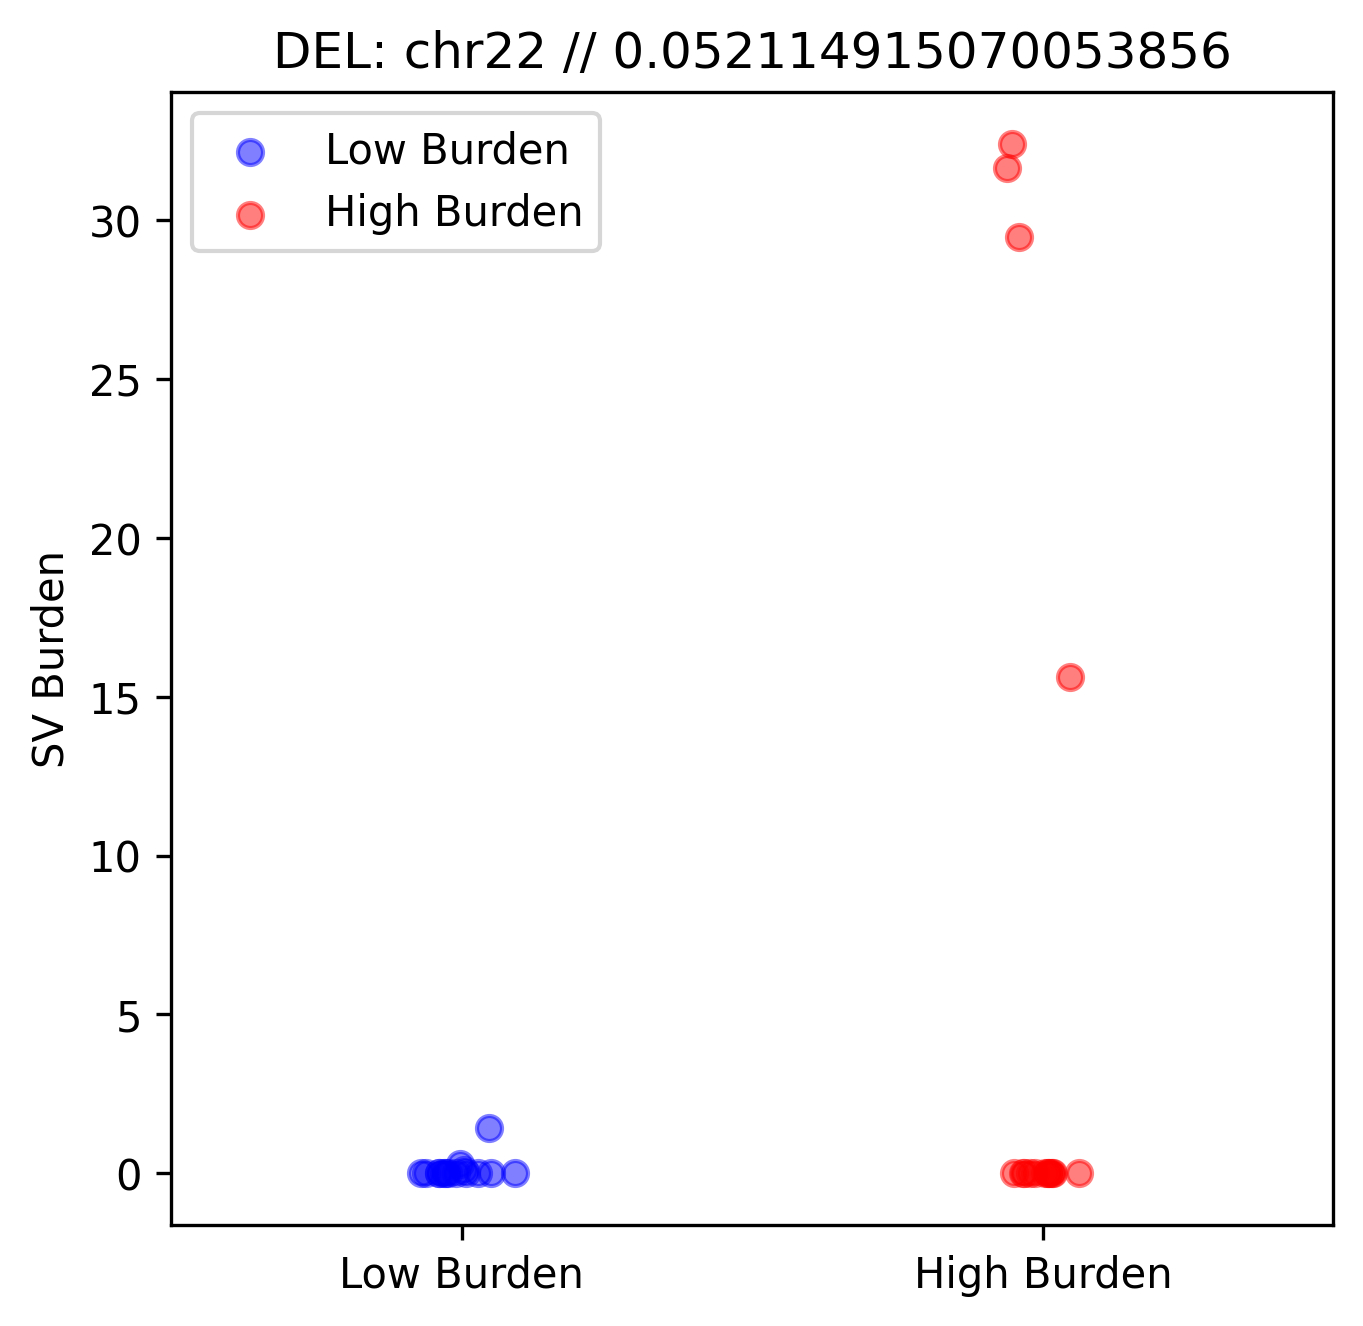

chrX
t-statistic: -1.132104553171212
p-value: 0.2674315731205165


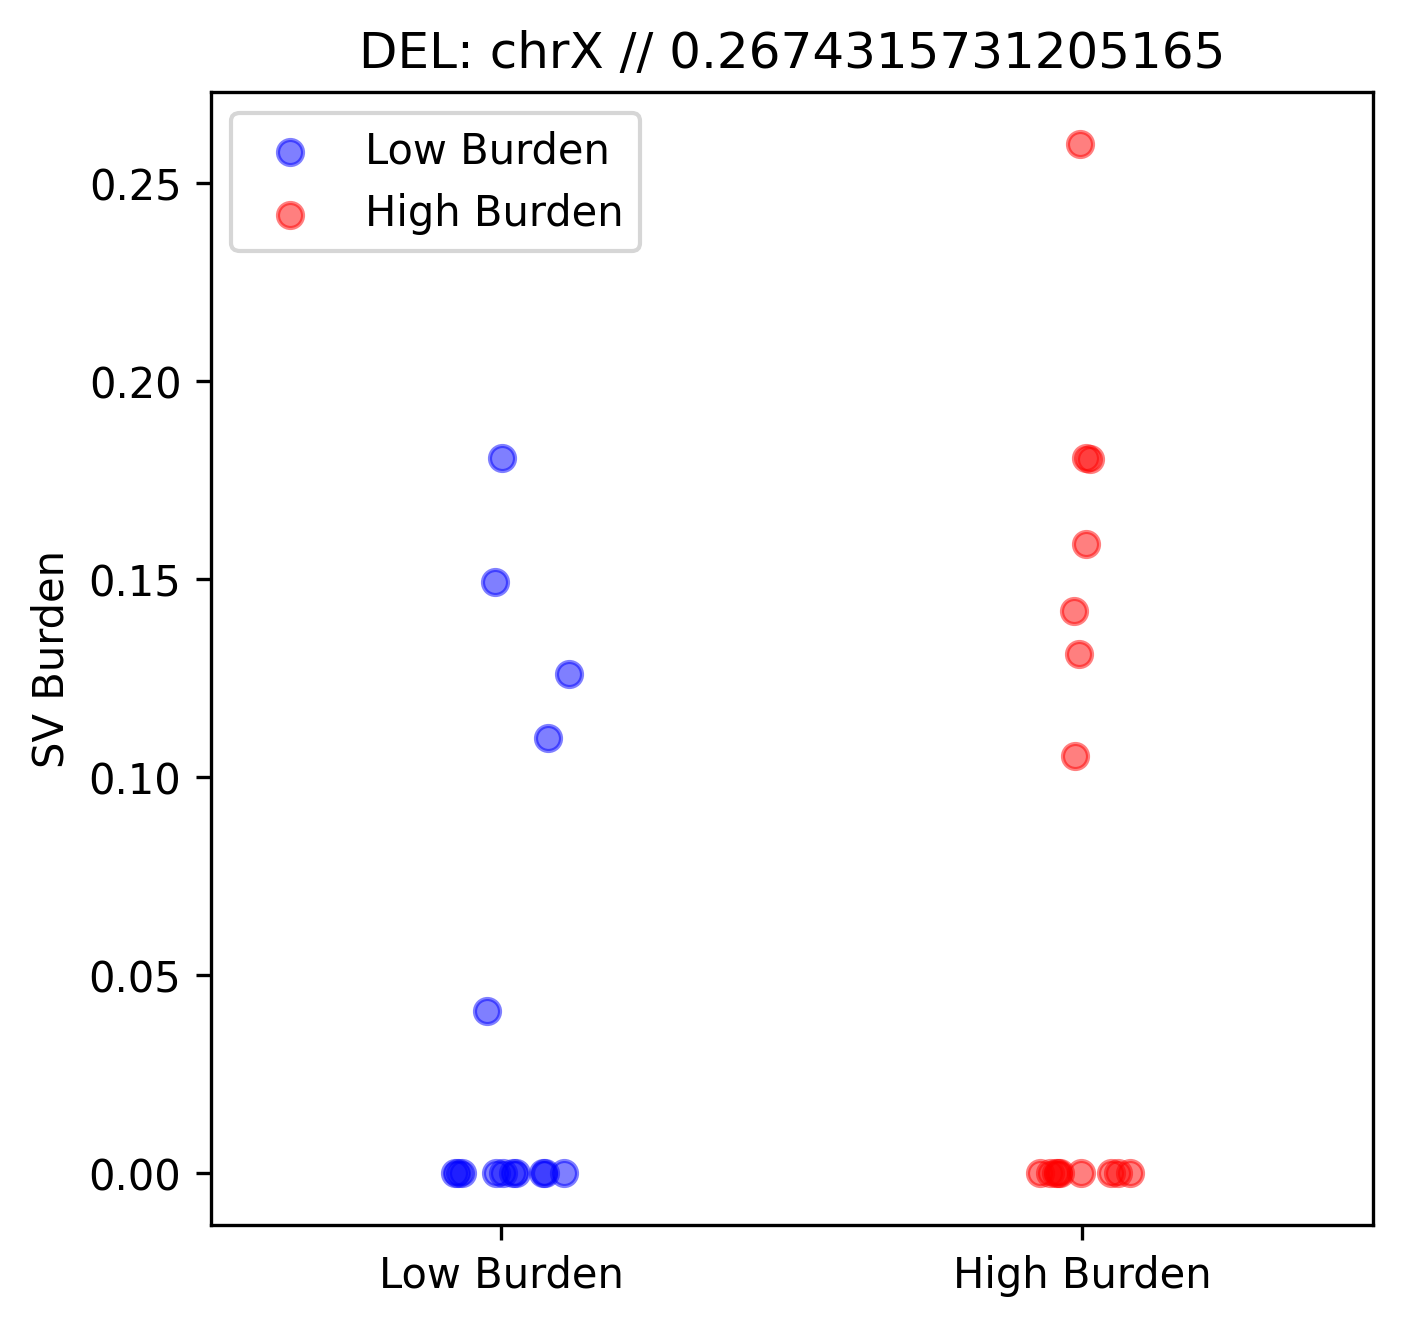

In [14]:
for chrom in chromosomes:
    
    print(chrom)
    temp_low_burden_by_chrom = []
    temp_high_burden_by_chrom = []
    
    ###
    for s_id in low_burden_sample_id:
        
        temp_low_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])
    
    ###
    for s_id in high_burden_sample_id:
        
        temp_high_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])
    
    # Perform T-test
    t_stat, p_value = stats.ttest_ind(temp_low_burden_by_chrom, temp_high_burden_by_chrom, equal_var=False)
    print("t-statistic:", t_stat)
    print("p-value:", p_value)
        
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

    # Define data for plotting
    data = [temp_low_burden_by_chrom, temp_high_burden_by_chrom]
    positions = [1.5, 2.5]  
    labels = ['Low Burden', 'High Burden']
    colors = ['blue', 'red']

    # Add scatter plot with jitter for individual data points
    for pos, single_data, color, label in zip(positions, data, colors, labels):
        jitter = np.random.normal(pos, 0.05, size=len(single_data))
        ax.scatter(jitter, single_data, alpha=0.5, color=color, label=label)

    # Styling and labels
    ax.set_title('DEL: ' + chrom + ' // ' + str(p_value))
    ax.set_ylabel('SV Burden')
    ax.set_xticks(positions)
    ax.set_xticklabels(labels)
    ax.legend()

    # Adjust x-axis limits
    ax.set_xlim(1, 3)

    plt.show()


## Large duplications

In [15]:
### Load filtered large duplications ###

##
somatic_large_DUP_path = '/Users/ryanyutian/Desktop/Manuscript/filtered_sv/DUP/'

somatic_large_DUP_dfs = {}

os.chdir(somatic_large_DUP_path)

temp_files = sorted([i for i in os.listdir(somatic_large_DUP_path) if 'DS' not in i])

for file_name in temp_files:
        
    somatic_large_DUP_dfs[file_name[:-4]] = pd.read_csv(file_name)

In [16]:
list(somatic_large_DUP_dfs.keys())

['A_RR_GBM809_DUP',
 'A_R_GBM607_DUP',
 'B_P_GBM593_DUP',
 'B_R_GBM898_DUP',
 'C_RR_GBM937_DUP',
 'C_R_GBM781_DUP',
 'D_P_GBM620_DUP',
 'D_R_GBM691_DUP',
 'E_P_GBM454_DUP',
 'E_R_GBM833_DUP',
 'F_P_GBM460_DUP',
 'F_R_GBM492_DUP',
 'G_P_GBM401_DUP',
 'G_RR_GBM551_DUP',
 'G_R_GBM498_DUP',
 'H_P_GBM529_DUP',
 'H_R_GBM832_DUP',
 'I_P_BT2013110_DUP',
 'I_R_GBM745_DUP',
 'J_P_GBM703_DUP',
 'J_R_SMTB781_DUP',
 'X_P_GBM440_DUP',
 'X_P_GBM577_DUP',
 'X_P_GBM618_DUP',
 'X_P_GBM672_DUP',
 'X_P_SMTB123_DUP',
 'X_R_GBM945_DUP',
 'X_R_SMTB135_DUP',
 'X_R_SMTB241_DUP',
 'X_R_SMTB302_DUP',
 'X_R_SMTB814_DUP']

In [17]:
large_DUP_burden_per_chrom_dicts = {}

for df_name in somatic_large_DUP_dfs:
    
    temp_output_dict = {}
    
    temp_df = somatic_large_DUP_dfs[df_name]
    
    for chrom in chromosomes:
        
        temp_chrom_df = temp_df[temp_df['CHROM']==chrom]
        
        temp_output_dict[chrom] = calculate_total_coverage(temp_chrom_df)/1e6
        
    large_DUP_burden_per_chrom_dicts[df_name + '_burden_by_chrom'] = temp_output_dict

In [18]:
large_DUP_burden_per_chrom_dicts

{'A_RR_GBM809_DUP_burden_by_chrom': {'chr1': 0.290325,
  'chr2': 0.0,
  'chr3': 0.257371,
  'chr4': 0.130862,
  'chr5': 0.0,
  'chr6': 0.0,
  'chr7': 0.0,
  'chr8': 42.5,
  'chr9': 0.080986,
  'chr10': 0.313059,
  'chr11': 0.0,
  'chr12': 25.752292,
  'chr13': 1.503271,
  'chr14': 0.128279,
  'chr15': 0.049213,
  'chr16': 0.0,
  'chr17': 0.0,
  'chr18': 0.0,
  'chr19': 0.0,
  'chr20': 0.0,
  'chr21': 0.0,
  'chr22': 0.107808,
  'chrX': 0.0},
 'A_R_GBM607_DUP_burden_by_chrom': {'chr1': 0.65978,
  'chr2': 0.11,
  'chr3': 0.1,
  'chr4': 0.227174,
  'chr5': 0.0,
  'chr6': 0.159595,
  'chr7': 41.61,
  'chr8': 0.0,
  'chr9': 0.3446,
  'chr10': 0.08,
  'chr11': 0.271498,
  'chr12': 0.21891,
  'chr13': 0.0,
  'chr14': 0.0,
  'chr15': 0.474321,
  'chr16': 0.0,
  'chr17': 0.28,
  'chr18': 0.0,
  'chr19': 0.0,
  'chr20': 0.056502,
  'chr21': 0.0,
  'chr22': 0.09,
  'chrX': 0.154345},
 'B_P_GBM593_DUP_burden_by_chrom': {'chr1': 0.483589,
  'chr2': 0.0,
  'chr3': 0.0,
  'chr4': 0.0,
  'chr5': 0.0,


In [19]:
for chrom in chromosomes:
    
    print(chrom)
    temp_low_burden_by_chrom = []
    temp_high_burden_by_chrom = []
    
    ###
    for s_id in low_burden_sample_id:
        
        temp_low_burden_by_chrom.append(large_DUP_burden_per_chrom_dicts[s_id + '_DUP_burden_by_chrom'][chrom])
    
    ###
    for s_id in high_burden_sample_id:
        
        temp_high_burden_by_chrom.append(large_DUP_burden_per_chrom_dicts[s_id + '_DUP_burden_by_chrom'][chrom])

        
    # Check for normality
    _, p1 = stats.shapiro(temp_low_burden_by_chrom)
    _, p2 = stats.shapiro(temp_high_burden_by_chrom)
    print("Normality Test P-values: Group1 =", p1, ", Group2 =", p2)

    # Check for equal variances
    _, p_levene = stats.levene(temp_low_burden_by_chrom, temp_high_burden_by_chrom)
    print("Levene's Test P-value:", p_levene)


chr1
Normality Test P-values: Group1 = 1.5219572446767415e-07 , Group2 = 7.429905508615775e-07
Levene's Test P-value: 0.20949801110292296
chr2
Normality Test P-values: Group1 = 0.009495995938777924 , Group2 = 4.5185873887021444e-07
Levene's Test P-value: 0.17722477047609705
chr3
Normality Test P-values: Group1 = 0.0015538940206170082 , Group2 = 1.038954269461101e-05
Levene's Test P-value: 0.23689915878594459
chr4
Normality Test P-values: Group1 = 0.0029284891206771135 , Group2 = 5.58404771311416e-08
Levene's Test P-value: 0.32863664408772175
chr5
Normality Test P-values: Group1 = 3.4795441024471074e-05 , Group2 = 3.7525973084484576e-07
Levene's Test P-value: 0.2206776150328749
chr6
Normality Test P-values: Group1 = 0.0006133818533271551 , Group2 = 3.583873331081122e-05
Levene's Test P-value: 0.8823018821357516
chr7
Normality Test P-values: Group1 = 1.8091748643200845e-05 , Group2 = 0.009823385626077652
Levene's Test P-value: 0.00024451234613785905
chr8
Normality Test P-values: Group1 =

chr1
t-statistic: -1.319938964829555
p-value: 0.20562578754546573


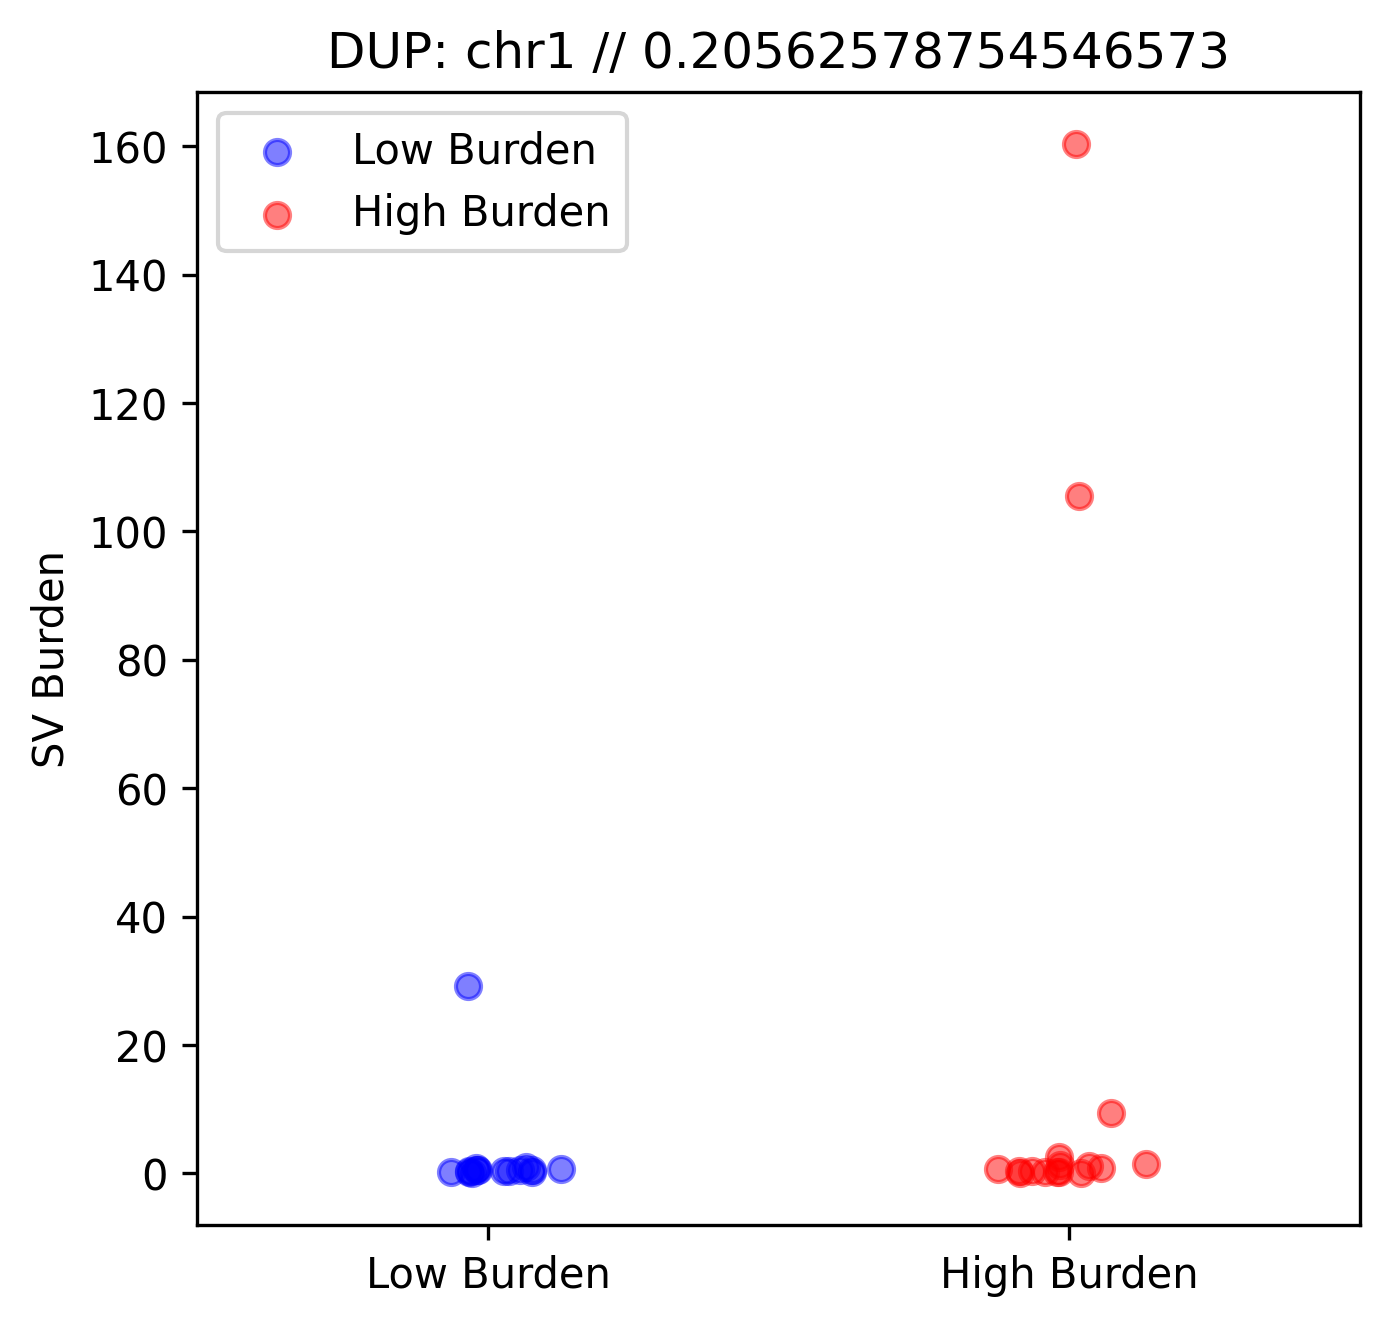

chr2
t-statistic: -1.4318345390868978
p-value: 0.17269833948145552


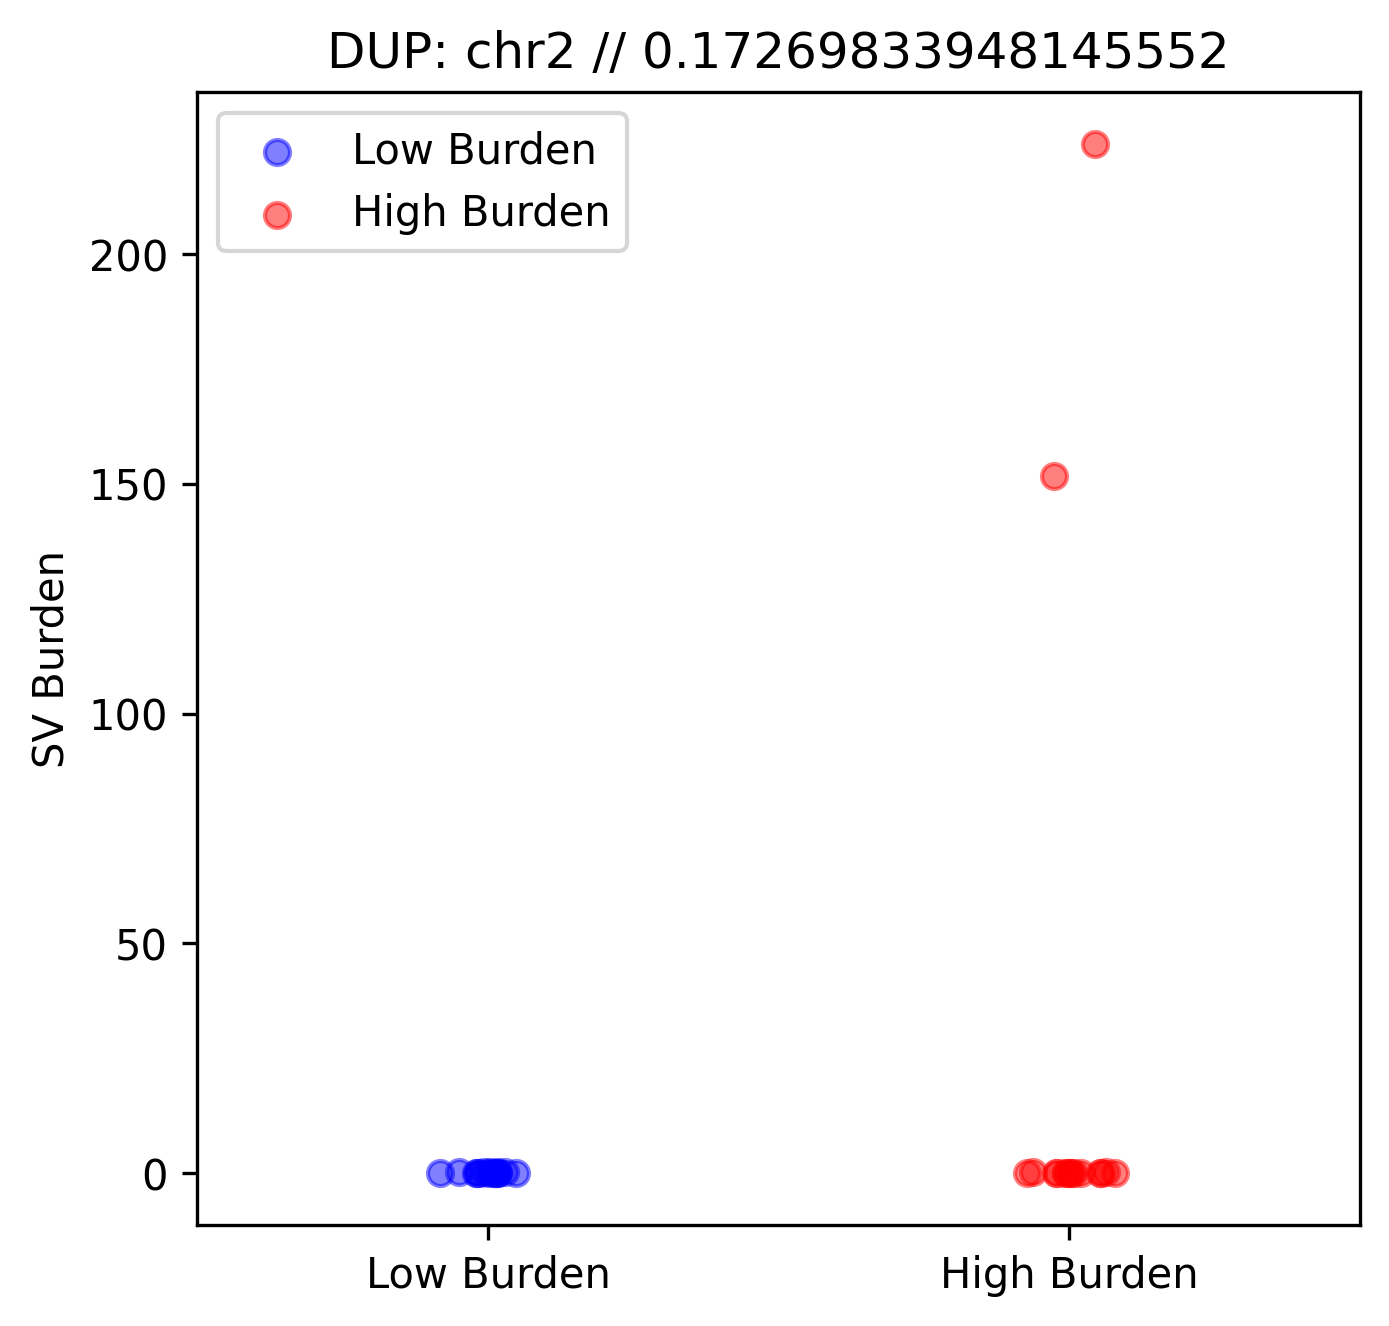

chr3
t-statistic: -1.164199785126893
p-value: 0.25927182230031337


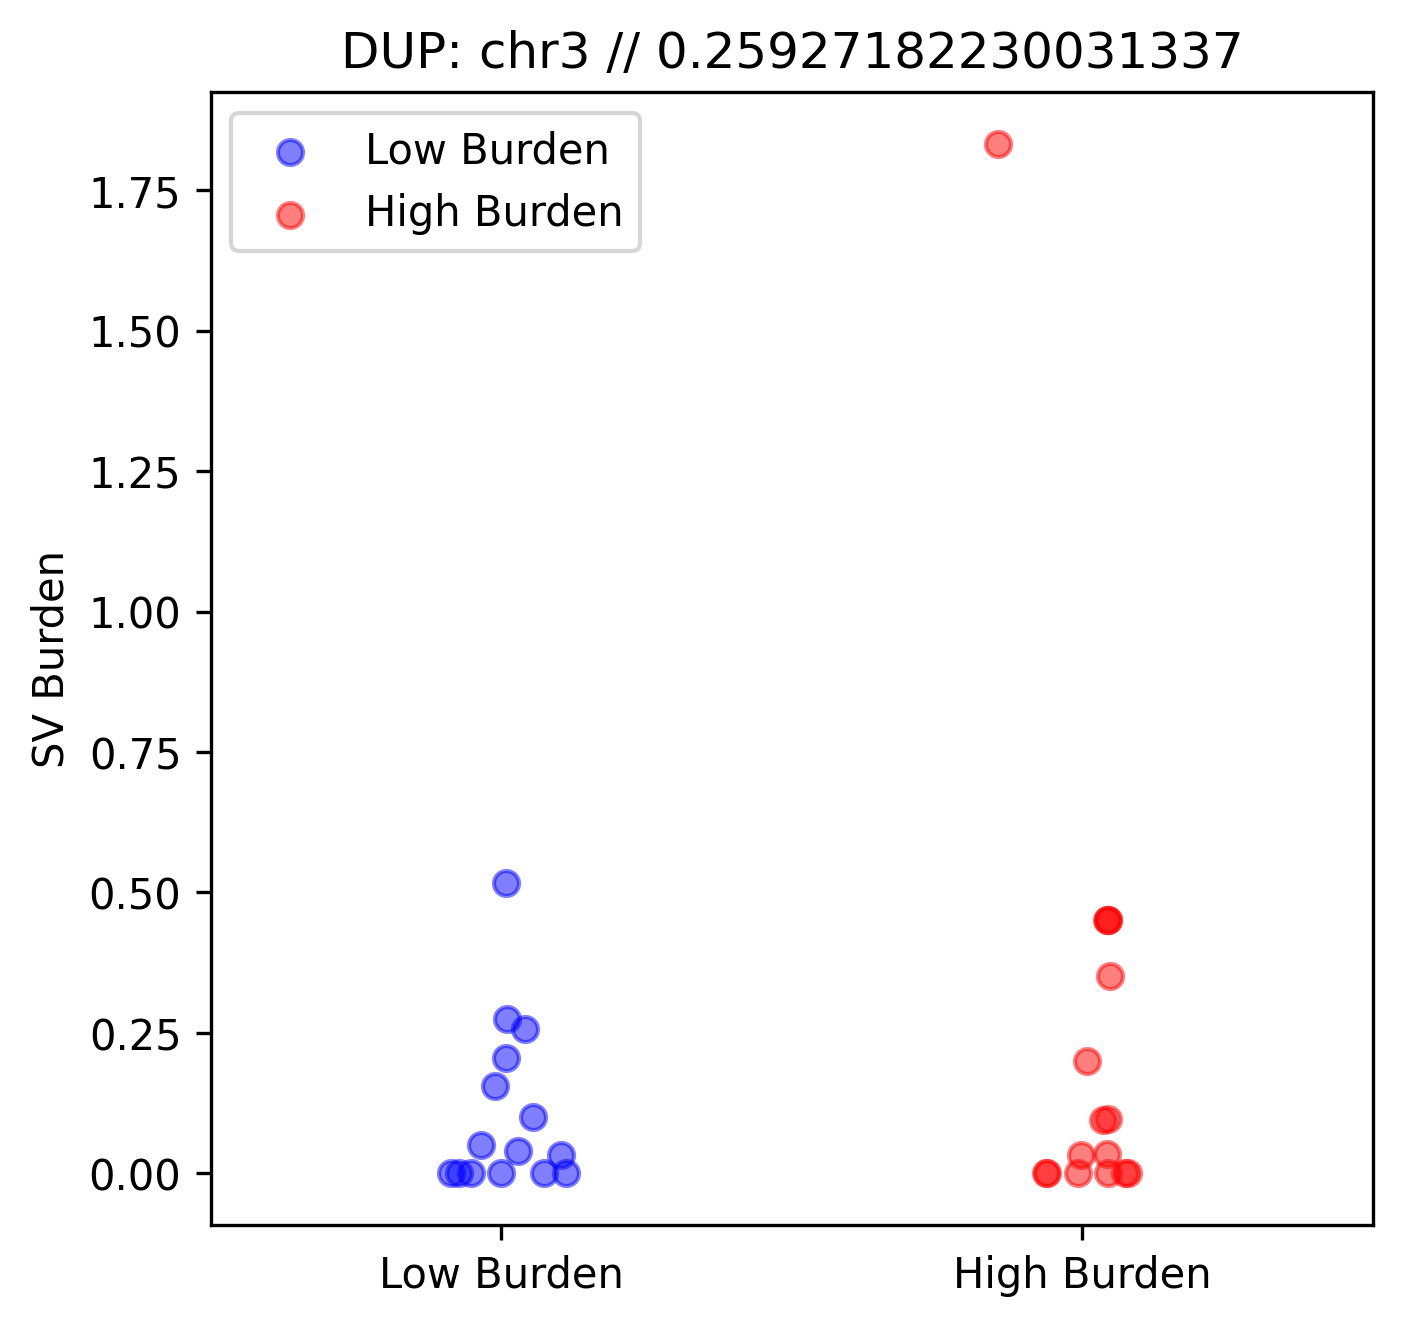

chr4
t-statistic: -1.0312342606410443
p-value: 0.31877089566329087


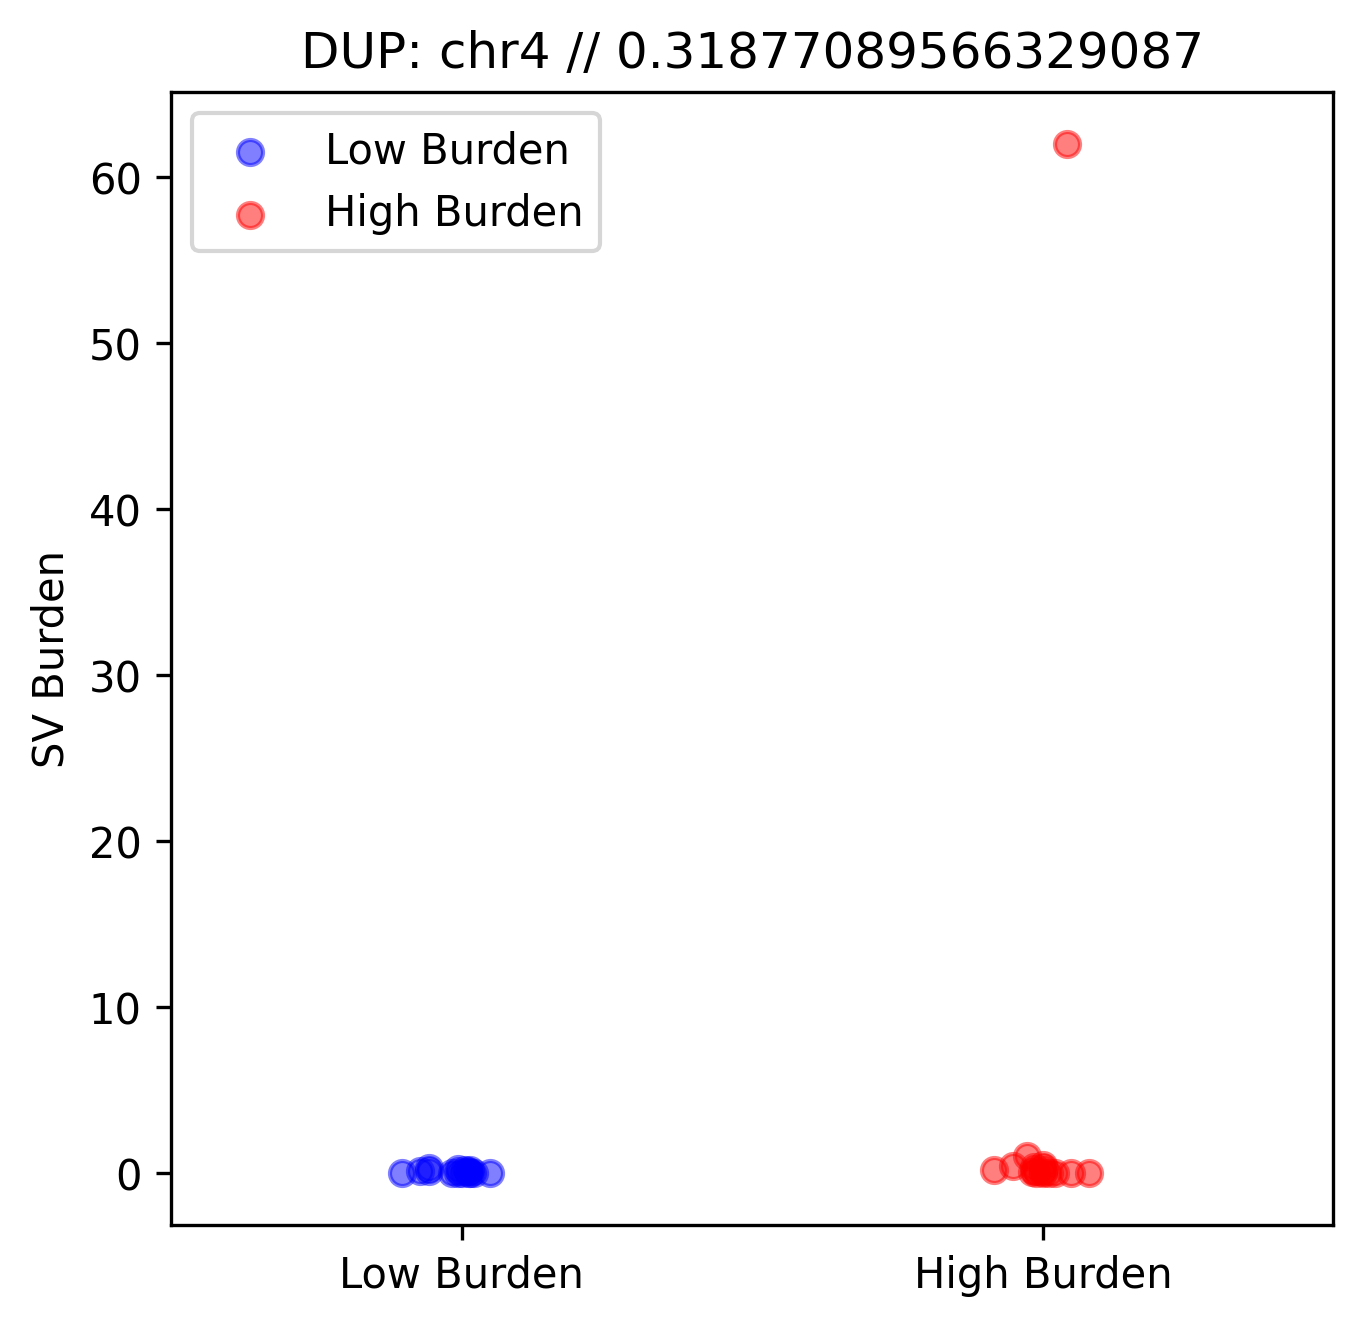

chr5
t-statistic: -1.2754308323518557
p-value: 0.22150247813246315


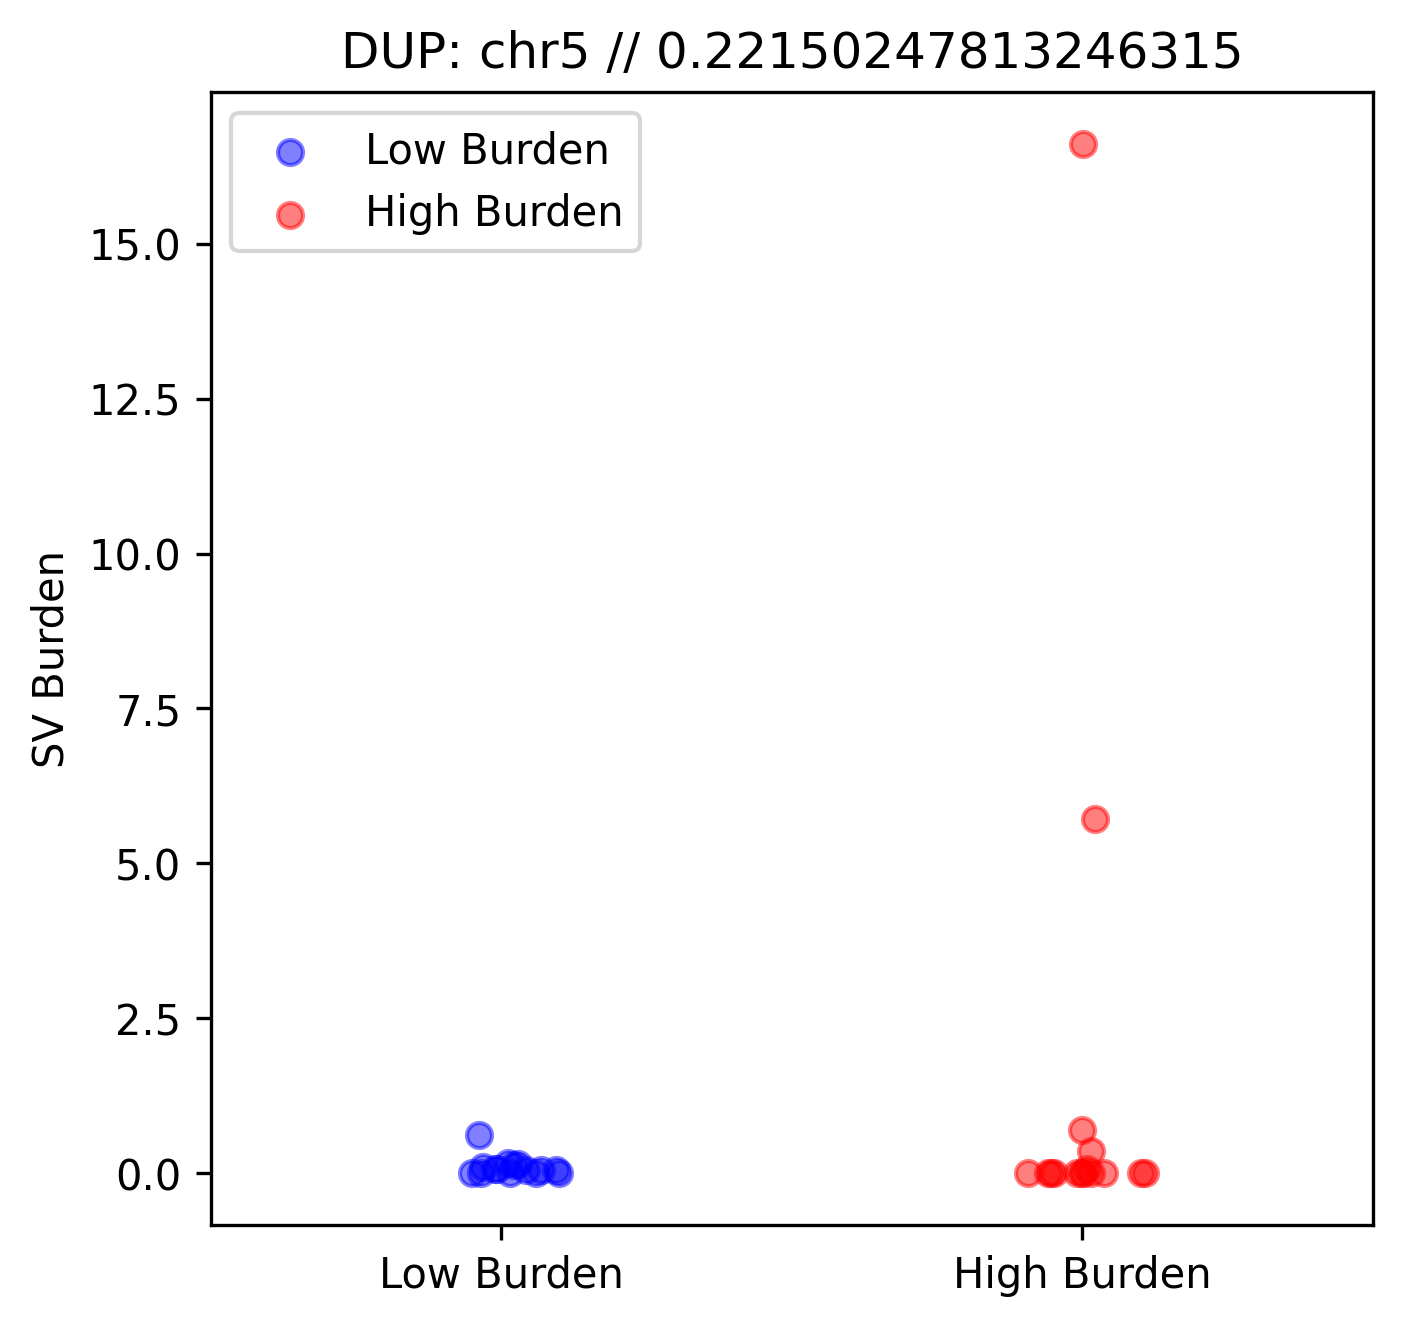

chr6
t-statistic: -0.09611587898420668
p-value: 0.9241162985304663


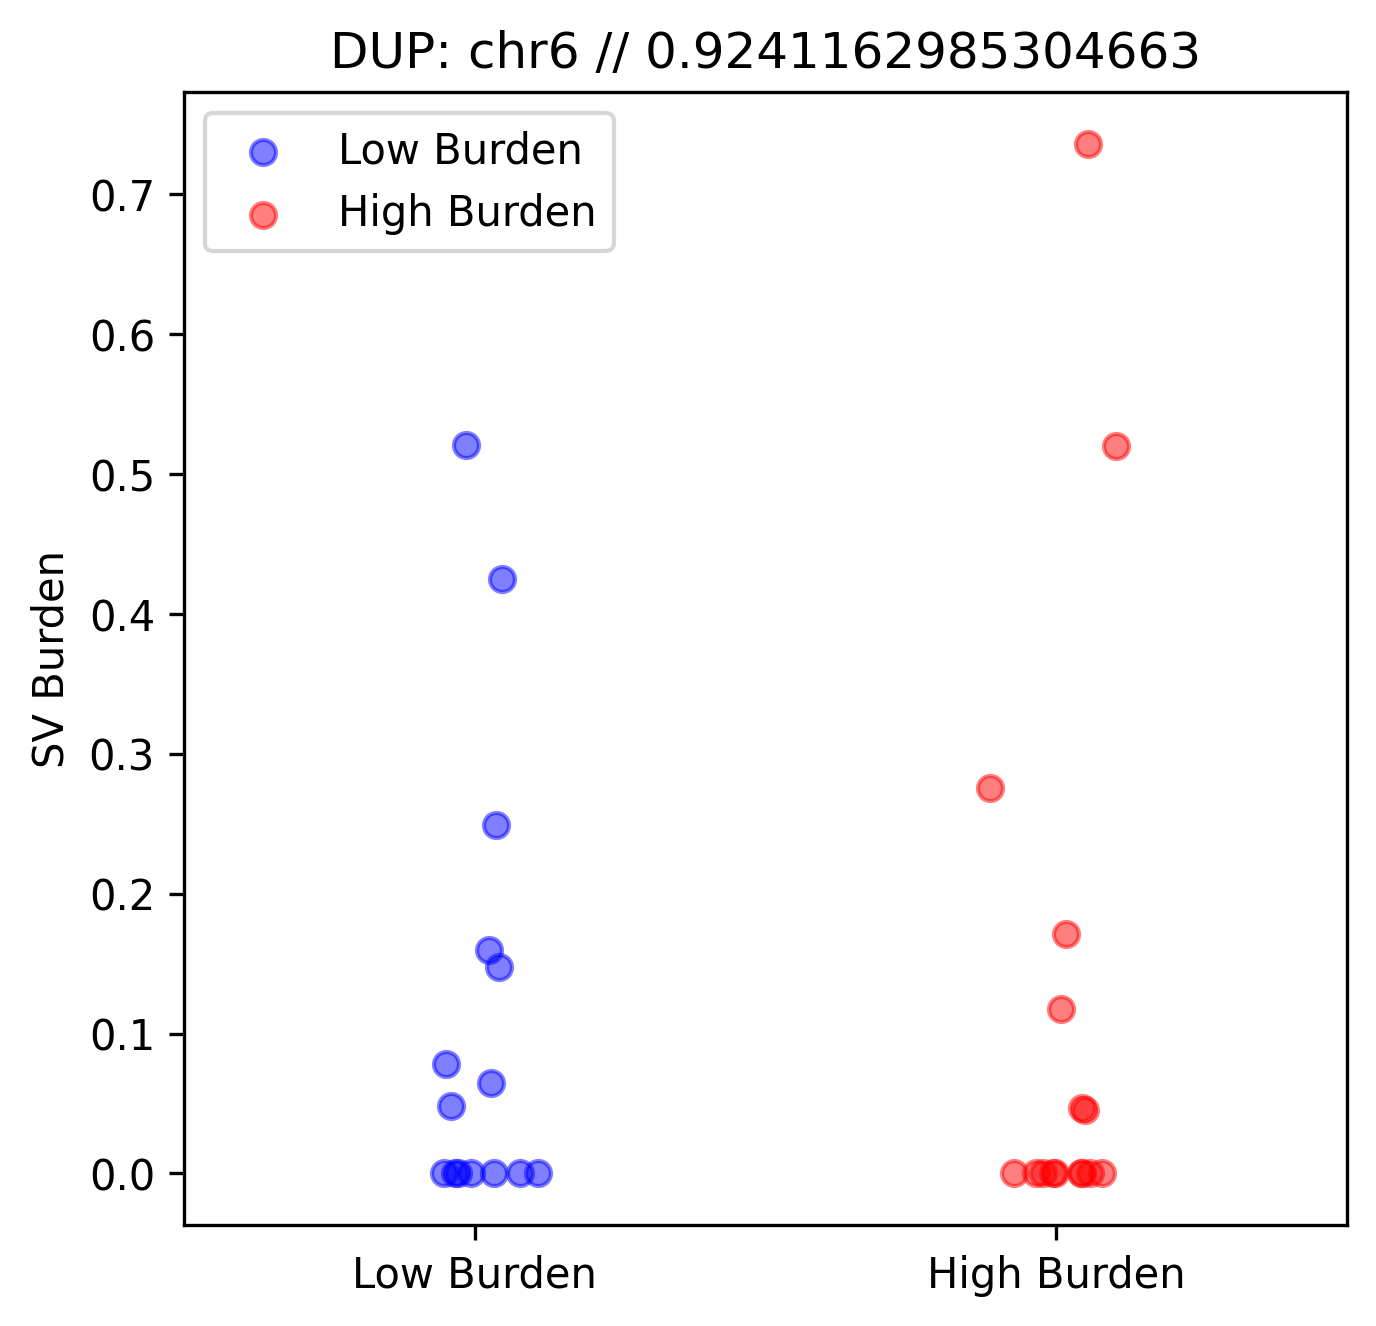

chr7
t-statistic: -4.467370463990419
p-value: 0.00029554679026626225


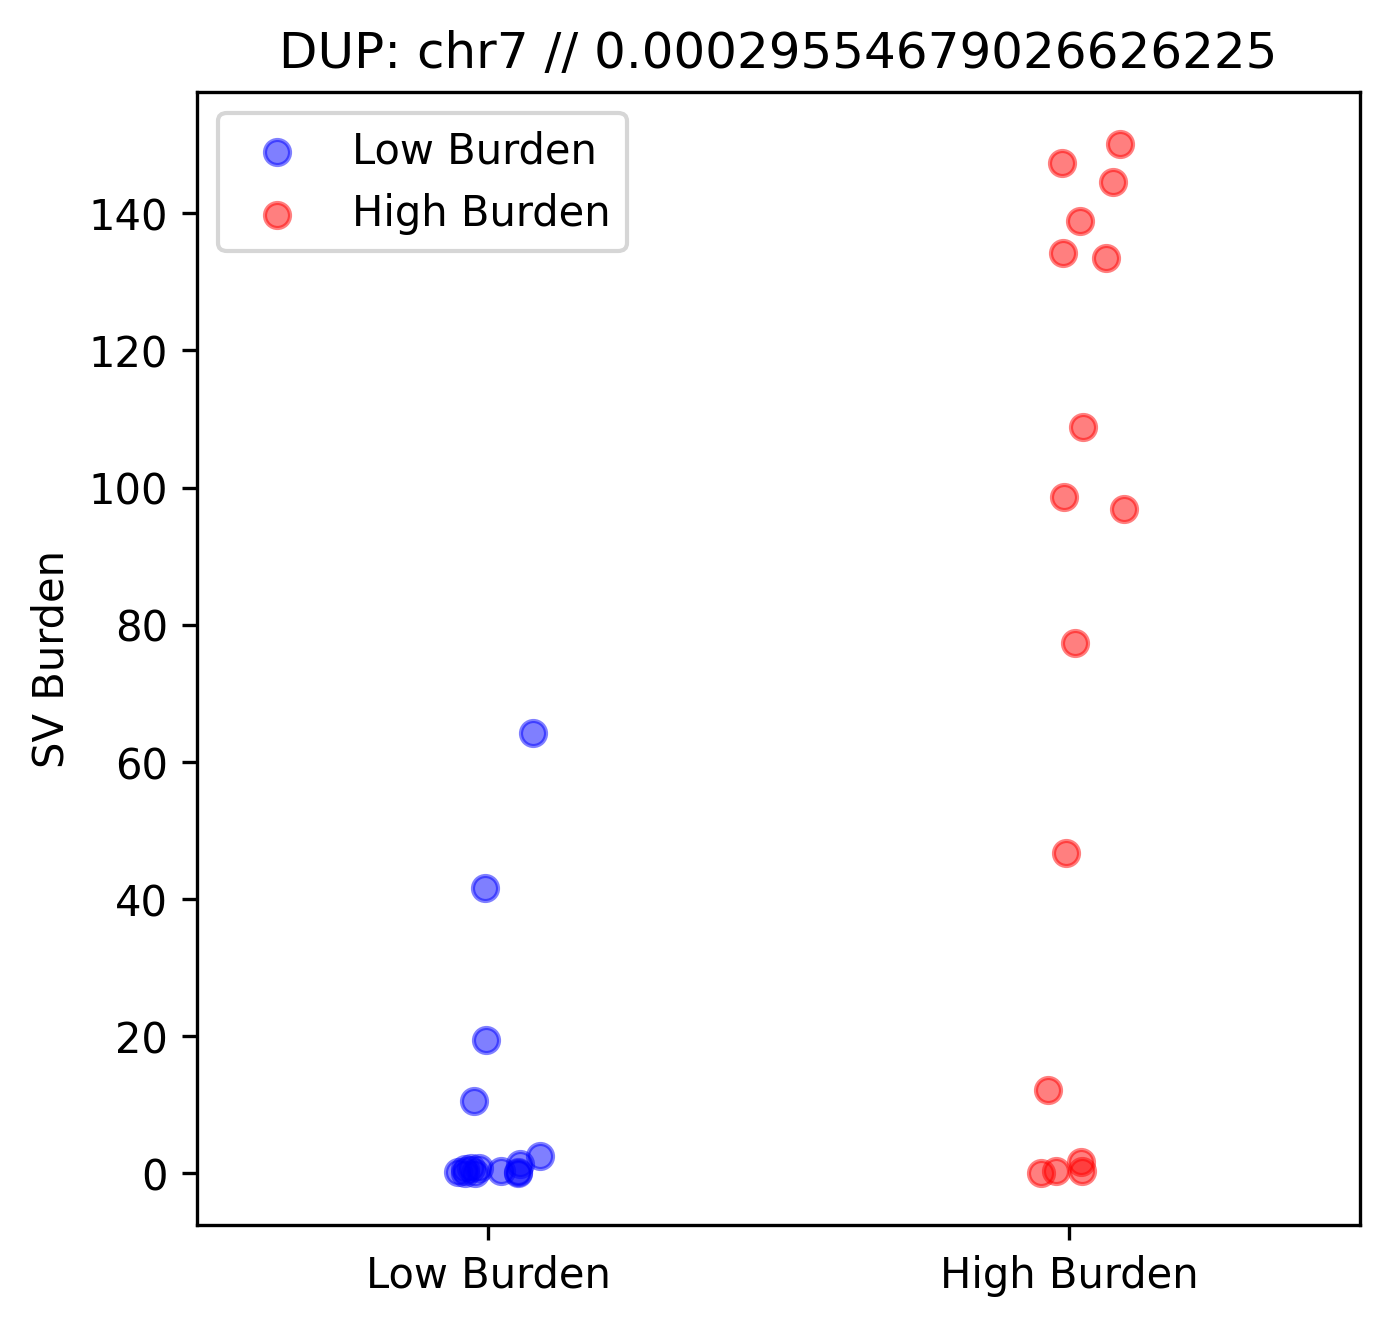

chr8
t-statistic: 0.9999006930264474
p-value: 0.33432277656182485


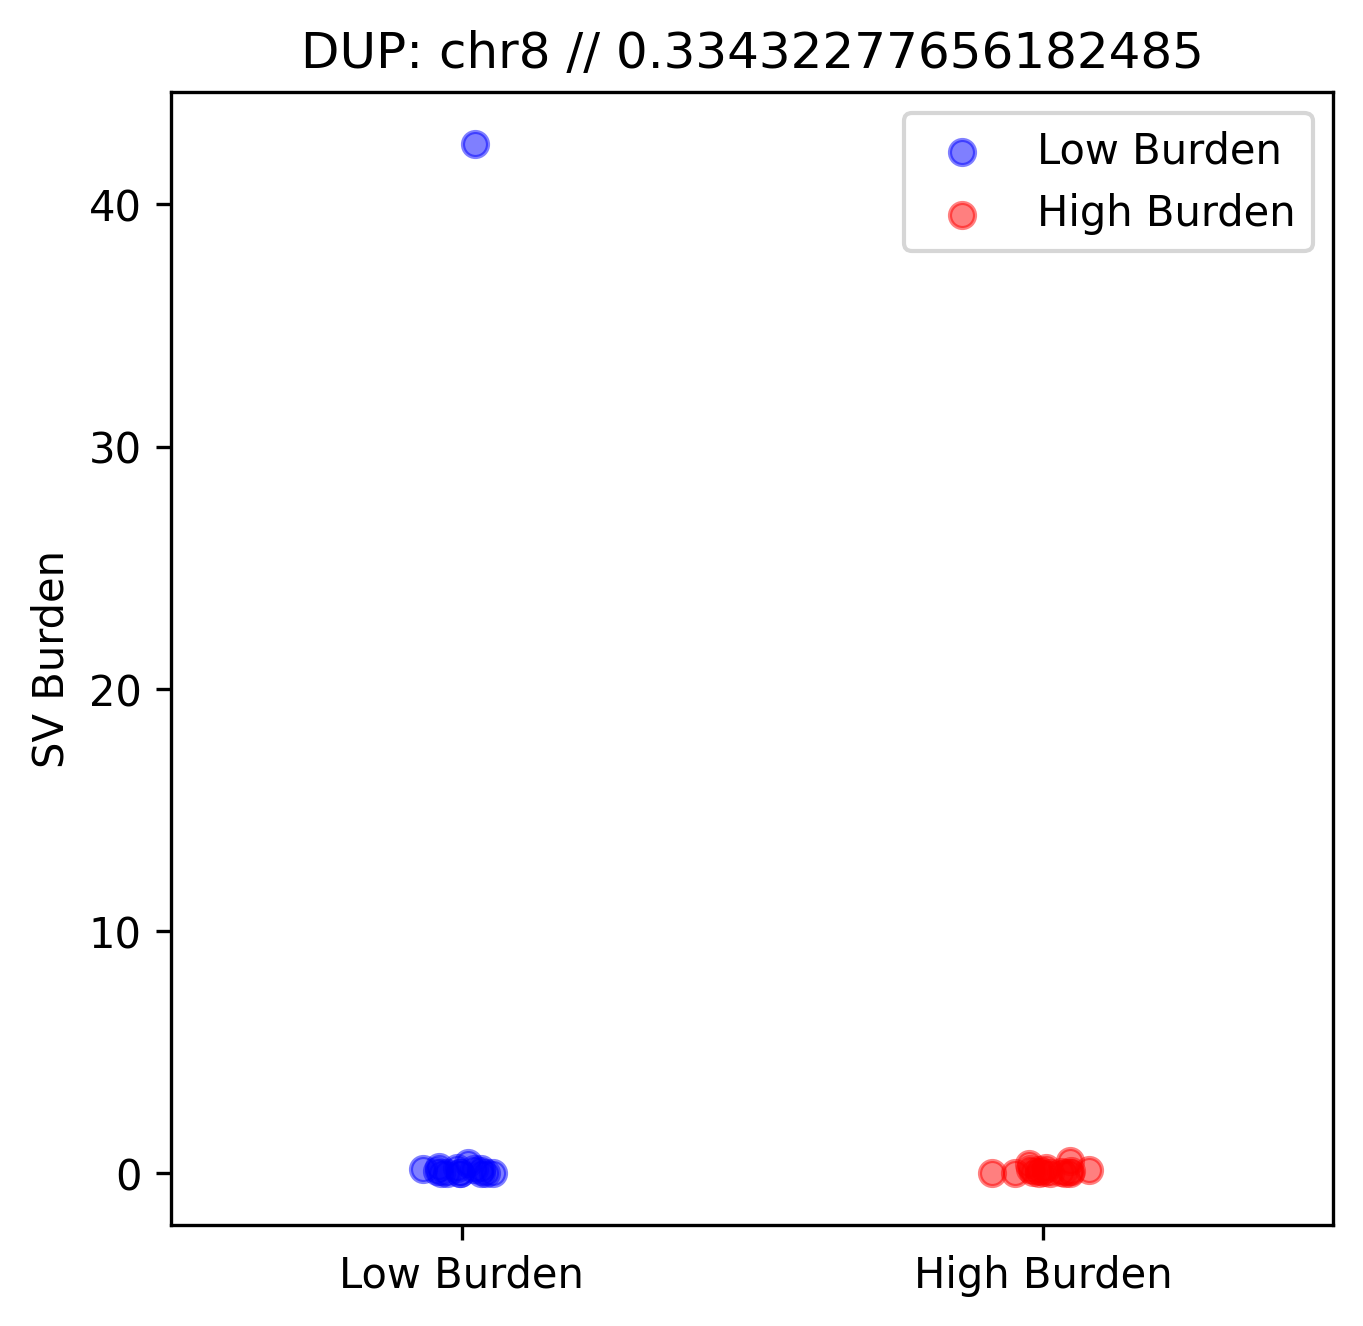

chr9
t-statistic: -1.4318376807595052
p-value: 0.16671313557937834


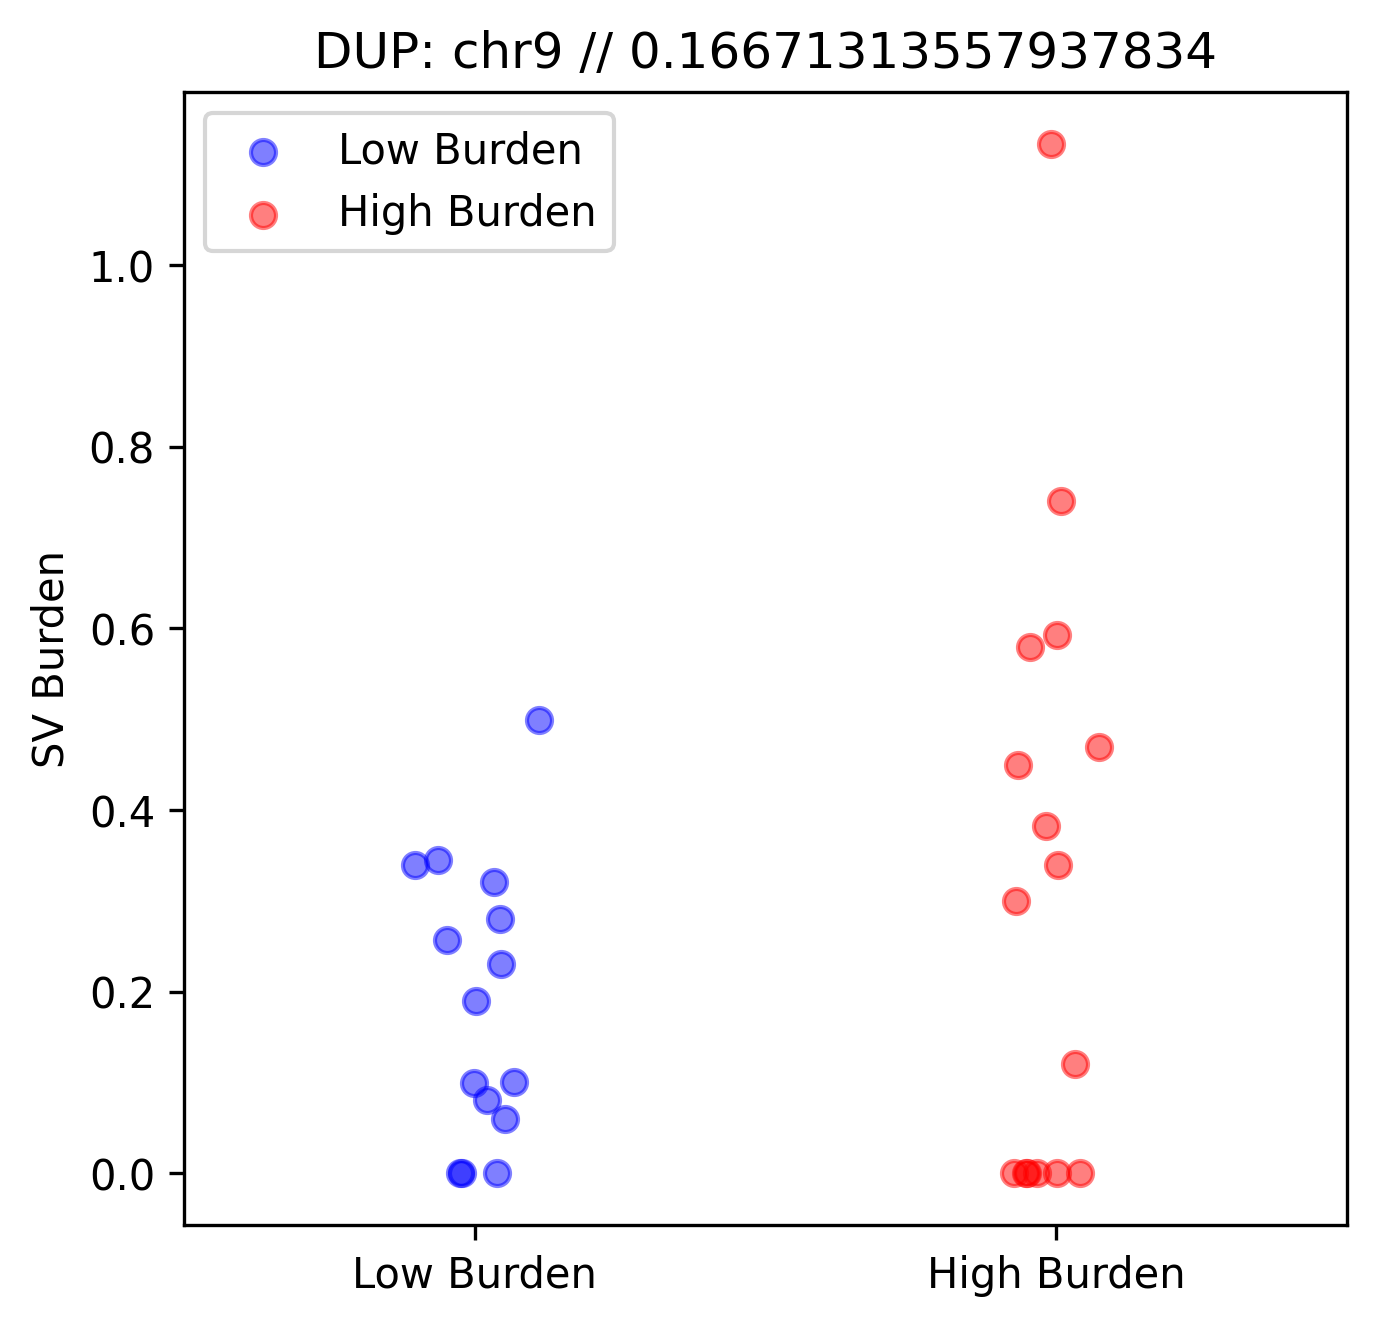

chr10
t-statistic: 1.0553679467973003
p-value: 0.3091170374429374


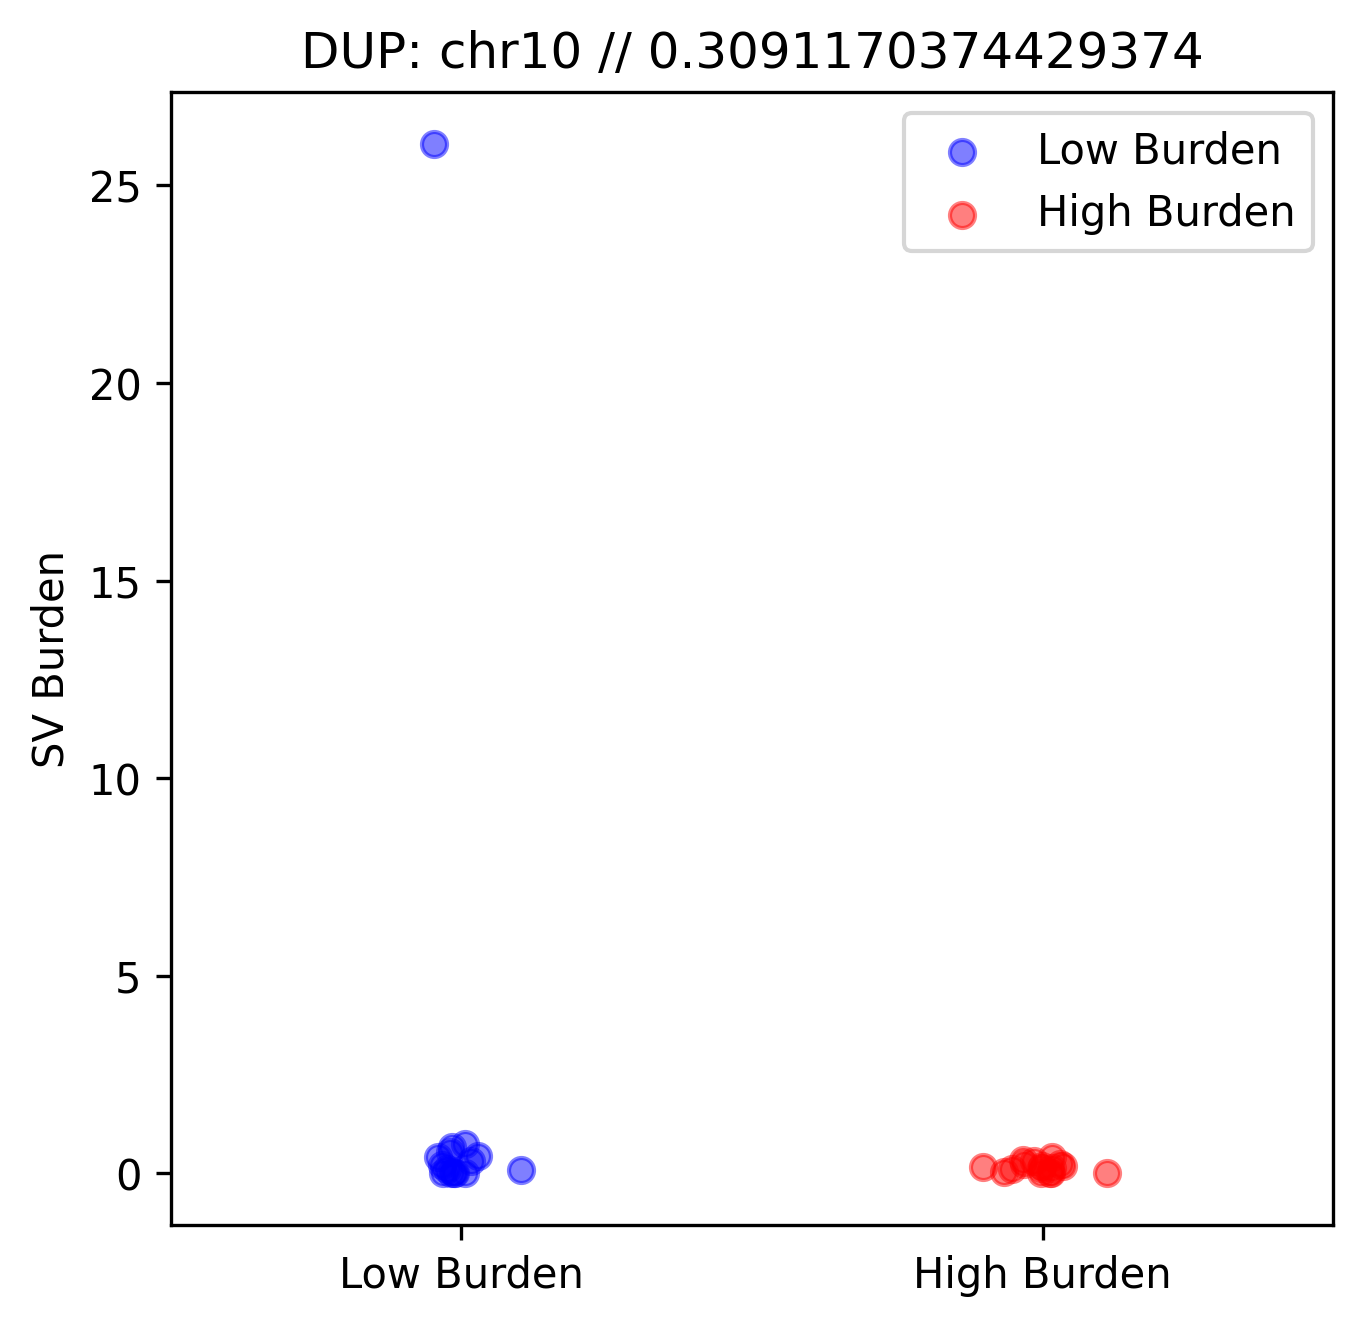

chr11
t-statistic: -1.72181014989438
p-value: 0.09975592389497967


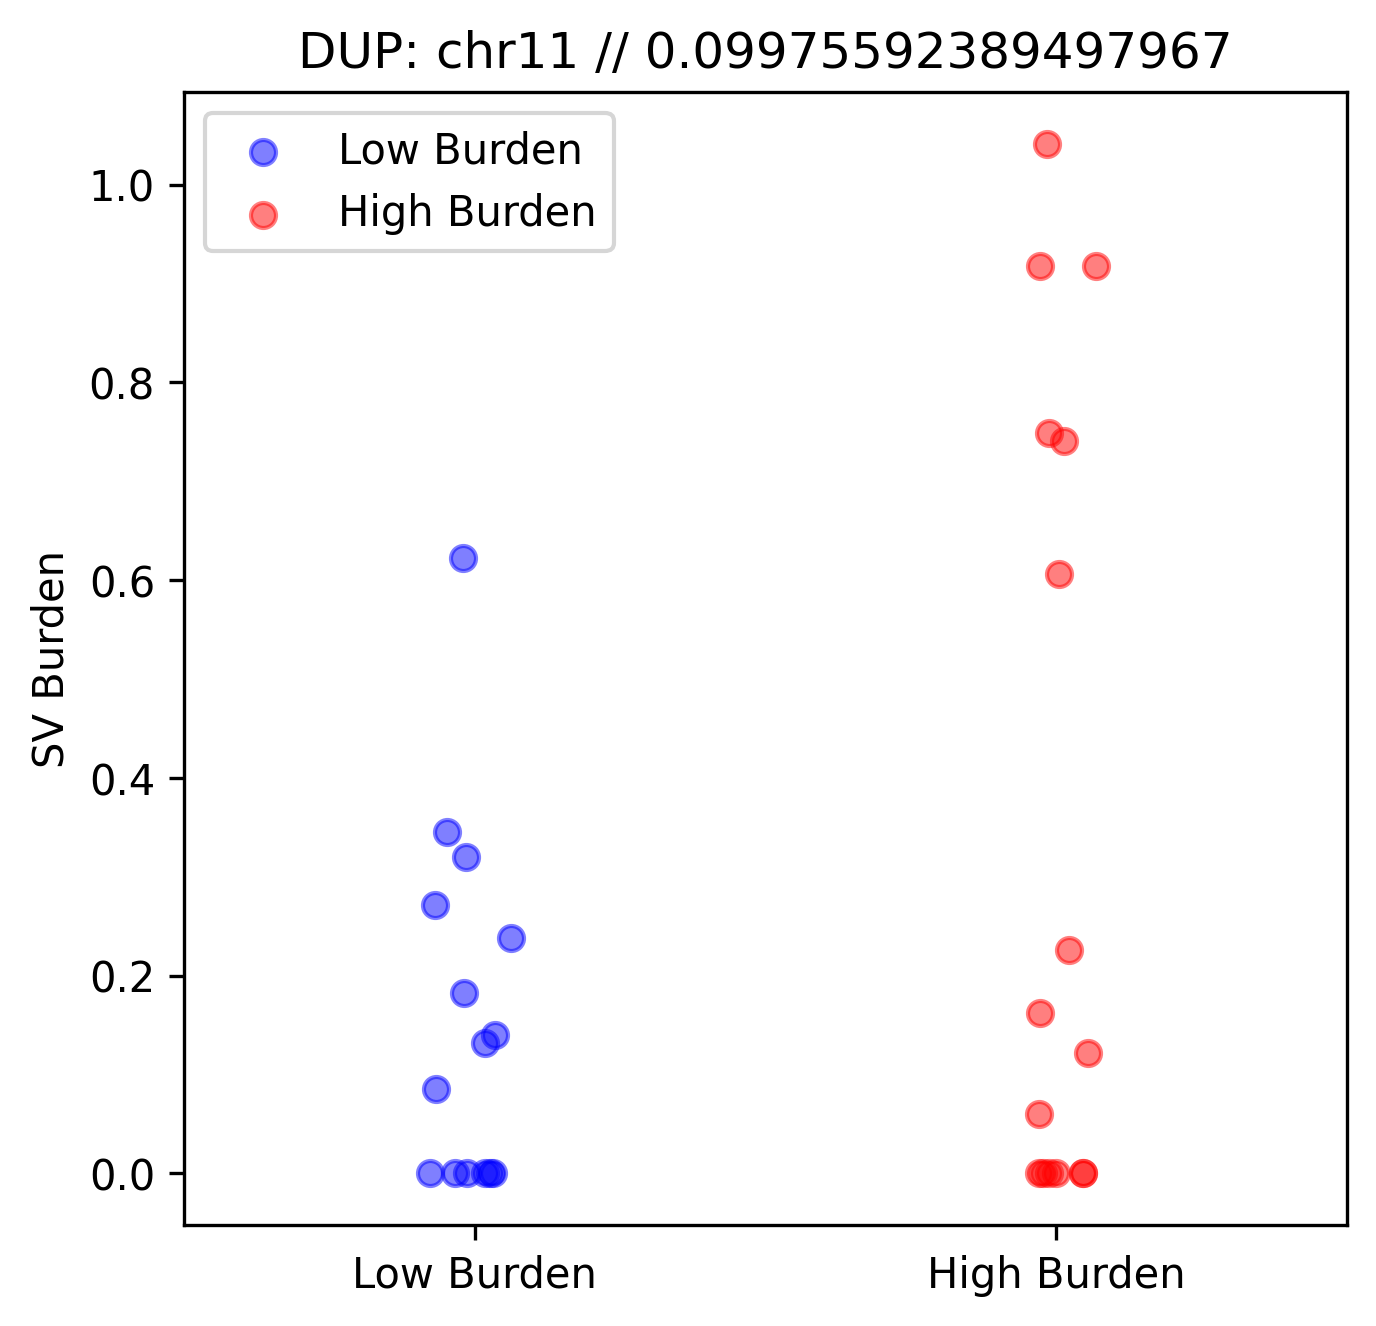

chr12
t-statistic: 0.9304618527393026
p-value: 0.3678706312418426


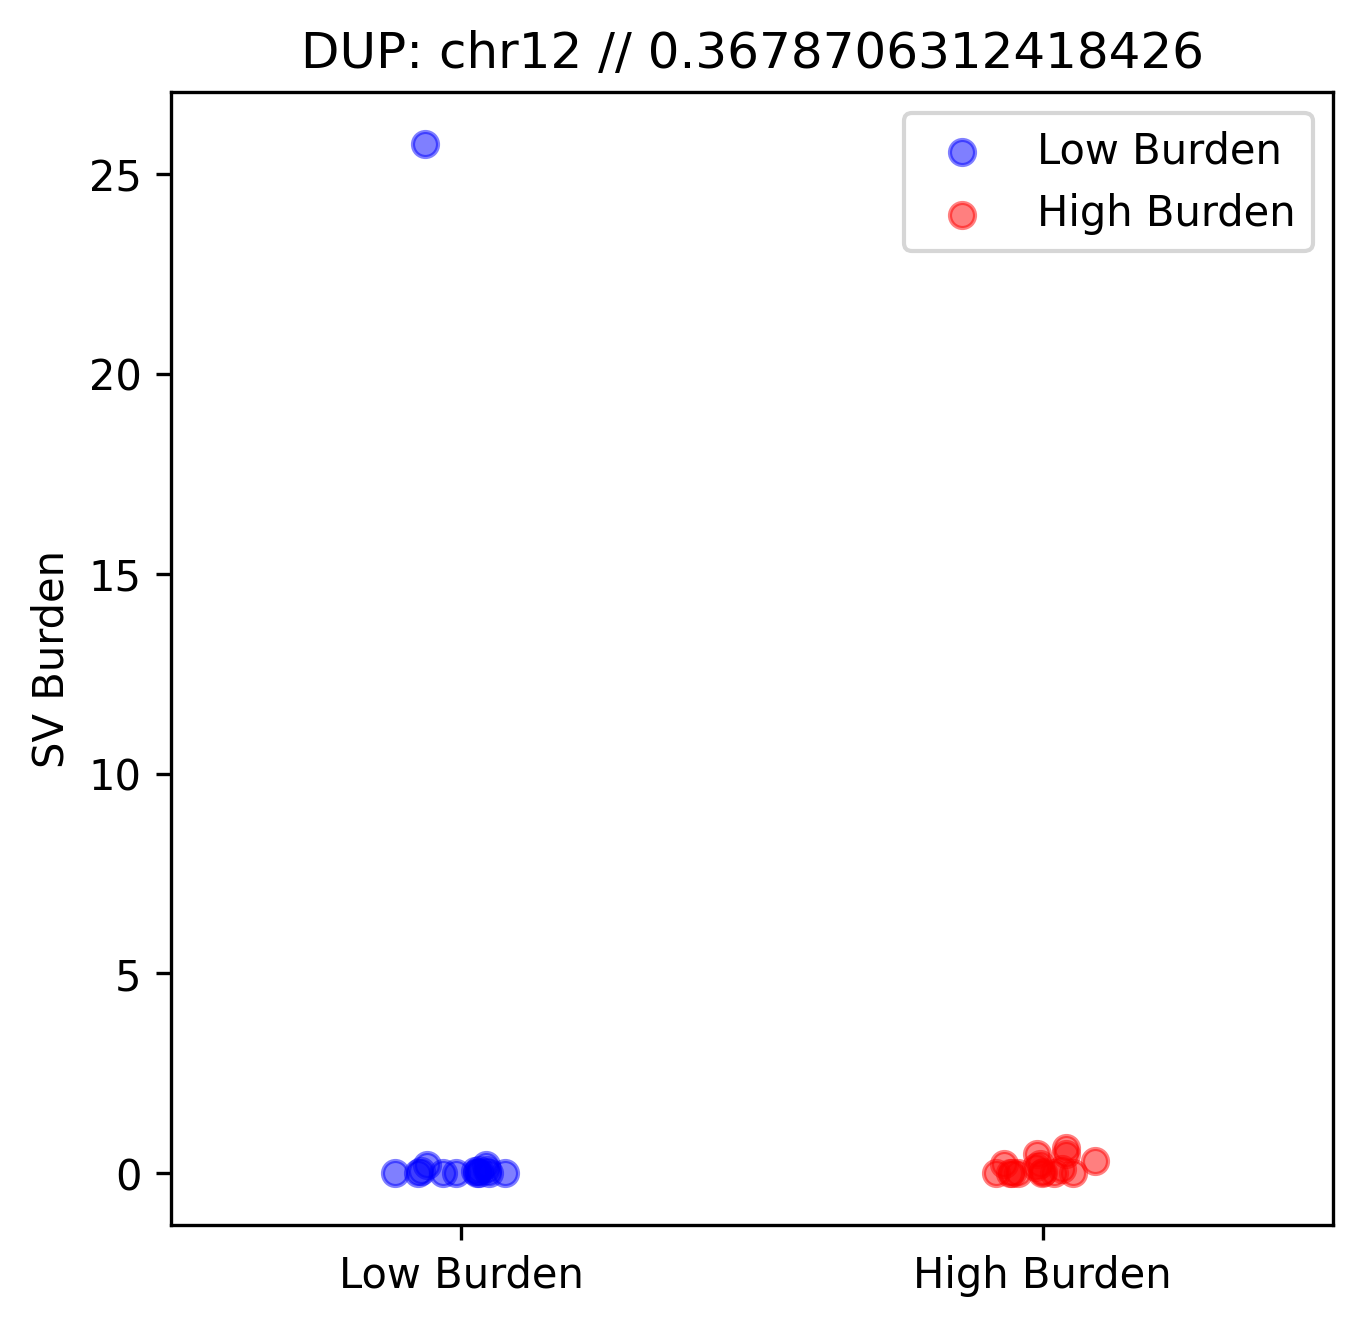

chr13
t-statistic: 1.037928374944245
p-value: 0.3168842896433552


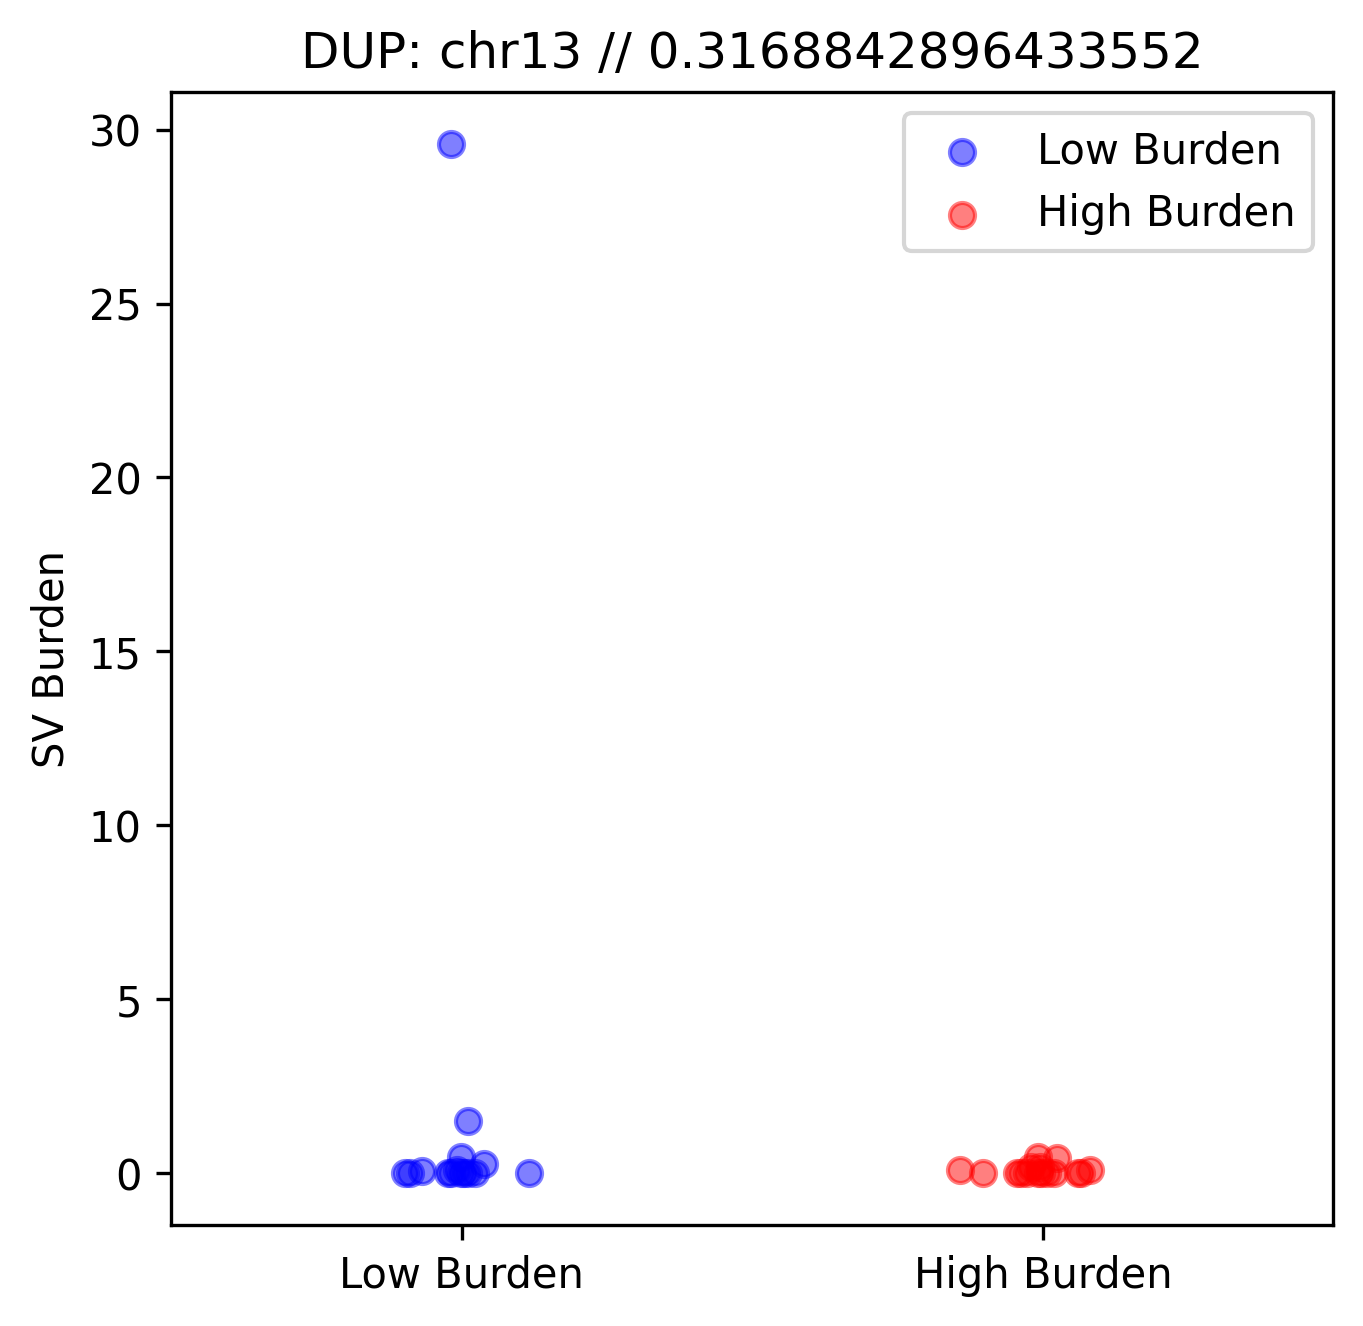

chr14
t-statistic: -1.1082612768759486
p-value: 0.28303065715351045


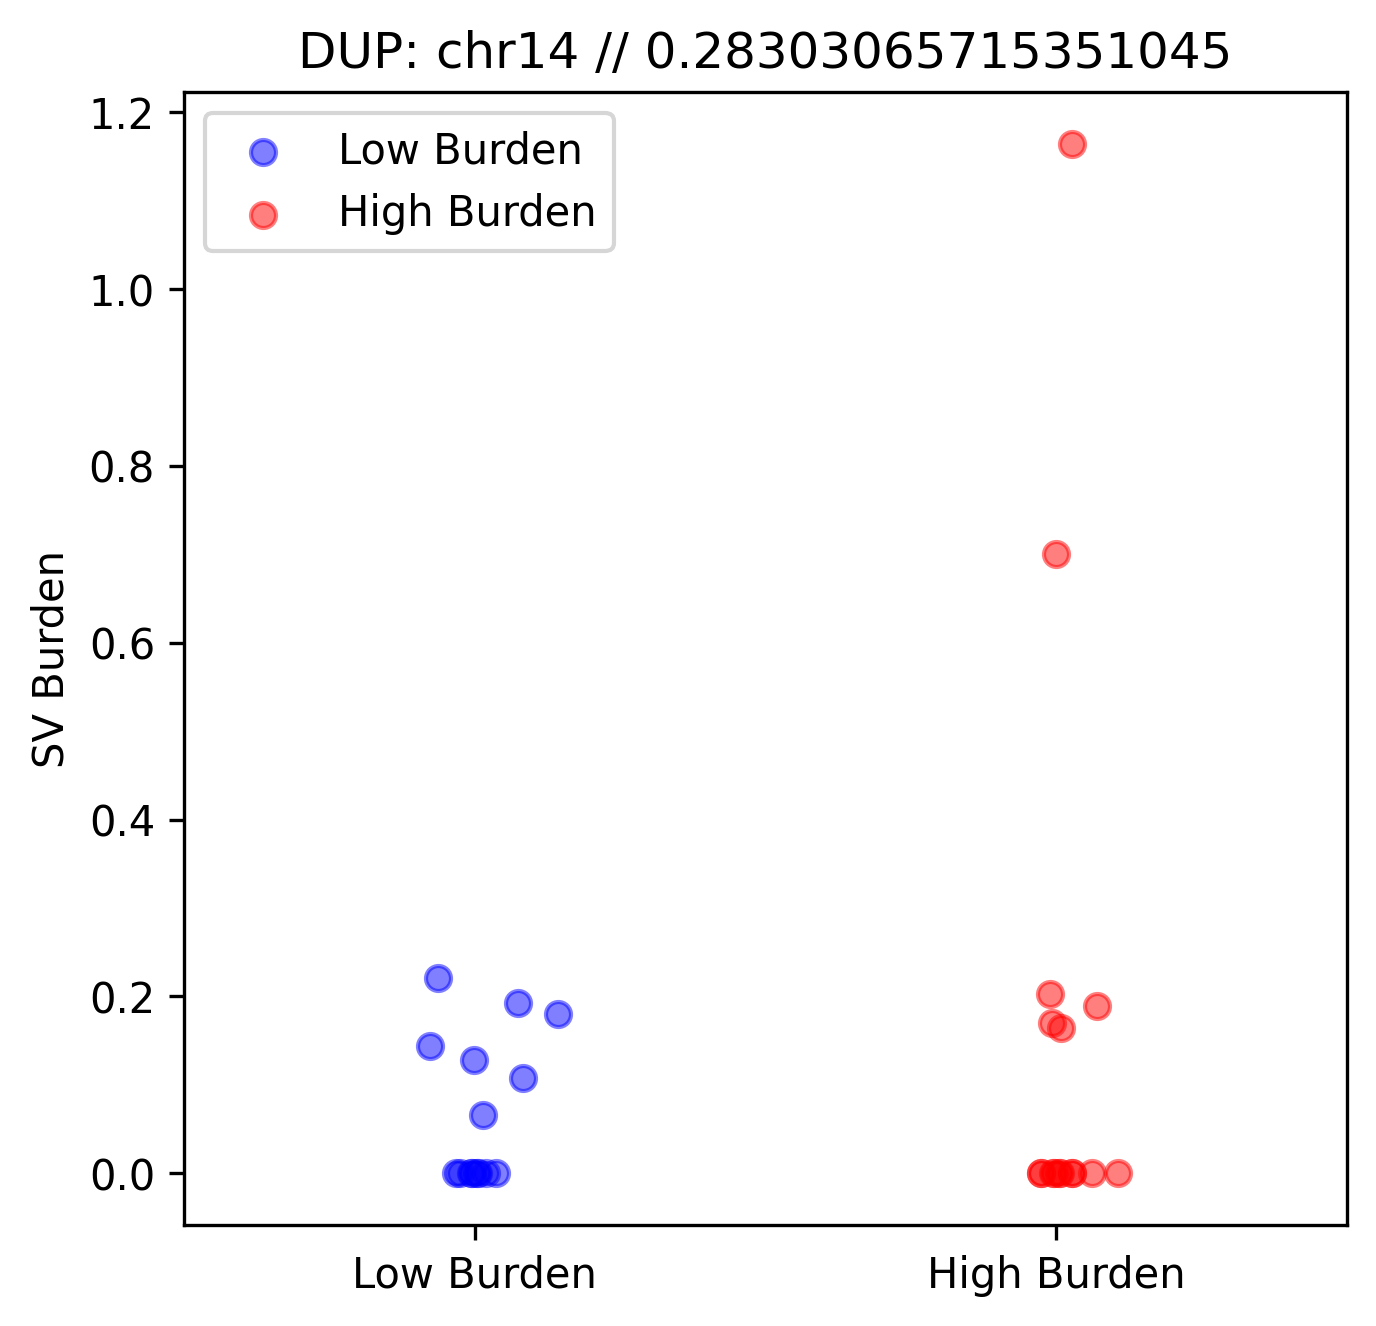

chr15
t-statistic: -1.0393919160334666
p-value: 0.31508230135958104


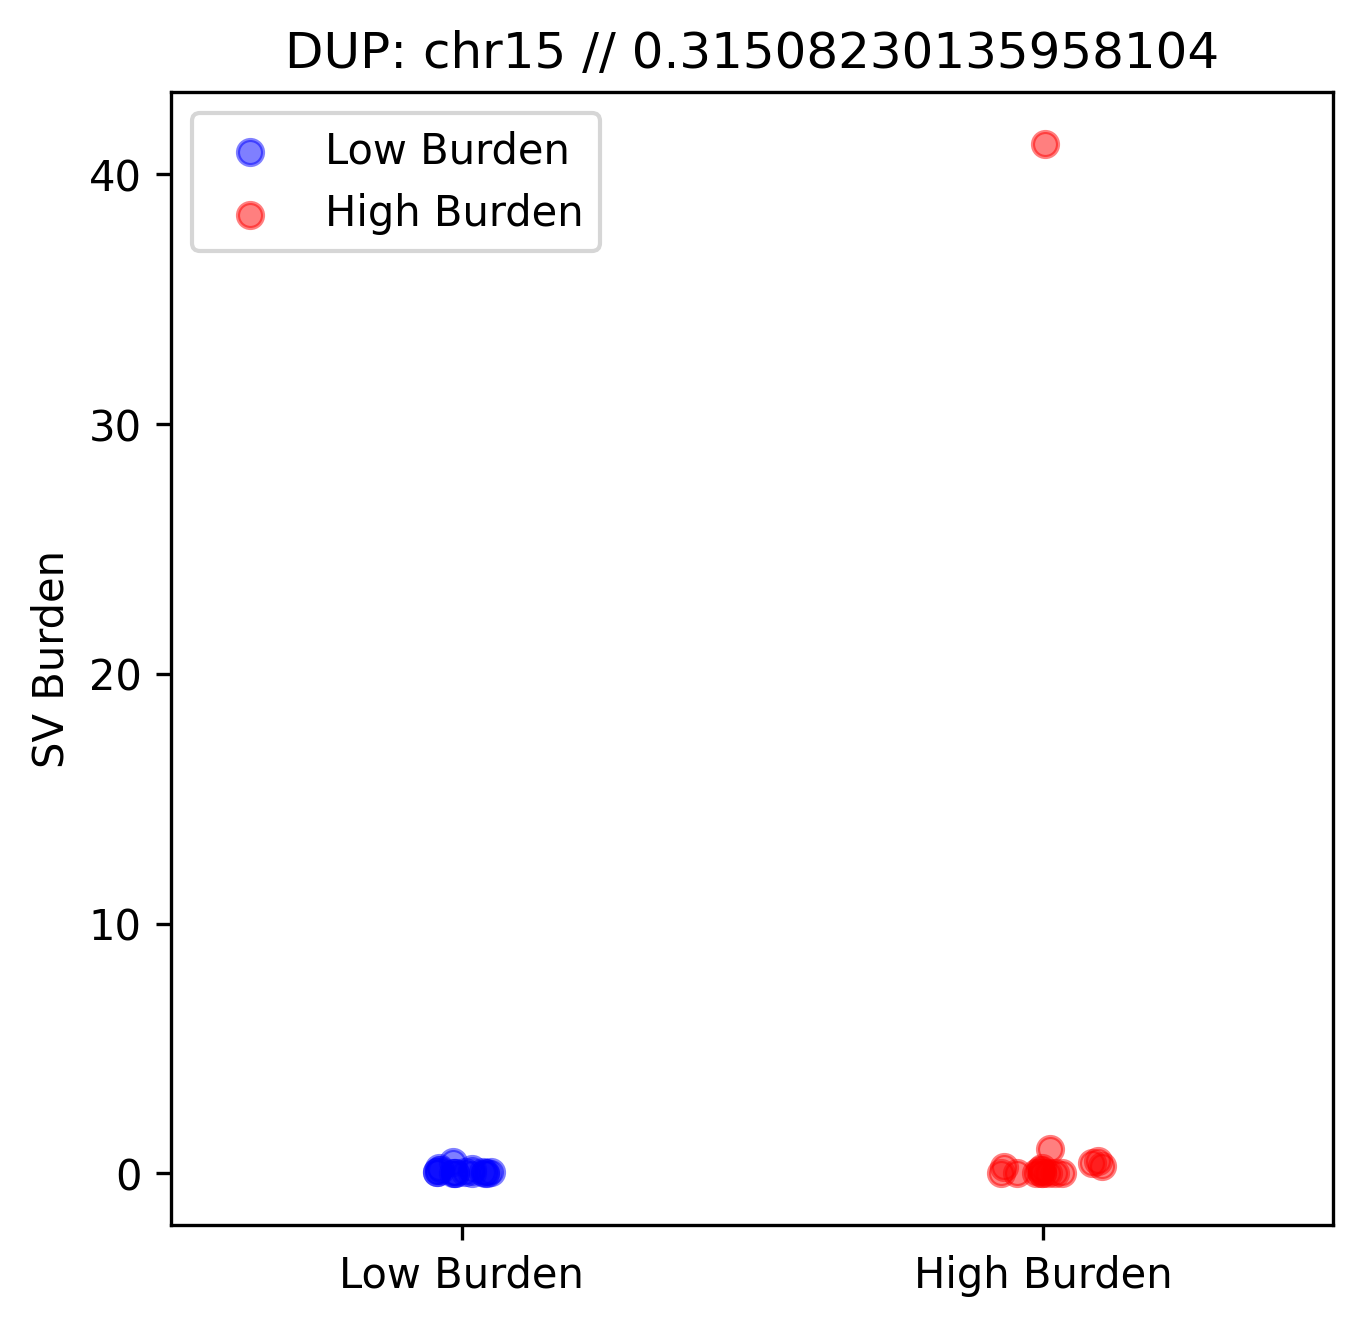

chr16
t-statistic: -1.0616573166643986
p-value: 0.3051331550905273


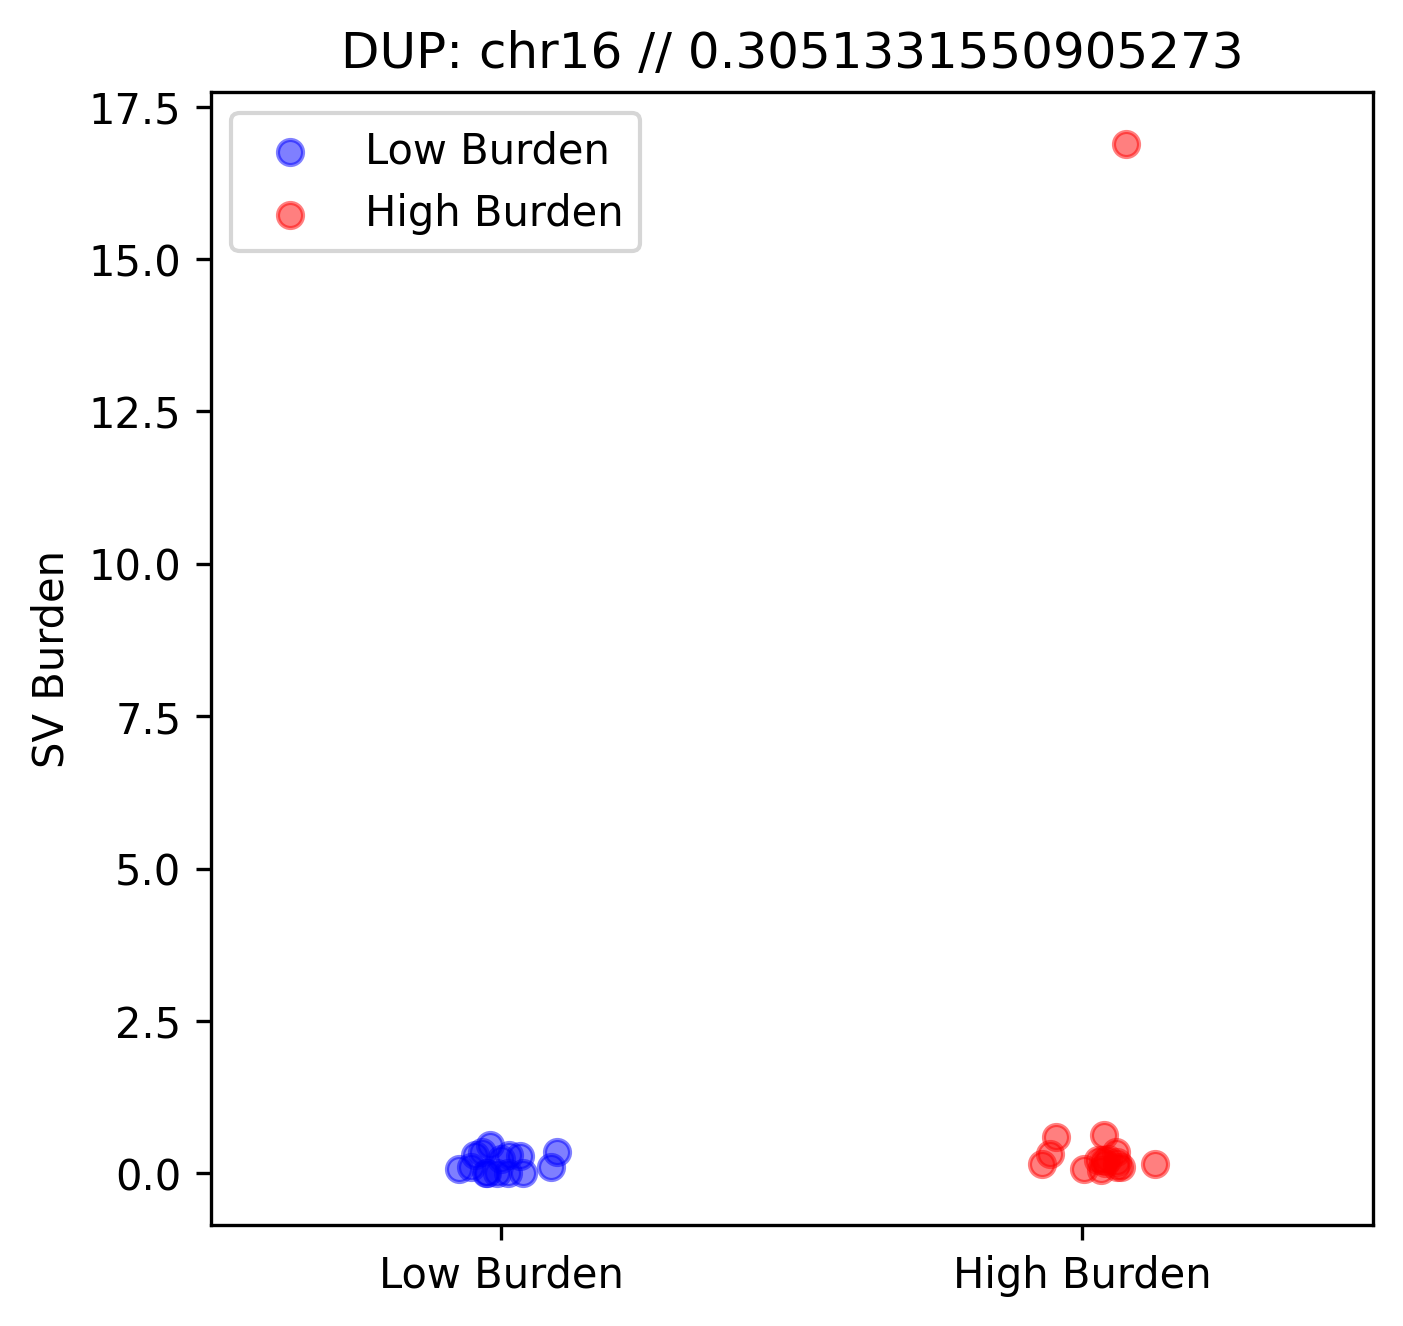

chr17
t-statistic: -2.6361959686198713
p-value: 0.01599551620926314


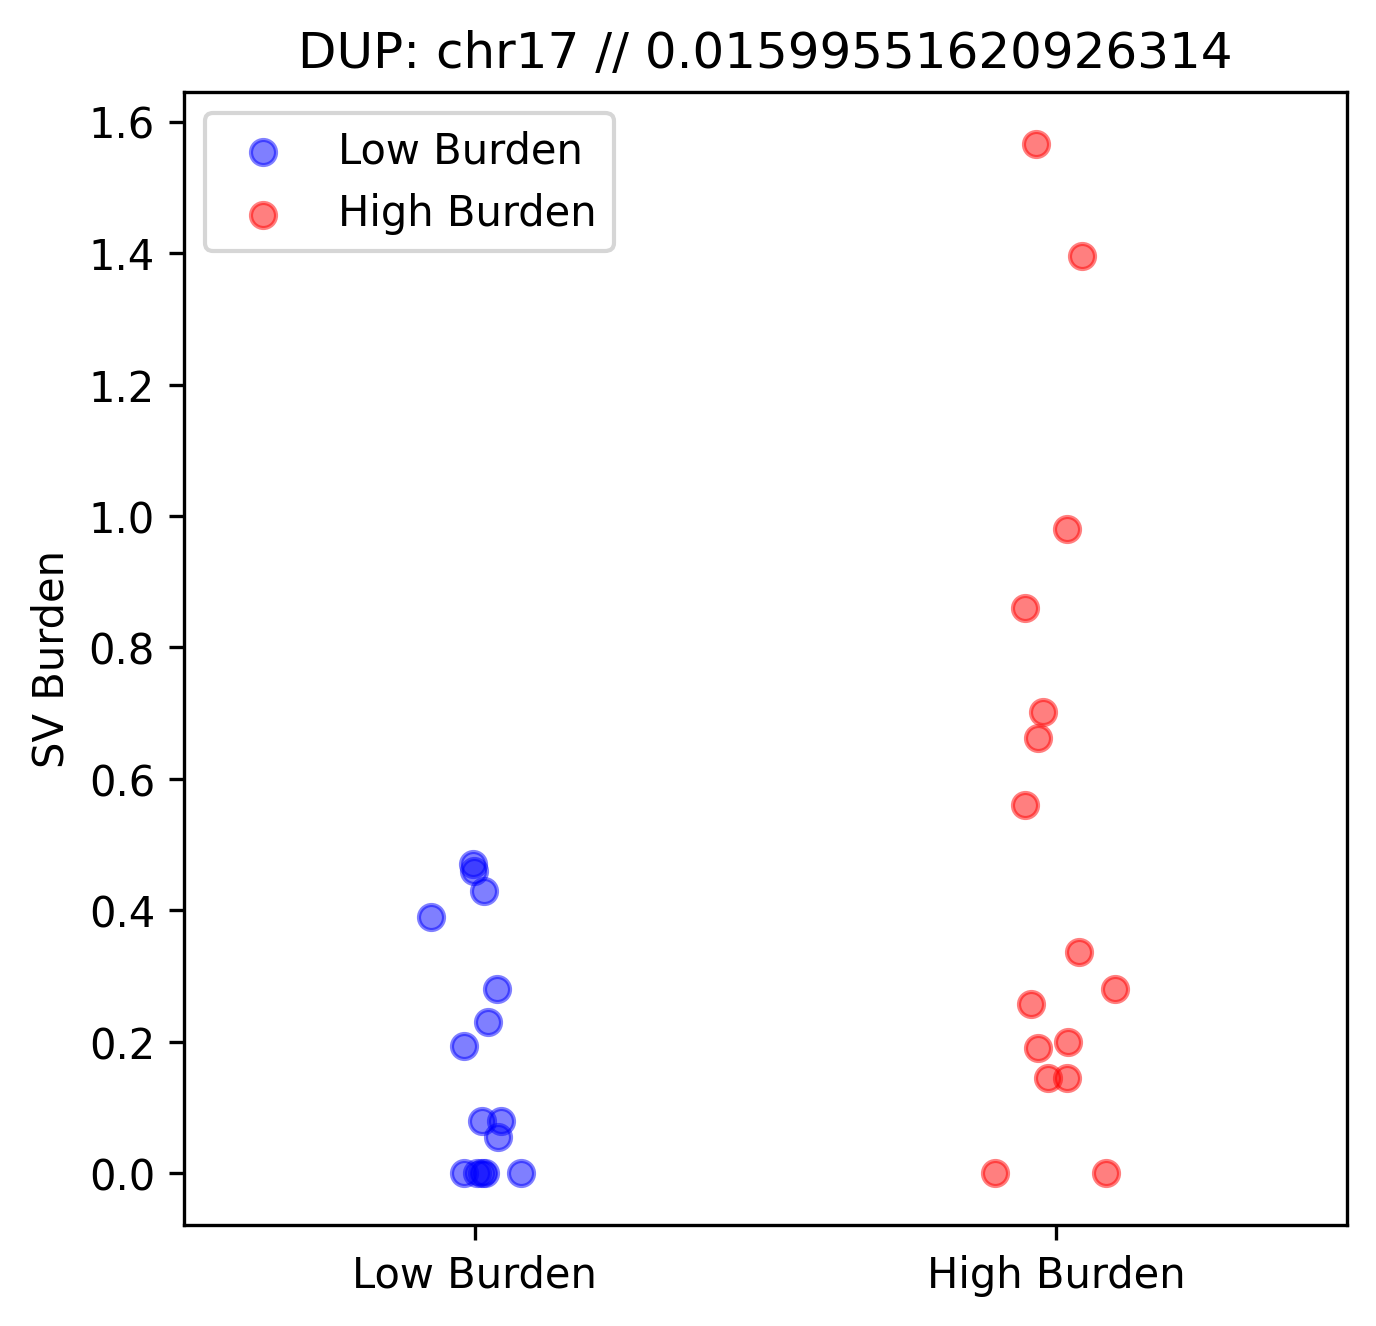

chr18
t-statistic: 1.7218164136539609
p-value: 0.10486404933346223


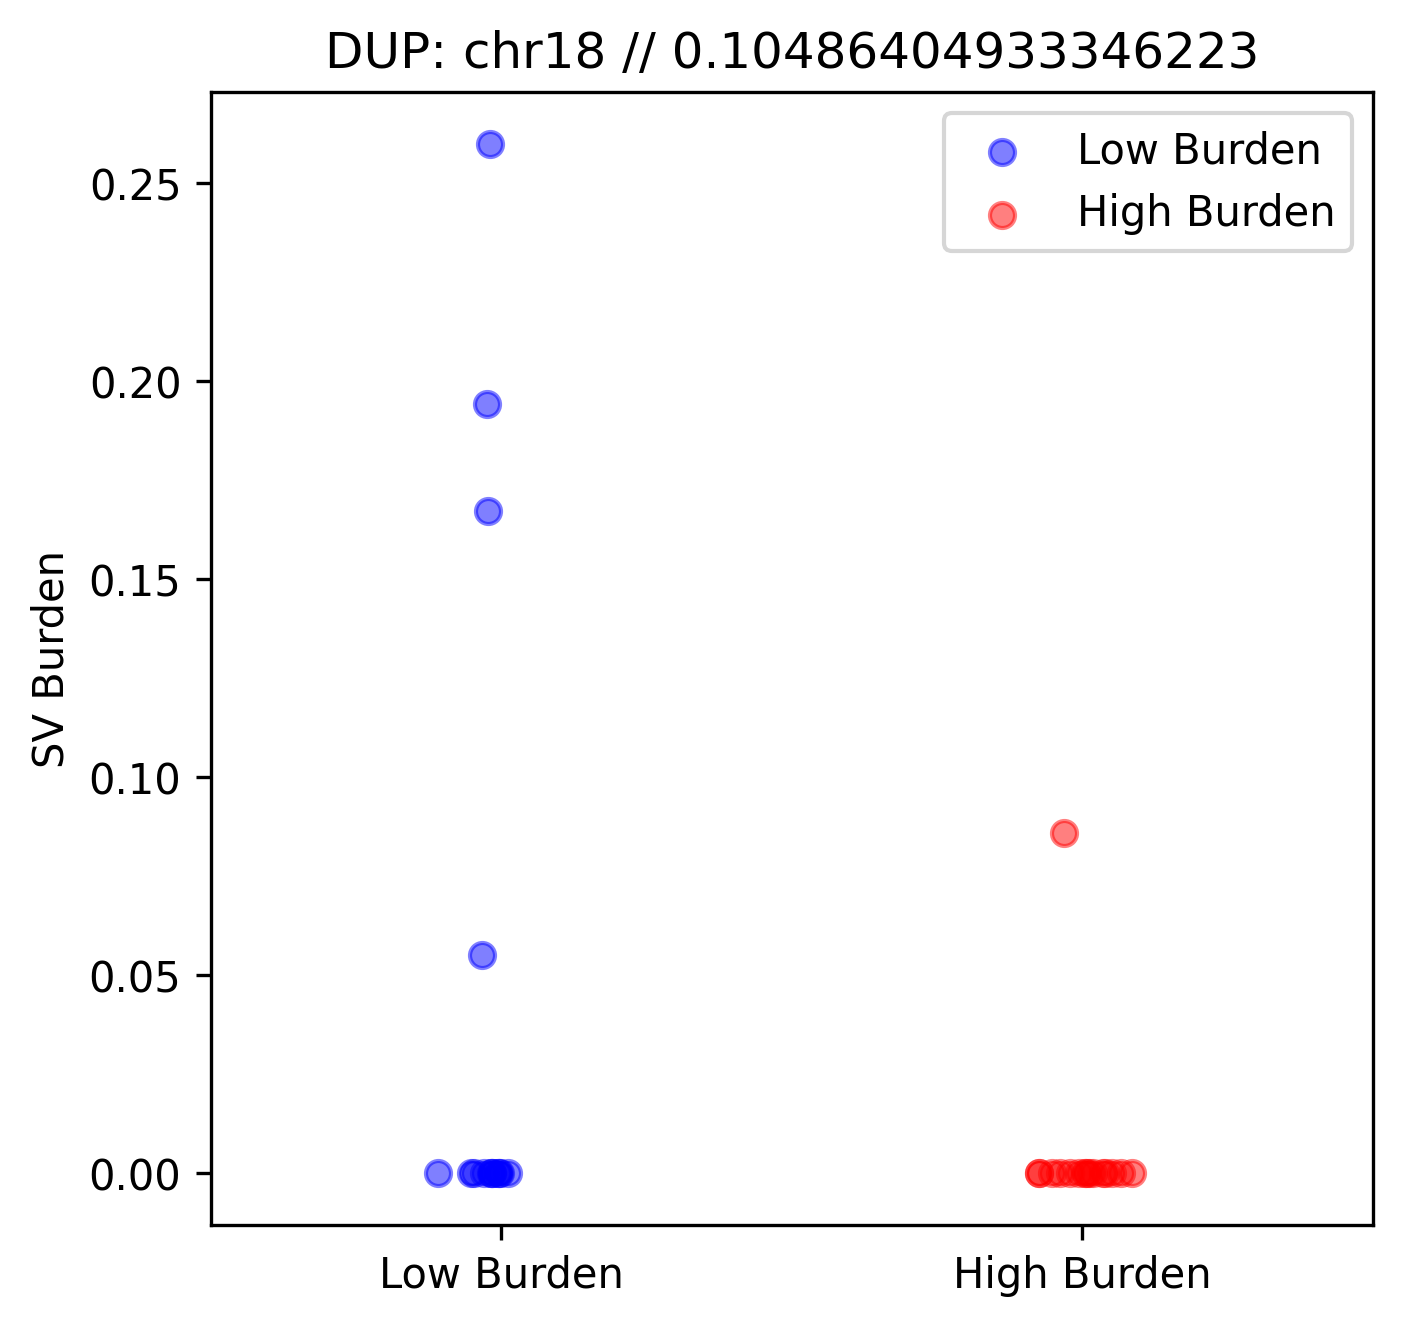

chr19
t-statistic: -0.6349841282710179
p-value: 0.5321828074279249


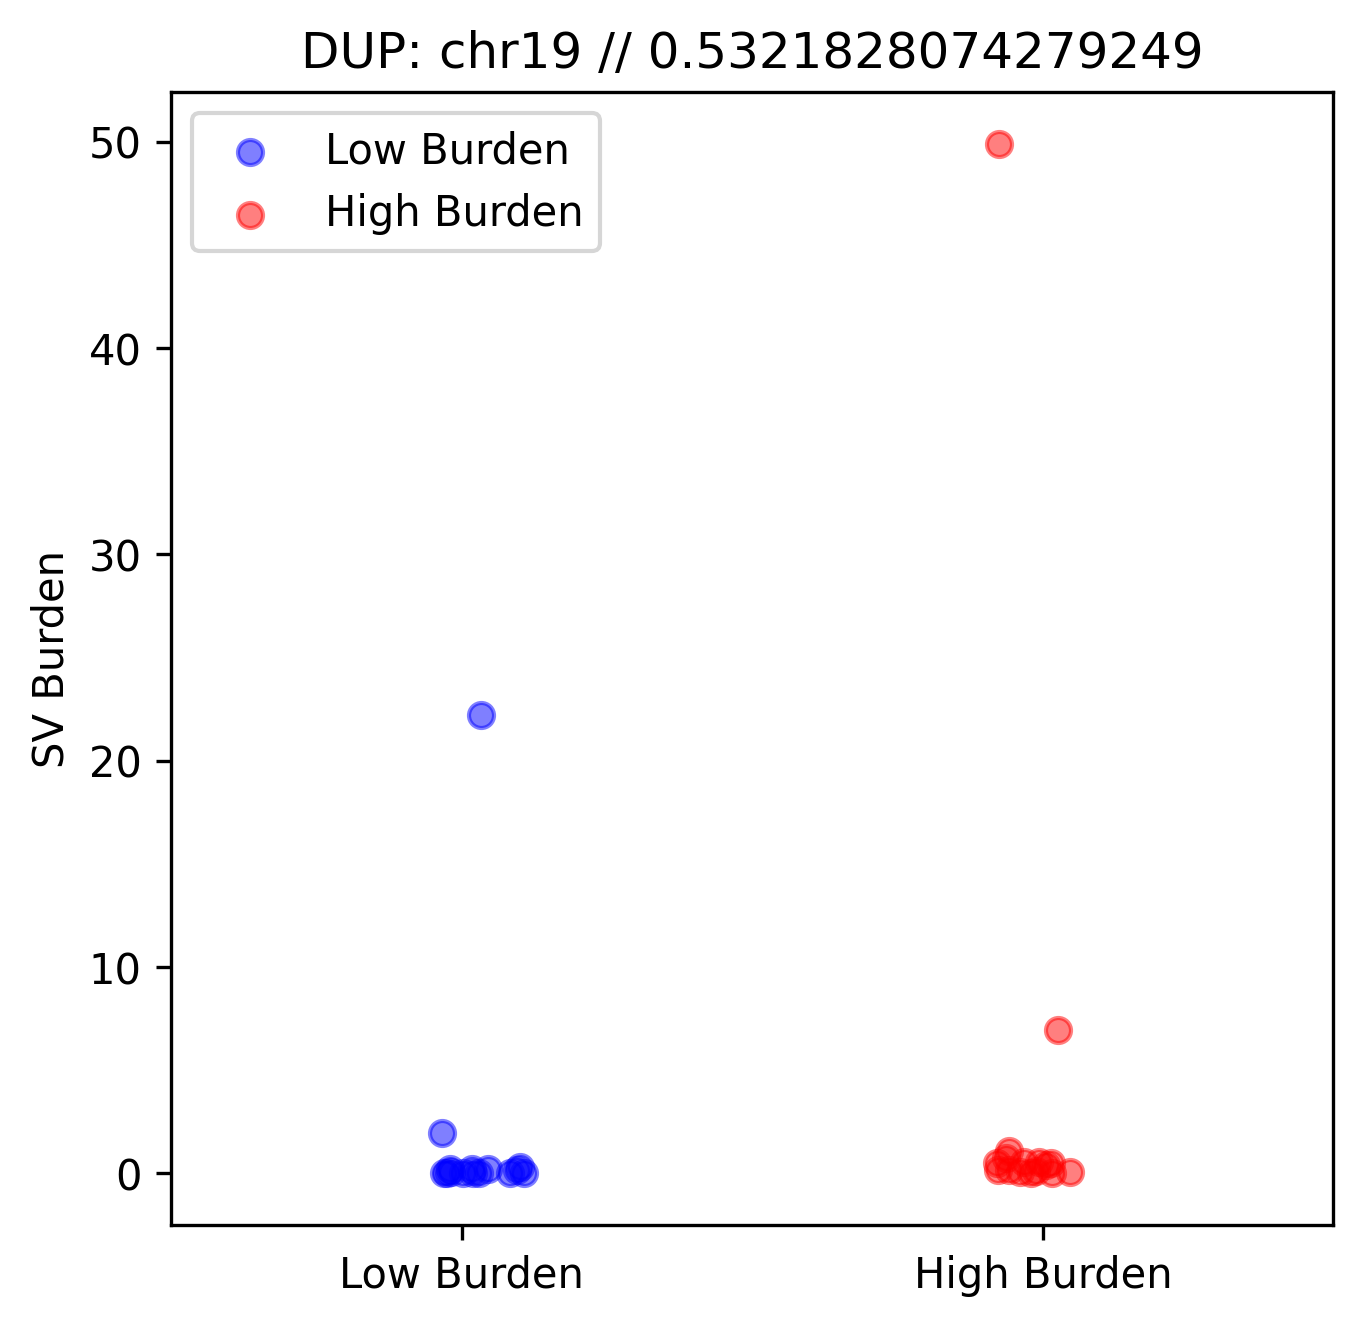

chr20
t-statistic: -1.207969627009007
p-value: 0.24399136832556836


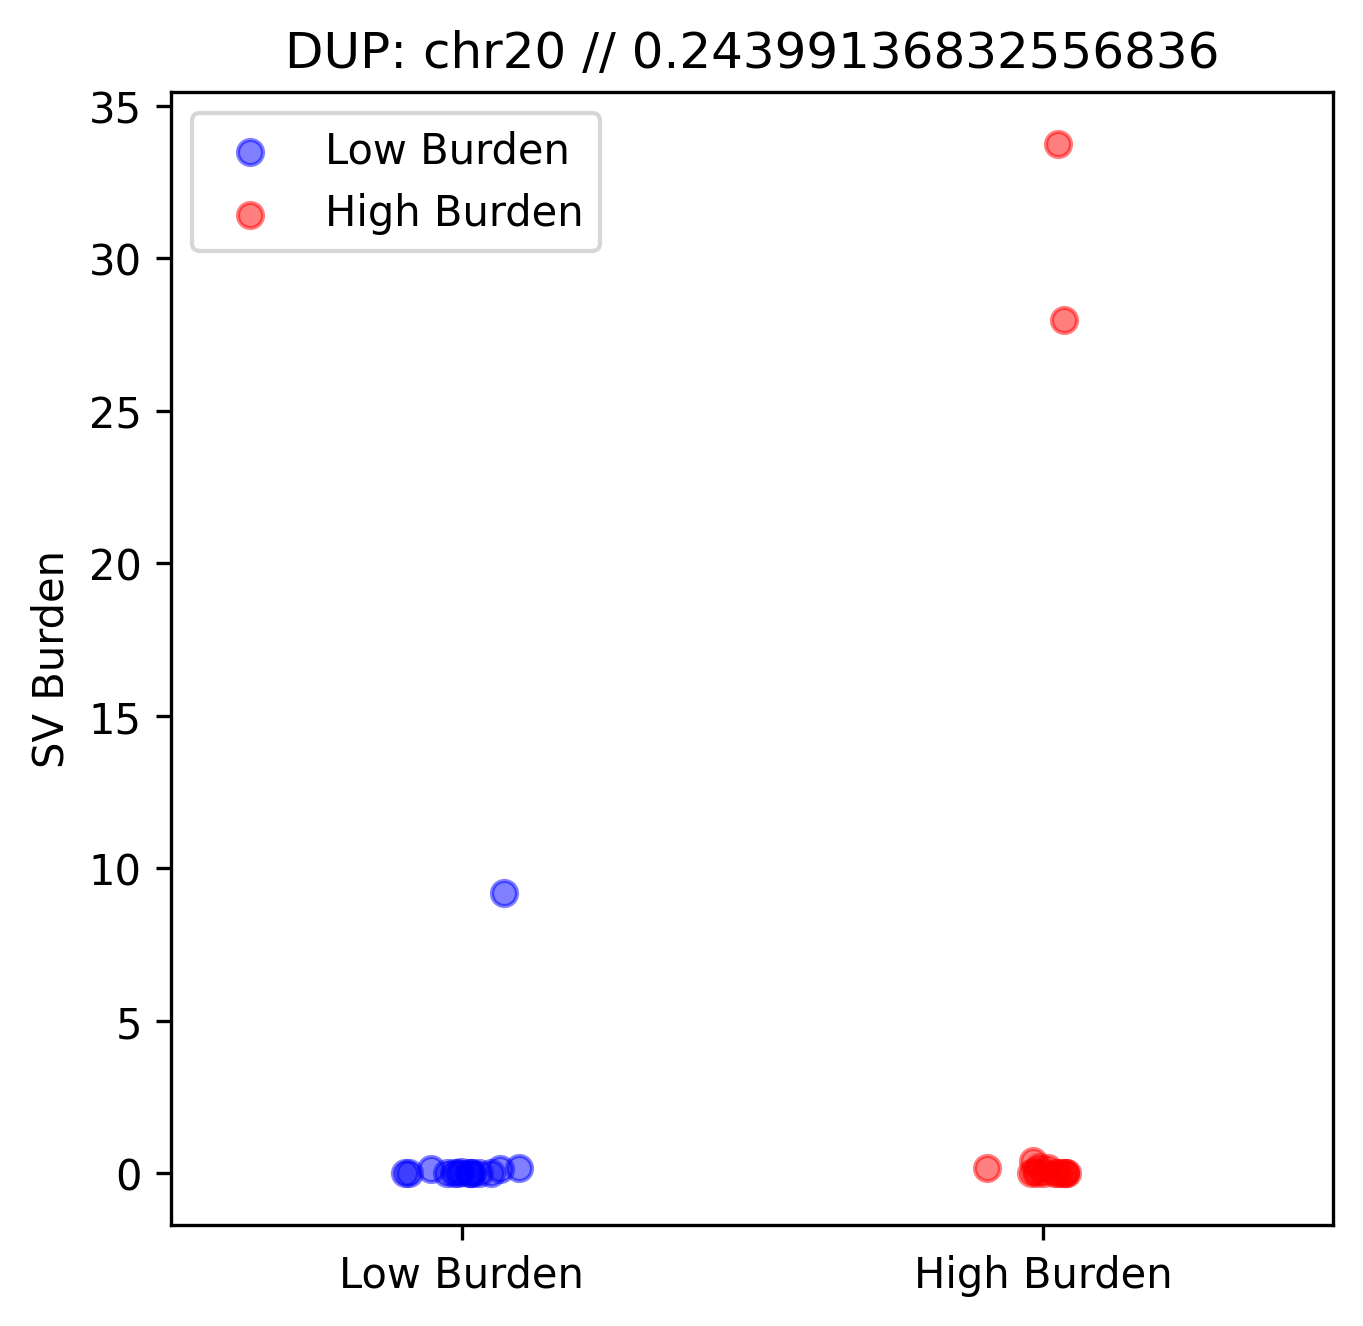

chr21
t-statistic: -1.029313603189517
p-value: 0.31963609916042457


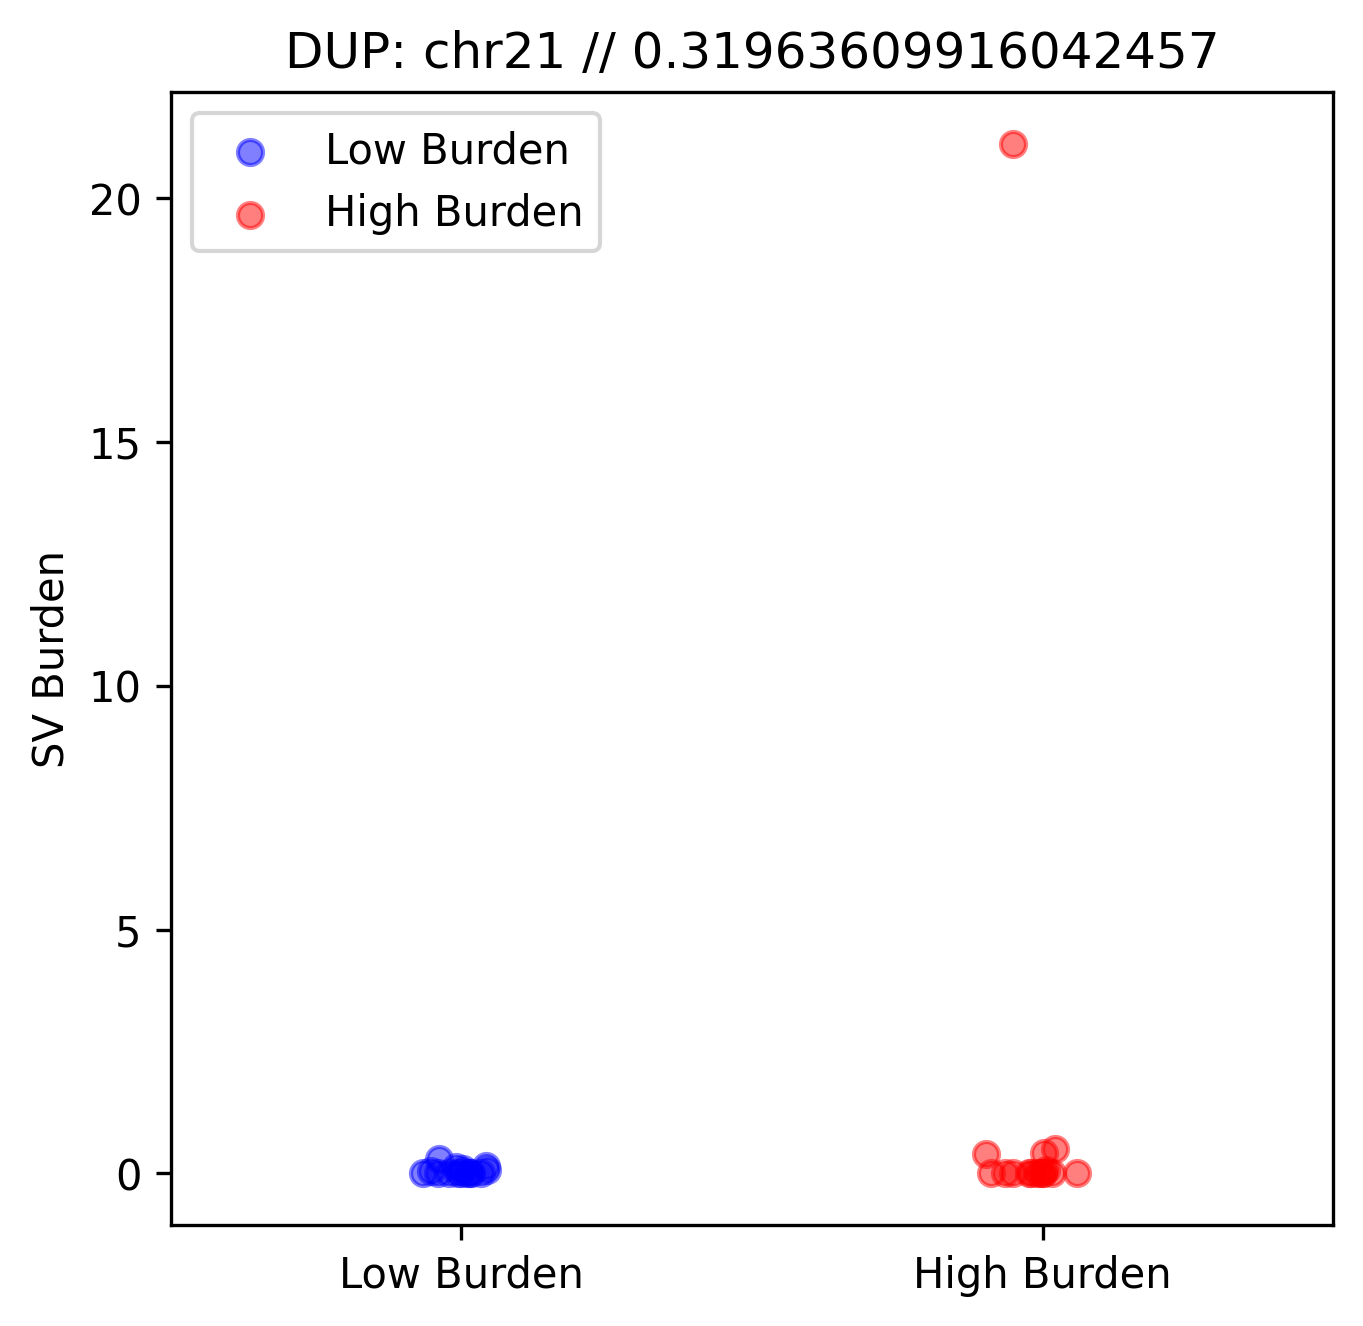

chr22
t-statistic: -1.6418176006208534
p-value: 0.1160493275066885


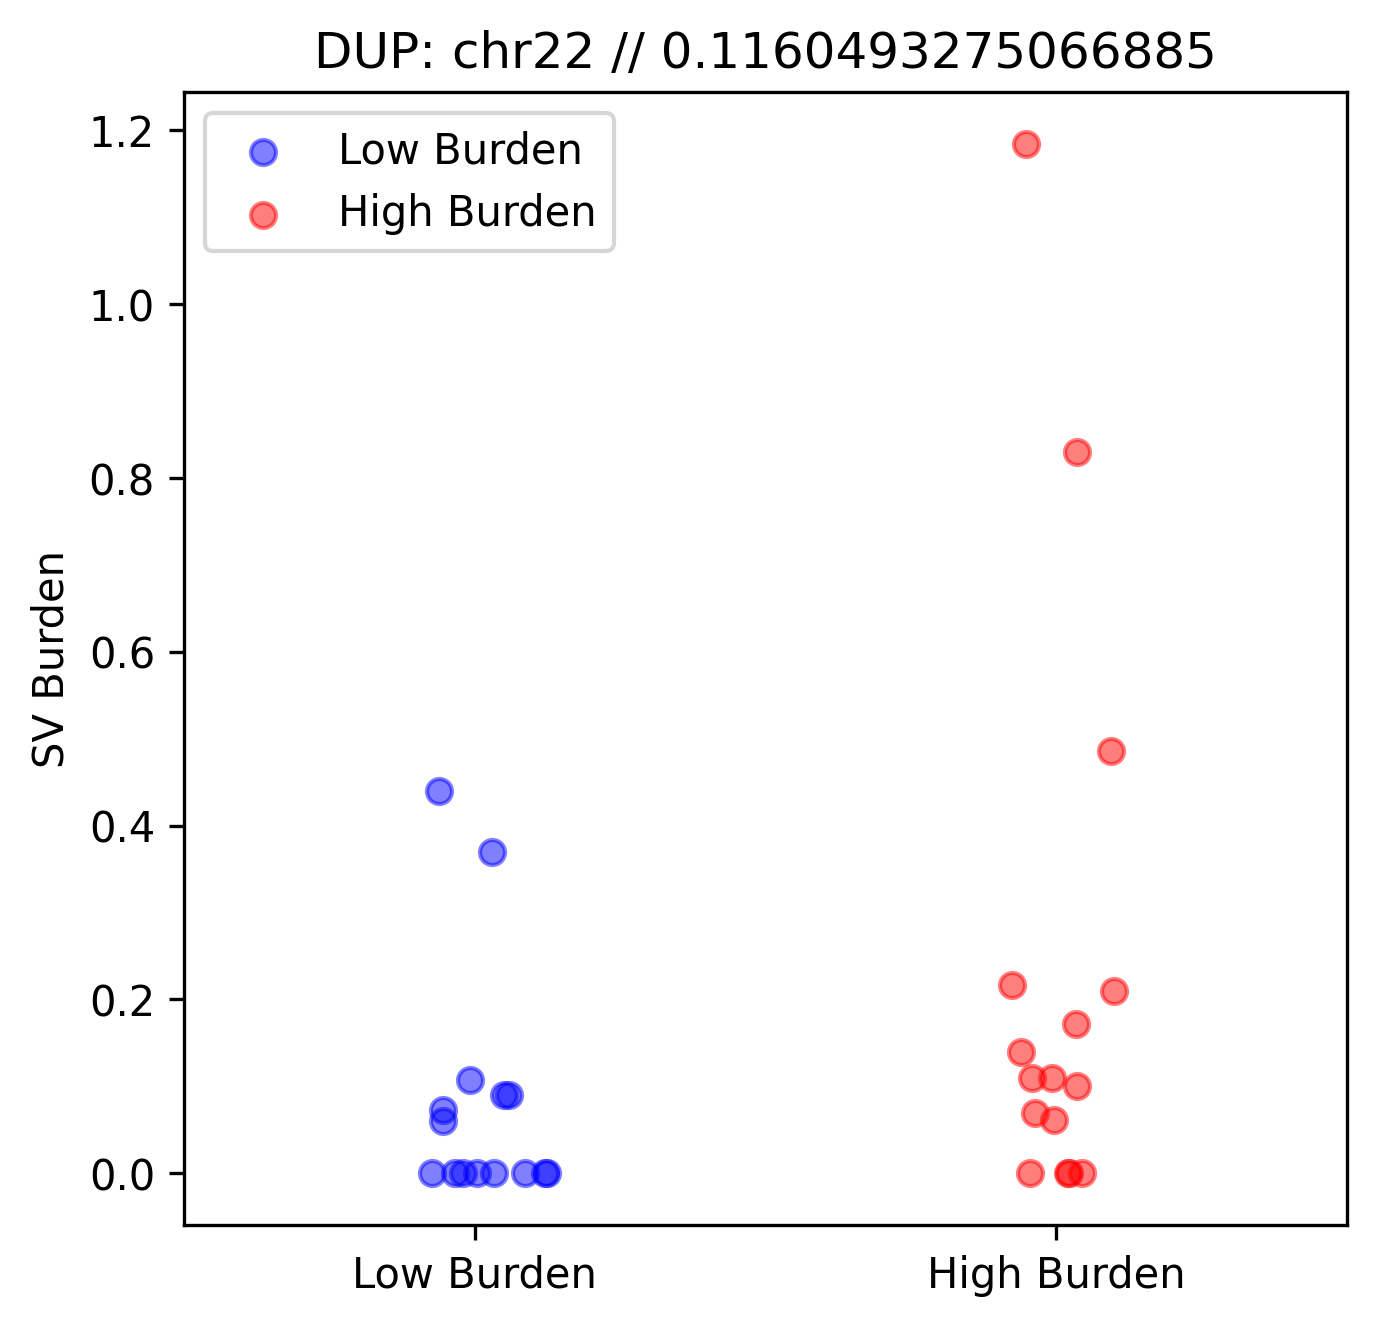

chrX
t-statistic: -0.8989550637659506
p-value: 0.3802177884828102


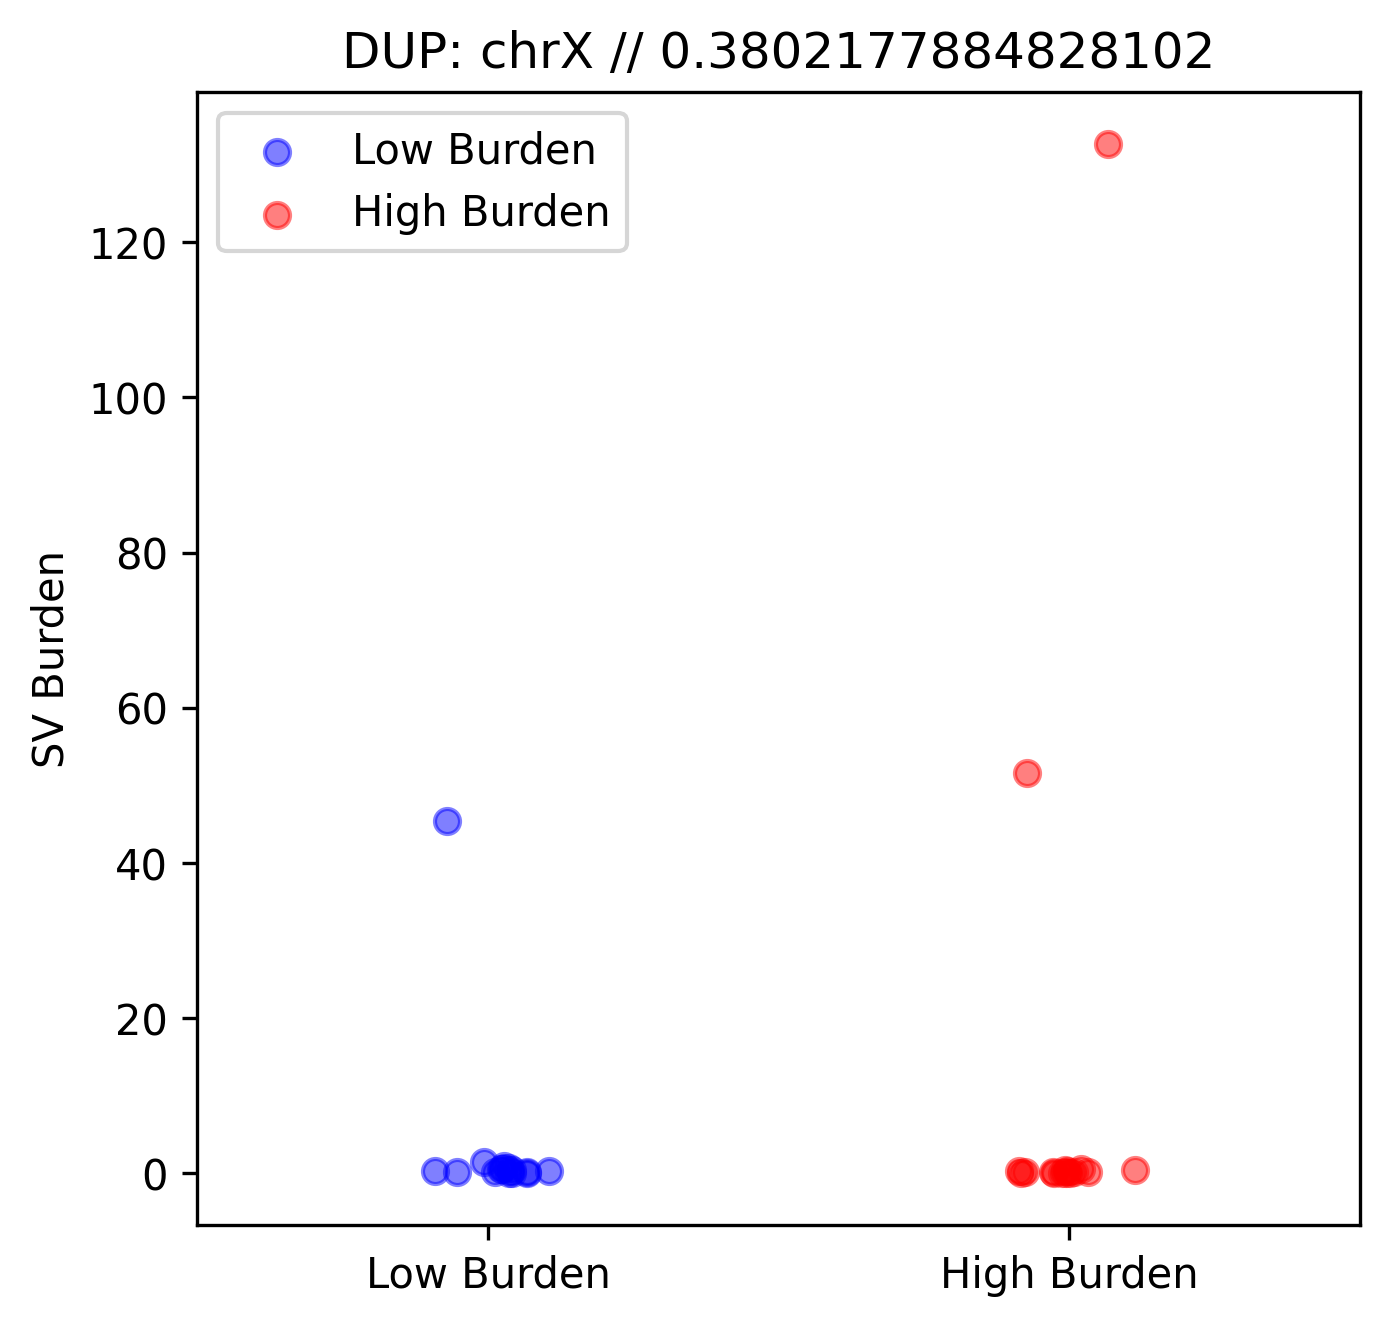

In [20]:
for chrom in chromosomes:
    
    print(chrom)
    temp_low_burden_by_chrom = []
    temp_high_burden_by_chrom = []
    
    ###
    for s_id in low_burden_sample_id:
        
        temp_low_burden_by_chrom.append(large_DUP_burden_per_chrom_dicts[s_id + '_DUP_burden_by_chrom'][chrom])
    
    ###
    for s_id in high_burden_sample_id:
        
        temp_high_burden_by_chrom.append(large_DUP_burden_per_chrom_dicts[s_id + '_DUP_burden_by_chrom'][chrom])
    
    # Perform T-test
    t_stat, p_value = stats.ttest_ind(temp_low_burden_by_chrom, temp_high_burden_by_chrom, equal_var=False)
    print("t-statistic:", t_stat)
    print("p-value:", p_value)
        
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

    # Define data for plotting
    data = [temp_low_burden_by_chrom, temp_high_burden_by_chrom]
    positions = [1.5, 2.5]  
    labels = ['Low Burden', 'High Burden']
    colors = ['blue', 'red']

    # Add scatter plot with jitter for individual data points
    for pos, single_data, color, label in zip(positions, data, colors, labels):
        jitter = np.random.normal(pos, 0.05, size=len(single_data))
        ax.scatter(jitter, single_data, alpha=0.5, color=color, label=label)

    # Styling and labels
    ax.set_title('DUP: ' + chrom + ' // ' + str(p_value))
    ax.set_ylabel('SV Burden')
    ax.set_xticks(positions)
    ax.set_xticklabels(labels)
    ax.legend()

    # Adjust x-axis limits
    ax.set_xlim(1, 3)

    plt.show()


In [21]:
temp_high_burden_by_chrom

[0.159108,
 0.0,
 0.0,
 0.154094,
 0.446932,
 0.0,
 0.0,
 0.504884,
 0.37659,
 0.173266,
 0.348434,
 0.309484,
 0.101713,
 0.155059,
 51.557981,
 132.663838]

t-statistic: -2.386861258388893
p-value: 0.03016593173783669


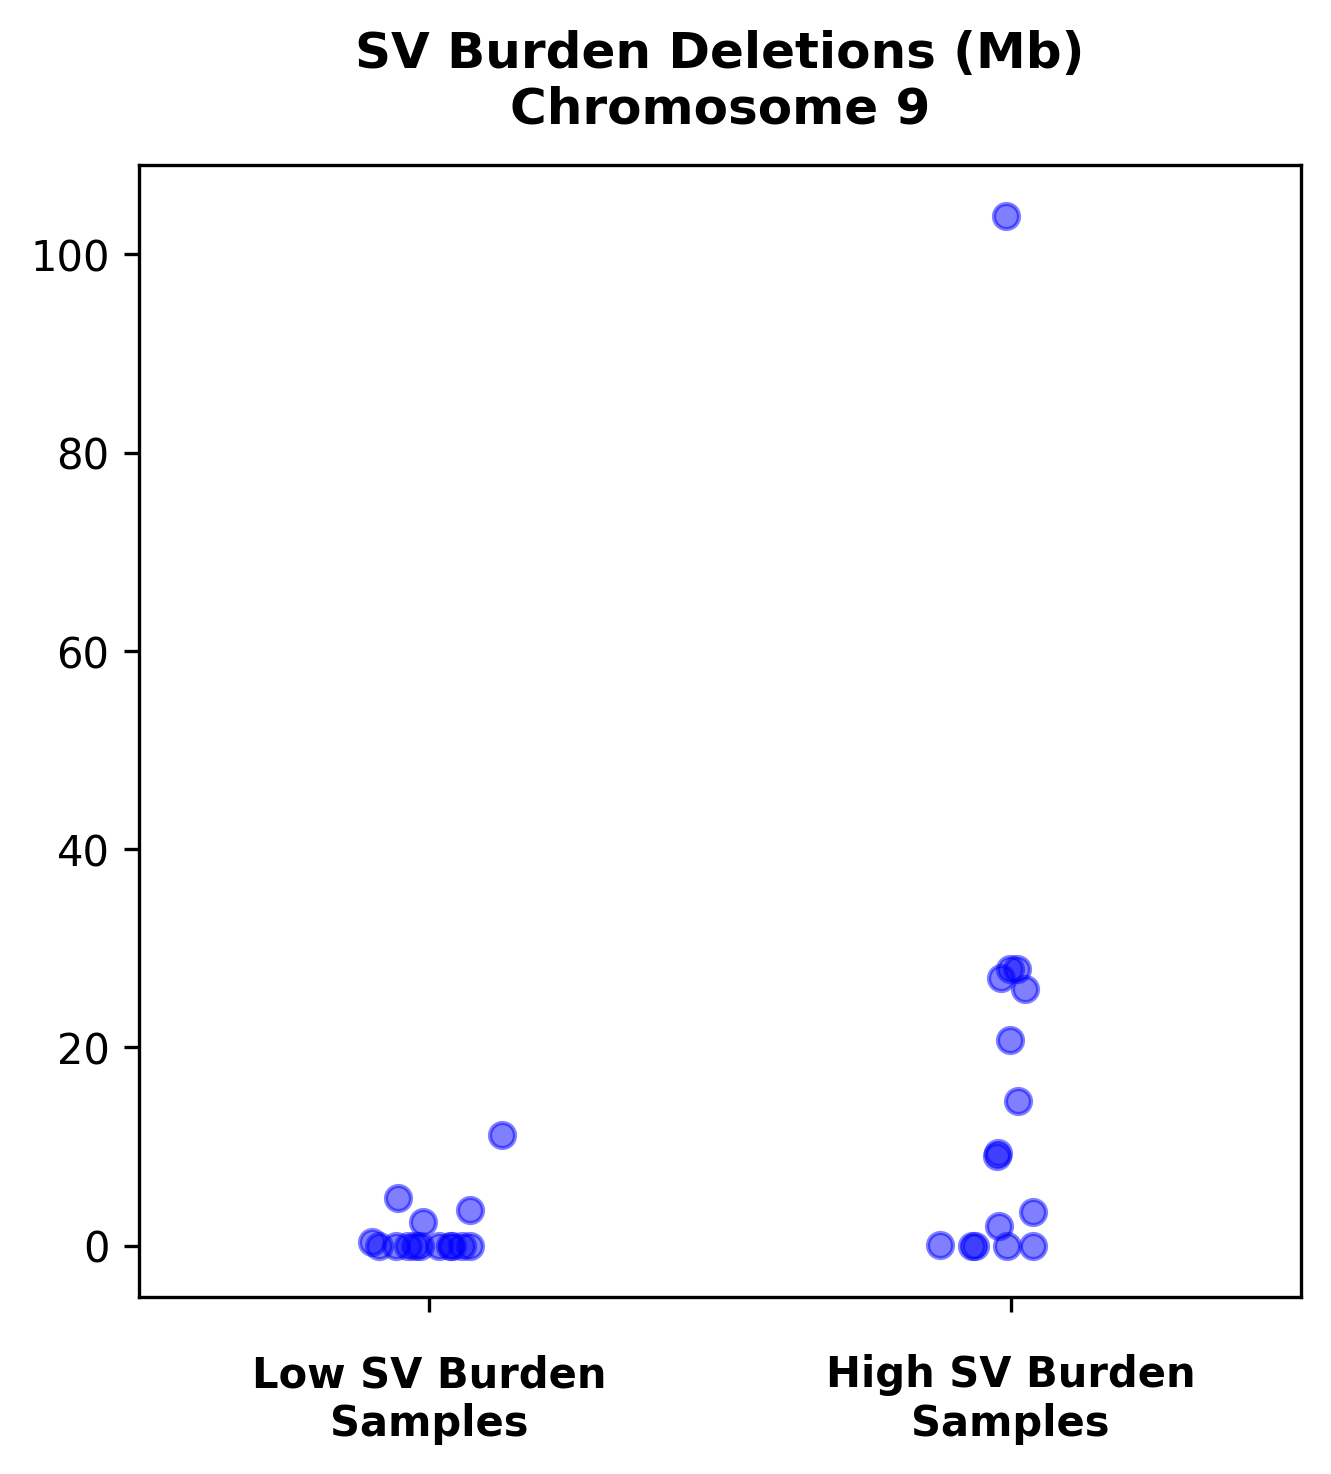

In [22]:
chrom = 'chr9'

temp_low_burden_by_chrom = []
temp_high_burden_by_chrom = []

###
for s_id in low_burden_sample_id:

    temp_low_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])

###
for s_id in high_burden_sample_id:

    temp_high_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])

# Perform T-test
t_stat, p_value = stats.ttest_ind(temp_low_burden_by_chrom, temp_high_burden_by_chrom, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
mpl.rcParams['font.family'] = 'sans-serif'

# Define data for plotting
data = [temp_low_burden_by_chrom, temp_high_burden_by_chrom]
positions = [1.5, 2.5]  
labels = ['Low SV Burden\nSamples', 'High SV Burden\nSamples']
colors = ['blue', 'blue']

# Add scatter plot with jitter for individual data points
for pos, single_data, color, label in zip(positions, data, colors, labels):
    jitter = np.random.normal(pos, 0.05, size=len(single_data))
    ax.scatter(jitter, single_data, alpha=0.5, color=color, label=label)

# Styling and labels
ax.set_title('SV Burden Deletions (Mb)\nChromosome 9', weight='bold', pad=10) 
ax.set_xticks(positions)
ax.set_xticklabels(labels, weight='bold')

# Adjust axis limits
ax.set_xlim(1, 3)
ax.tick_params(axis='x', pad=10)

plt.show()
fig.savefig('/Users/ryanyutian/Desktop/Manuscript/driver_heatmap/burden_comparison/del_chr9.png', dpi=300, bbox_inches='tight')

t-statistic: -2.9231849797448444
p-value: 0.01048820151065278


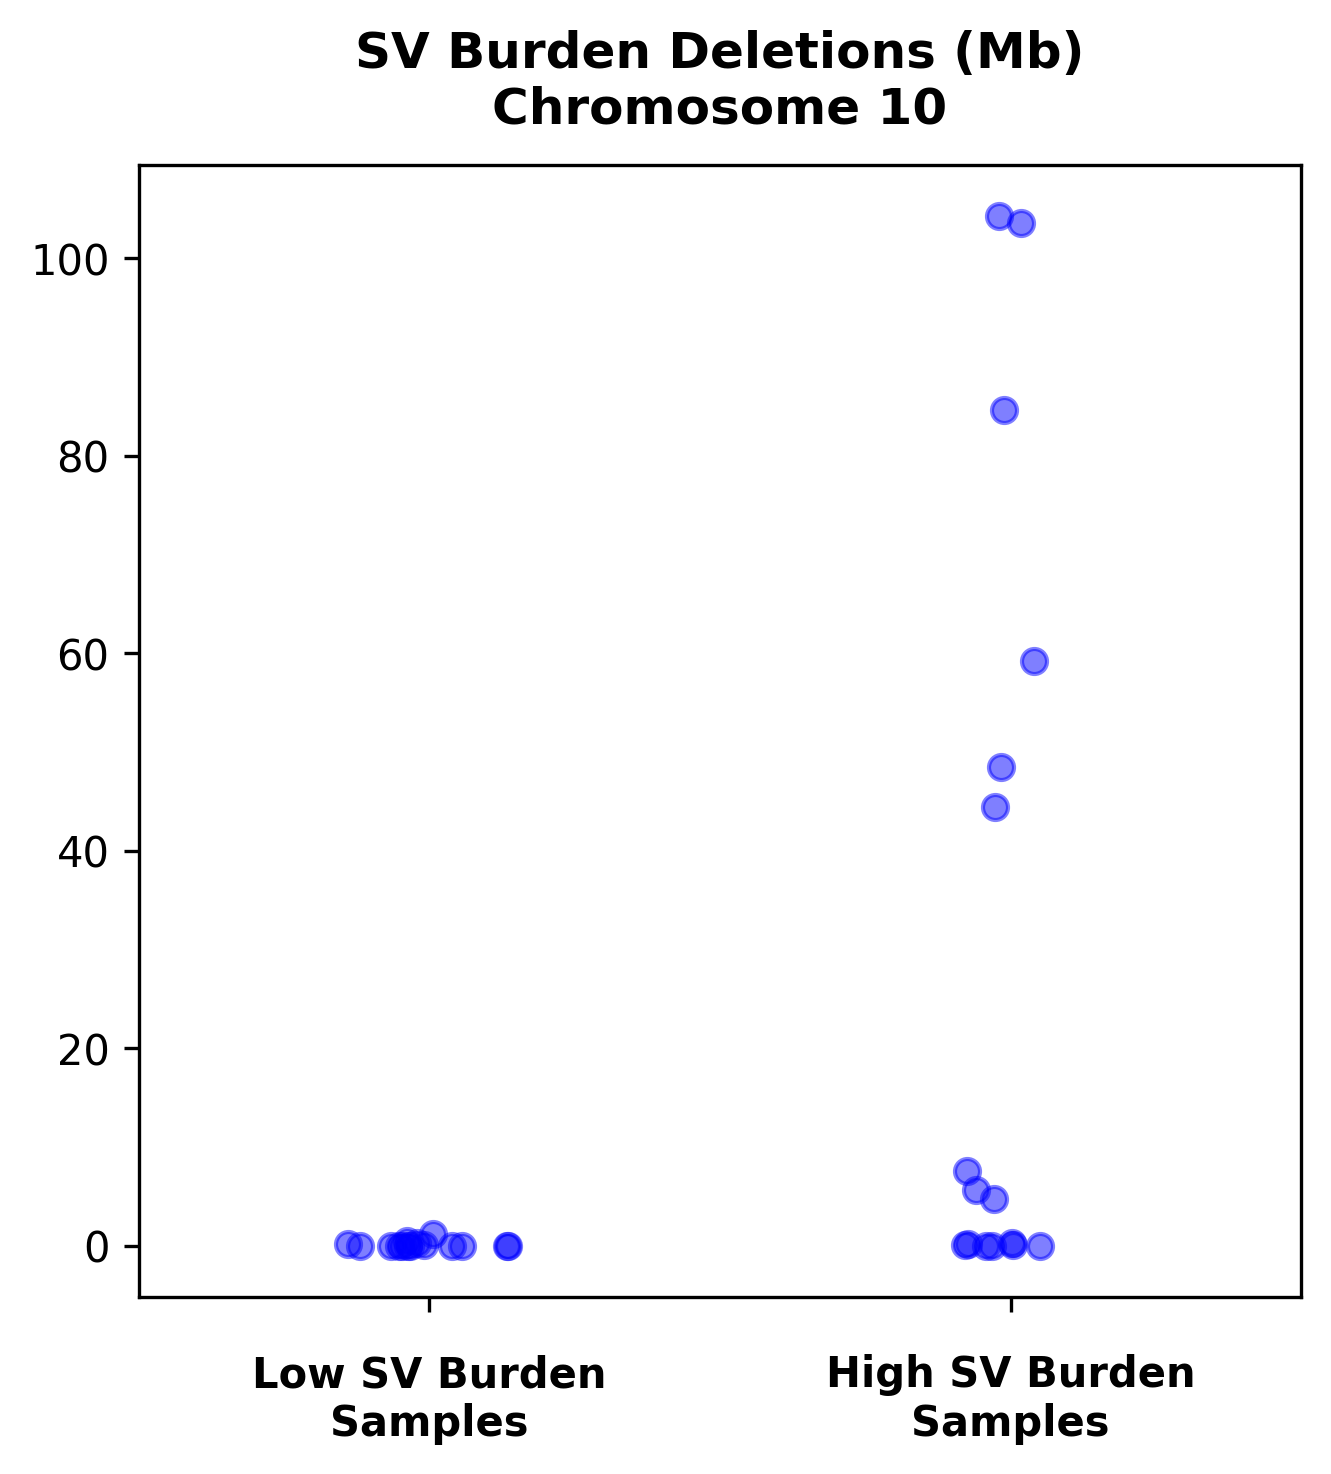

In [23]:
chrom = 'chr10'

temp_low_burden_by_chrom = []
temp_high_burden_by_chrom = []

###
for s_id in low_burden_sample_id:

    temp_low_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])

###
for s_id in high_burden_sample_id:

    temp_high_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])

# Perform T-test
t_stat, p_value = stats.ttest_ind(temp_low_burden_by_chrom, temp_high_burden_by_chrom, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
mpl.rcParams['font.family'] = 'sans-serif'

# Define data for plotting
data = [temp_low_burden_by_chrom, temp_high_burden_by_chrom]
positions = [1.5, 2.5]  
labels = ['Low SV Burden\nSamples', 'High SV Burden\nSamples']
colors = ['blue', 'blue']

# Add scatter plot with jitter for individual data points
for pos, single_data, color, label in zip(positions, data, colors, labels):
    jitter = np.random.normal(pos, 0.05, size=len(single_data))
    ax.scatter(jitter, single_data, alpha=0.5, color=color, label=label)

# Styling and labels
ax.set_title('SV Burden Deletions (Mb)\nChromosome 10', weight='bold', pad=10) 
ax.set_xticks(positions)
ax.set_xticklabels(labels, weight='bold')

# Adjust axis limits
ax.set_xlim(1, 3)
ax.tick_params(axis='x', pad=10)

plt.show()
fig.savefig('/Users/ryanyutian/Desktop/Manuscript/driver_heatmap/burden_comparison/del_chr10.png', dpi=300, bbox_inches='tight')

t-statistic: -3.233539689944248
p-value: 0.00556354522218542


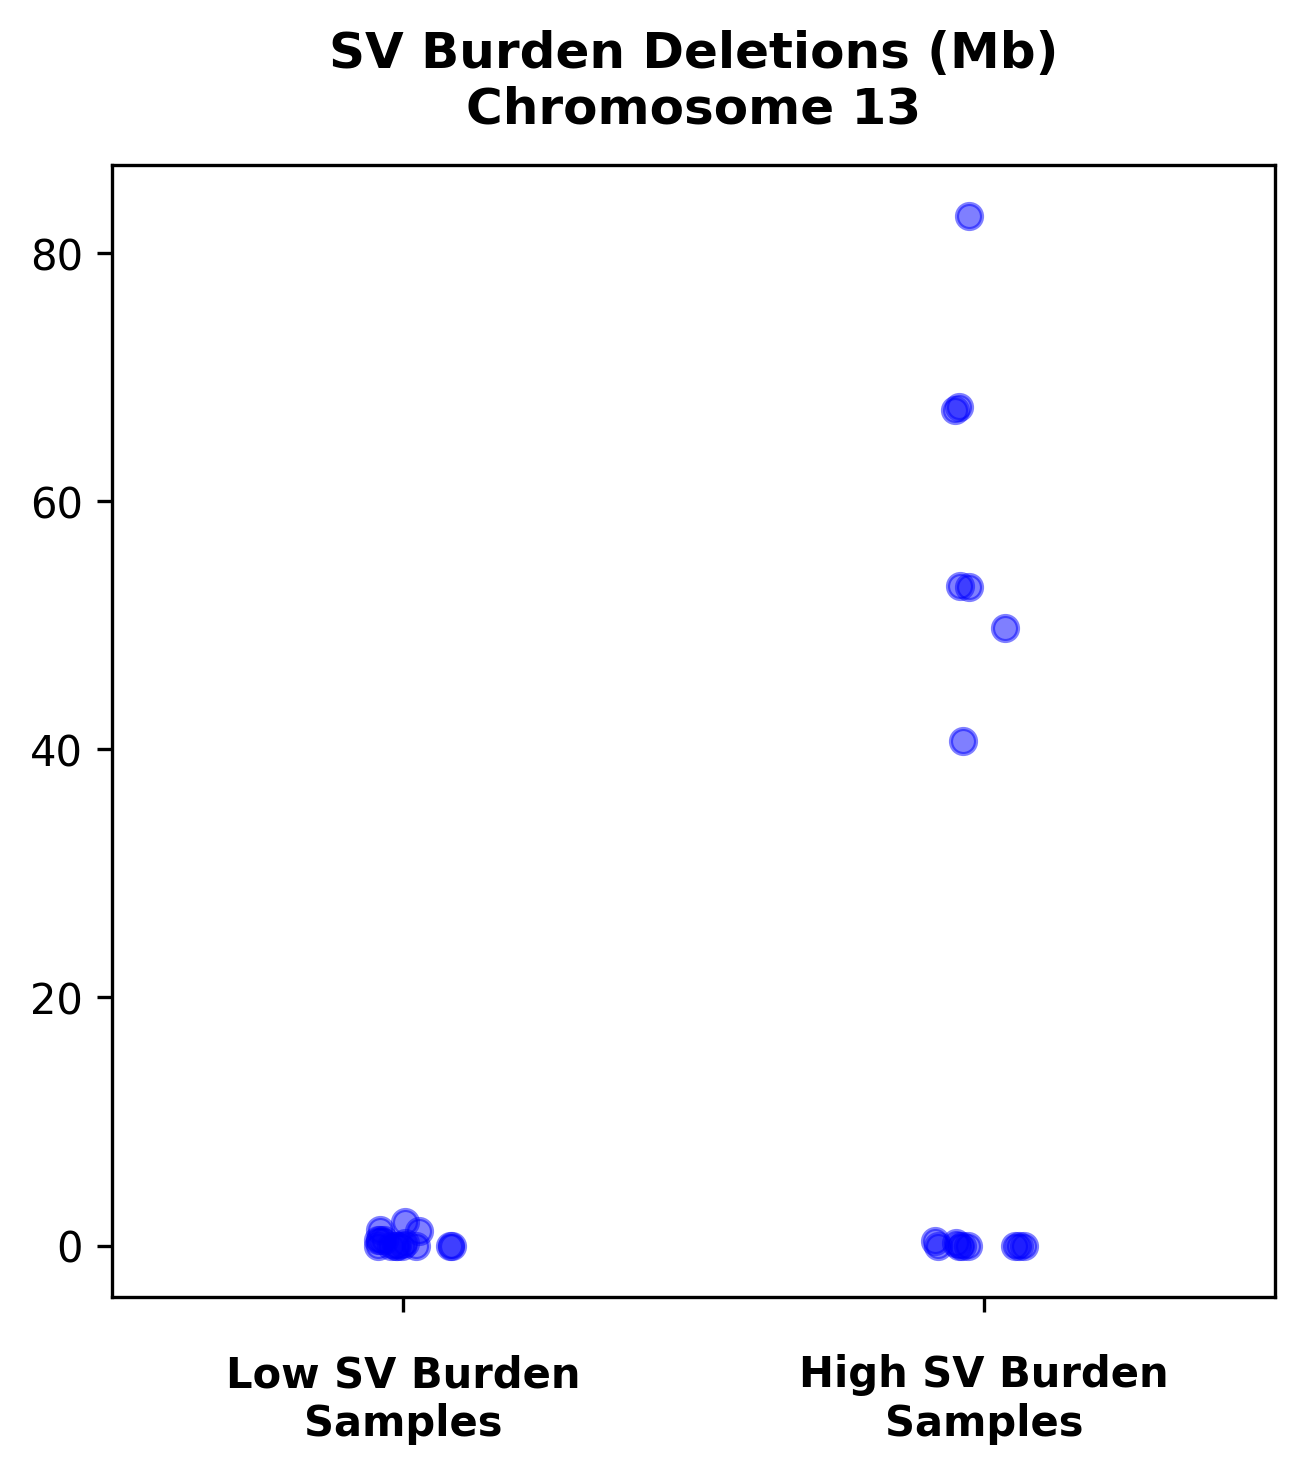

In [24]:
chrom = 'chr13'

temp_low_burden_by_chrom = []
temp_high_burden_by_chrom = []

###
for s_id in low_burden_sample_id:

    temp_low_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])

###
for s_id in high_burden_sample_id:

    temp_high_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])

# Perform T-test
t_stat, p_value = stats.ttest_ind(temp_low_burden_by_chrom, temp_high_burden_by_chrom, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
mpl.rcParams['font.family'] = 'sans-serif'

# Define data for plotting
data = [temp_low_burden_by_chrom, temp_high_burden_by_chrom]
positions = [1.5, 2.5]  
labels = ['Low SV Burden\nSamples', 'High SV Burden\nSamples']
colors = ['blue', 'blue']

# Add scatter plot with jitter for individual data points
for pos, single_data, color, label in zip(positions, data, colors, labels):
    jitter = np.random.normal(pos, 0.05, size=len(single_data))
    ax.scatter(jitter, single_data, alpha=0.5, color=color, label=label)

# Styling and labels
ax.set_title('SV Burden Deletions (Mb)\nChromosome 13', weight='bold', pad=10) 
ax.set_xticks(positions)
ax.set_xticklabels(labels, weight='bold')

# Adjust axis limits
ax.set_xlim(1, 3)
ax.tick_params(axis='x', pad=10)

plt.show()
fig.savefig('/Users/ryanyutian/Desktop/Manuscript/driver_heatmap/burden_comparison/del_chr13.png', dpi=300, bbox_inches='tight')

t-statistic: -2.8560282377770005
p-value: 0.012018643434370653


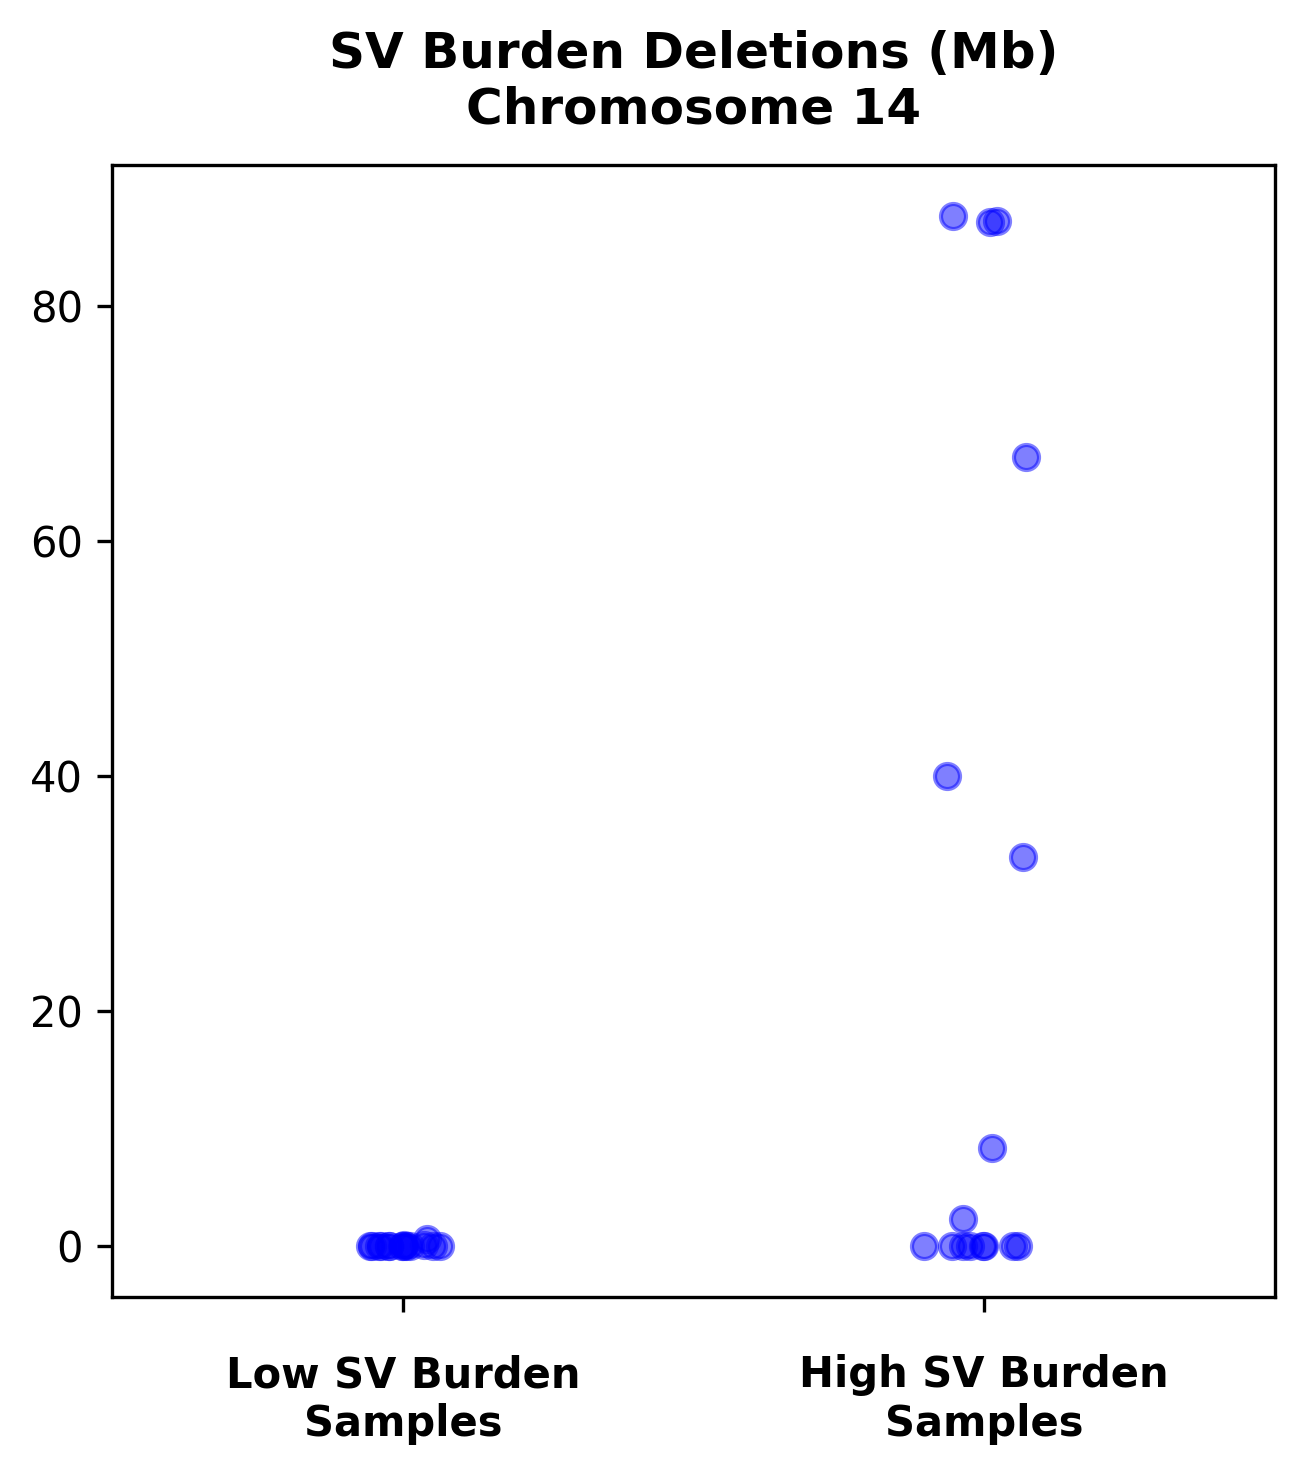

In [25]:
chrom = 'chr14'

temp_low_burden_by_chrom = []
temp_high_burden_by_chrom = []

###
for s_id in low_burden_sample_id:

    temp_low_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])

###
for s_id in high_burden_sample_id:

    temp_high_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])

# Perform T-test
t_stat, p_value = stats.ttest_ind(temp_low_burden_by_chrom, temp_high_burden_by_chrom, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
mpl.rcParams['font.family'] = 'sans-serif'

# Define data for plotting
data = [temp_low_burden_by_chrom, temp_high_burden_by_chrom]
positions = [1.5, 2.5]  
labels = ['Low SV Burden\nSamples', 'High SV Burden\nSamples']
colors = ['blue', 'blue']

# Add scatter plot with jitter for individual data points
for pos, single_data, color, label in zip(positions, data, colors, labels):
    jitter = np.random.normal(pos, 0.05, size=len(single_data))
    ax.scatter(jitter, single_data, alpha=0.5, color=color, label=label)

# Styling and labels
ax.set_title('SV Burden Deletions (Mb)\nChromosome 14', weight='bold', pad=10) 
ax.set_xticks(positions)
ax.set_xticklabels(labels, weight='bold')

# Adjust axis limits
ax.set_xlim(1, 3)
ax.tick_params(axis='x', pad=10)

plt.show()
fig.savefig('/Users/ryanyutian/Desktop/Manuscript/driver_heatmap/burden_comparison/del_chr14.png', dpi=300, bbox_inches='tight')

t-statistic: -2.25636192246282
p-value: 0.039400834720115026


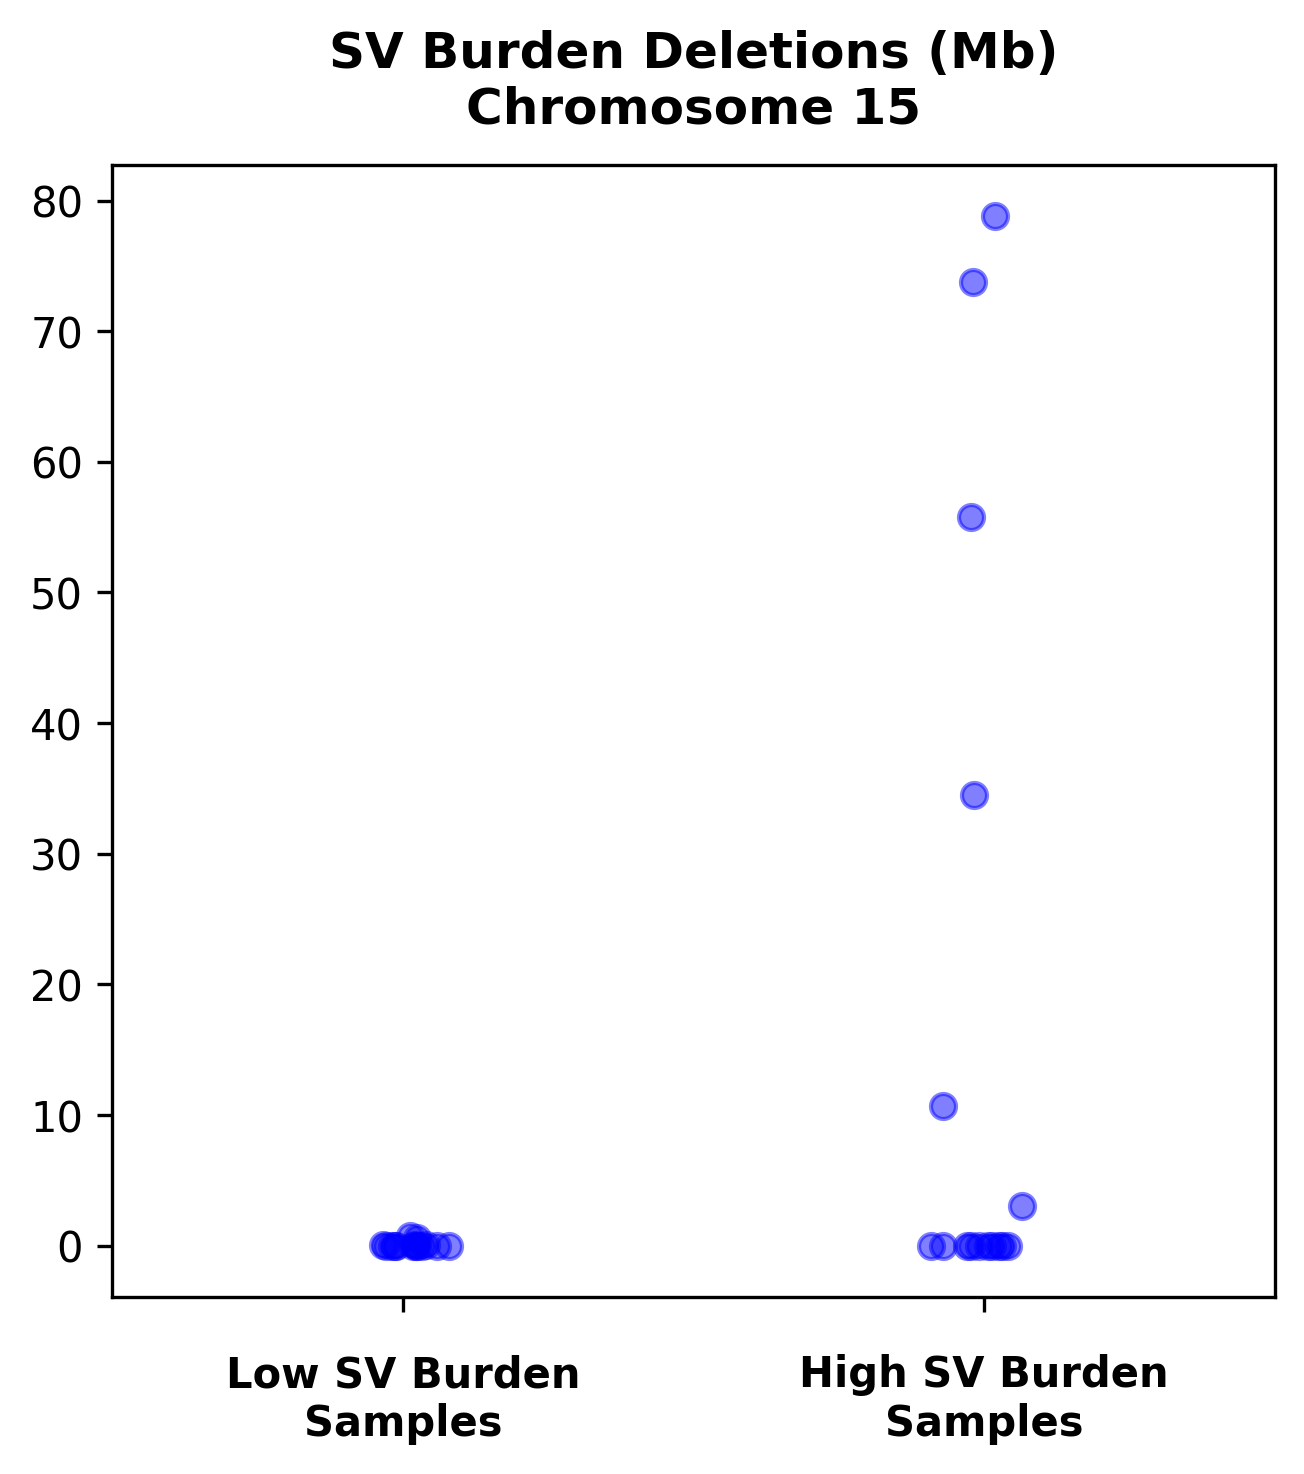

In [26]:
chrom = 'chr15'

temp_low_burden_by_chrom = []
temp_high_burden_by_chrom = []

###
for s_id in low_burden_sample_id:

    temp_low_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])

###
for s_id in high_burden_sample_id:

    temp_high_burden_by_chrom.append(large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom])

# Perform T-test
t_stat, p_value = stats.ttest_ind(temp_low_burden_by_chrom, temp_high_burden_by_chrom, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
mpl.rcParams['font.family'] = 'sans-serif'

# Define data for plotting
data = [temp_low_burden_by_chrom, temp_high_burden_by_chrom]
positions = [1.5, 2.5]  
labels = ['Low SV Burden\nSamples', 'High SV Burden\nSamples']
colors = ['blue', 'blue']

# Add scatter plot with jitter for individual data points
for pos, single_data, color, label in zip(positions, data, colors, labels):
    jitter = np.random.normal(pos, 0.05, size=len(single_data))
    ax.scatter(jitter, single_data, alpha=0.5, color=color, label=label)

# Styling and labels
ax.set_title('SV Burden Deletions (Mb)\nChromosome 15', weight='bold', pad=10) 
ax.set_xticks(positions)
ax.set_xticklabels(labels, weight='bold')

# Adjust axis limits
ax.set_xlim(1, 3)
ax.tick_params(axis='x', pad=10)

plt.show()
fig.savefig('/Users/ryanyutian/Desktop/Manuscript/driver_heatmap/burden_comparison/del_chr15.png', dpi=300, bbox_inches='tight')

t-statistic: -4.467370463990419
p-value: 0.00029554679026626225


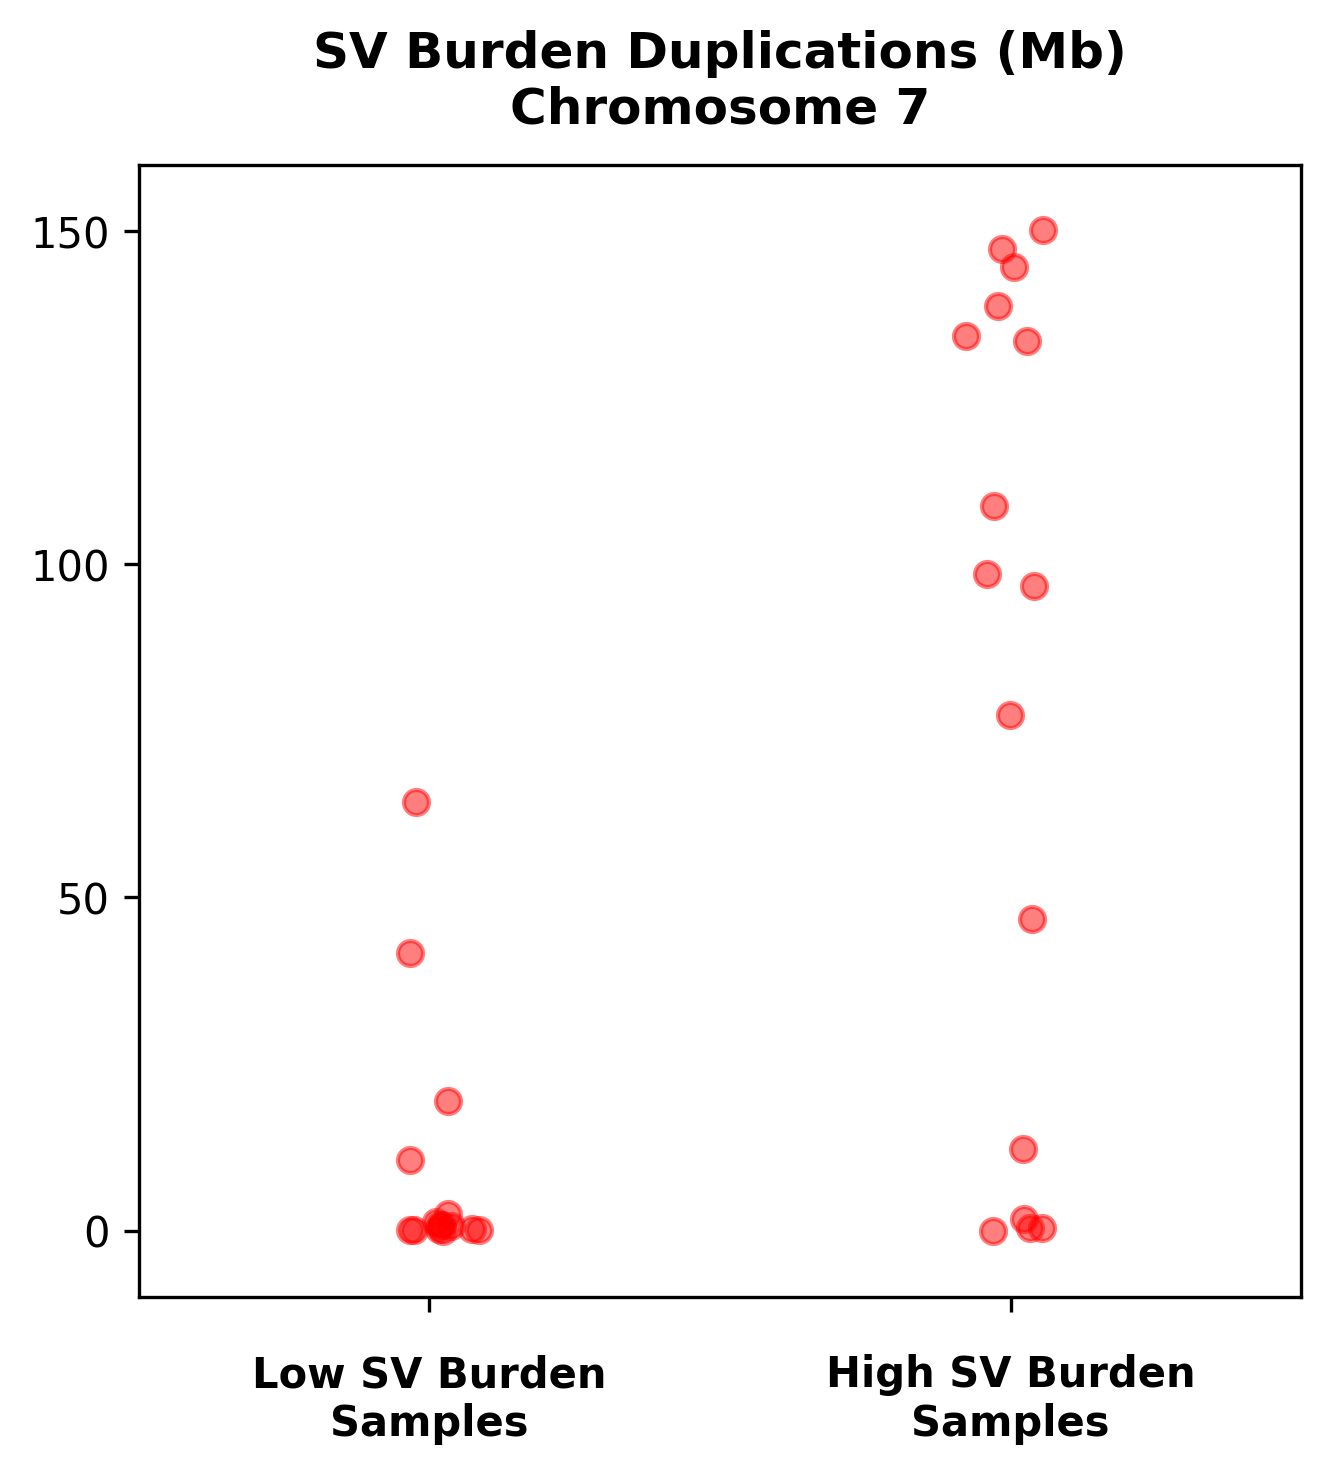

In [27]:
chrom = 'chr7'

temp_low_burden_by_chrom = []
temp_high_burden_by_chrom = []

###
for s_id in low_burden_sample_id:

    temp_low_burden_by_chrom.append(large_DUP_burden_per_chrom_dicts[s_id + '_DUP_burden_by_chrom'][chrom])

###
for s_id in high_burden_sample_id:

    temp_high_burden_by_chrom.append(large_DUP_burden_per_chrom_dicts[s_id + '_DUP_burden_by_chrom'][chrom])

# Perform T-test
t_stat, p_value = stats.ttest_ind(temp_low_burden_by_chrom, temp_high_burden_by_chrom, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
mpl.rcParams['font.family'] = 'sans-serif'

# Define data for plotting
data = [temp_low_burden_by_chrom, temp_high_burden_by_chrom]
positions = [1.5, 2.5]  
labels = ['Low SV Burden\nSamples', 'High SV Burden\nSamples']
colors = ['red', 'red']

# Add scatter plot with jitter for individual data points
for pos, single_data, color, label in zip(positions, data, colors, labels):
    jitter = np.random.normal(pos, 0.05, size=len(single_data))
    ax.scatter(jitter, single_data, alpha=0.5, color=color, label=label)

# Styling and labels
ax.set_title('SV Burden Duplications (Mb)\nChromosome 7', weight='bold', pad=10) 
ax.set_xticks(positions)
ax.set_xticklabels(labels, weight='bold')

# Adjust axis limits
ax.set_xlim(1, 3)
ax.set_ylim(-10, 160)
ax.set_yticks(range(0, 151, 50))
ax.tick_params(axis='x', pad=10)

plt.show()
fig.savefig('/Users/ryanyutian/Desktop/Manuscript/driver_heatmap/burden_comparison/dup_chr7.png', dpi=300, bbox_inches='tight')

t-statistic: -4.7290343419471945
p-value: 0.0002671694537938835


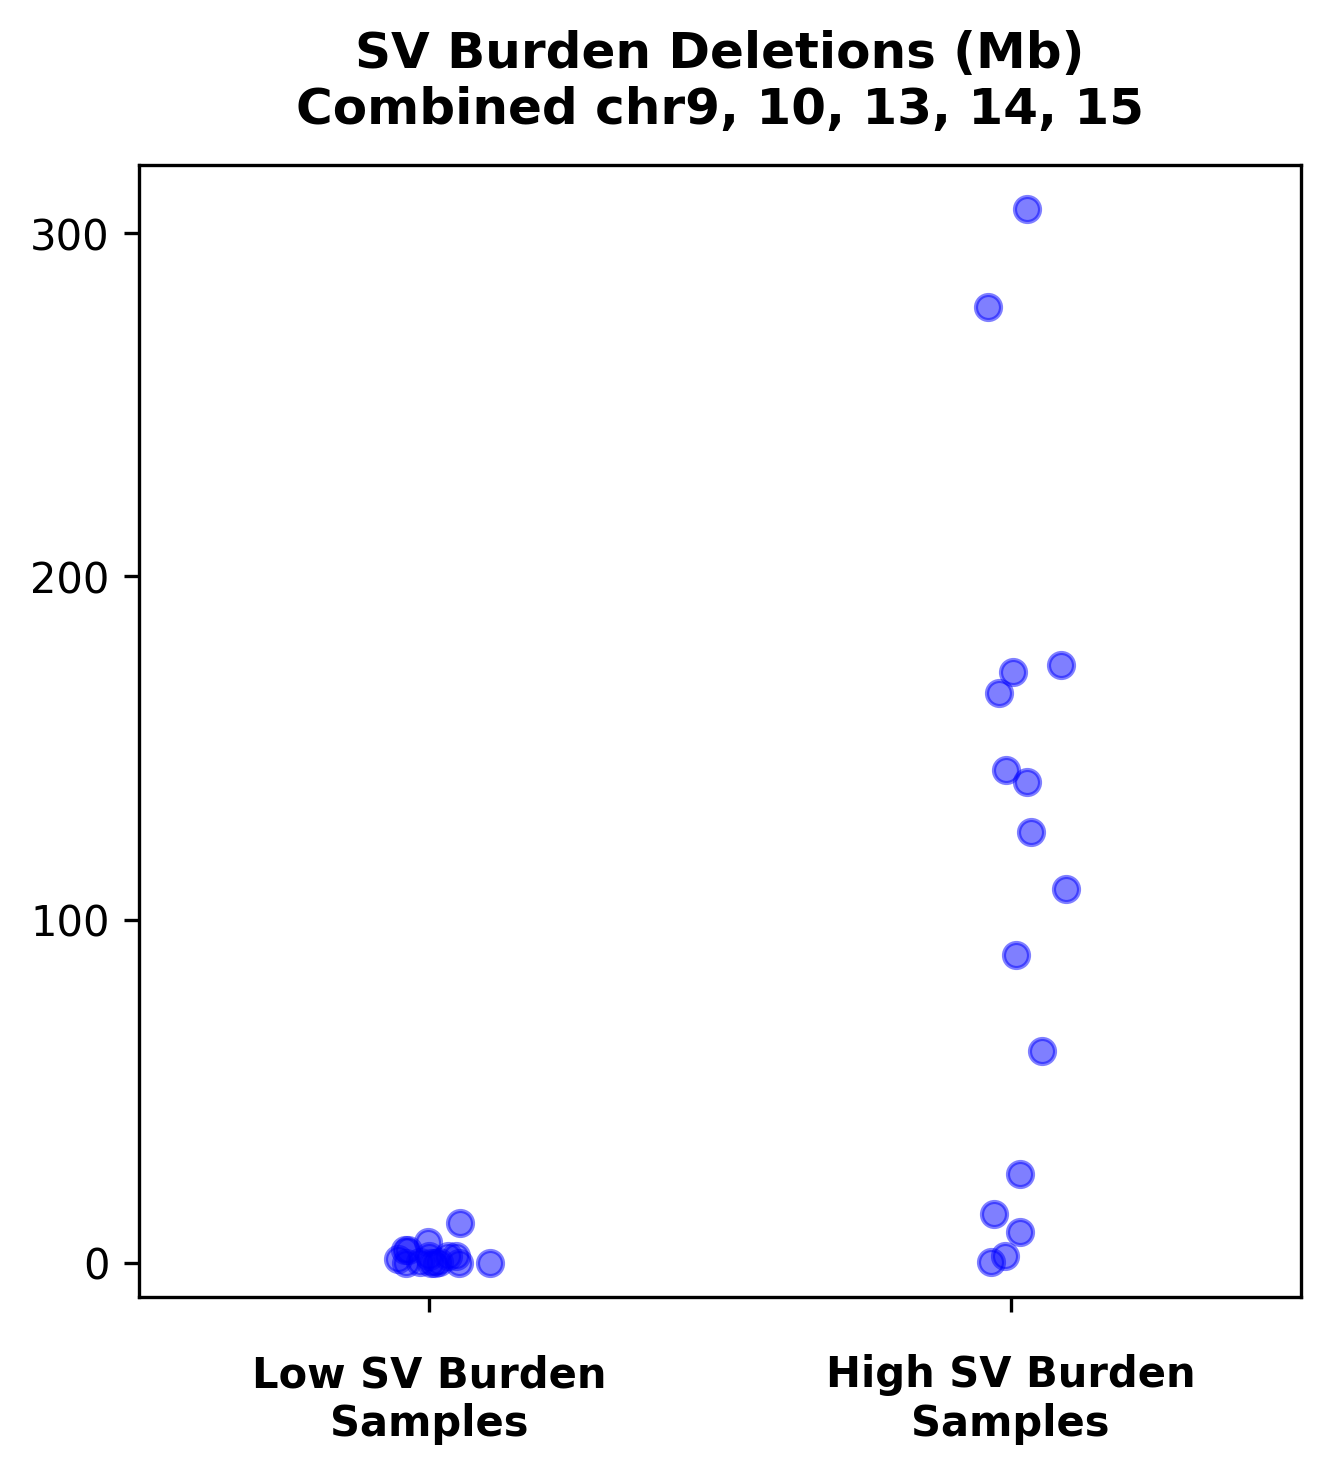

<Figure size 432x288 with 0 Axes>

In [28]:
temp_low_burden_by_chrom_dict = {}
temp_high_burden_by_chrom_dict = {}

for s_id in low_burden_sample_id:

    temp_low_burden_by_chrom_dict[s_id] = 0
    
for s_id in high_burden_sample_id:

    temp_high_burden_by_chrom_dict[s_id] = 0

for s_id in low_burden_sample_id:
    
    for chrom in ['chr9', 'chr10', 'chr13', 'chr14', 'chr15']:

        temp_low_burden_by_chrom_dict[s_id] += large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom]

for s_id in high_burden_sample_id:
    
    for chrom in ['chr9', 'chr10', 'chr13', 'chr14', 'chr15']:

        temp_high_burden_by_chrom_dict[s_id] += large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom]

temp_low_burden_by_chrom = [temp_low_burden_by_chrom_dict[i] for i in temp_low_burden_by_chrom_dict]
temp_high_burden_by_chrom = [temp_high_burden_by_chrom_dict[i] for i in temp_high_burden_by_chrom_dict]


# Perform T-test
t_stat, p_value = stats.ttest_ind(temp_low_burden_by_chrom, temp_high_burden_by_chrom, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
mpl.rcParams['font.family'] = 'sans-serif'

# Define data for plotting
data = [temp_low_burden_by_chrom, temp_high_burden_by_chrom]
positions = [1.5, 2.5]  
labels = ['Low SV Burden\nSamples', 'High SV Burden\nSamples']
colors = ['blue', 'blue']

# Add scatter plot with jitter for individual data points
for pos, single_data, color, label in zip(positions, data, colors, labels):
    jitter = np.random.normal(pos, 0.05, size=len(single_data))
    ax.scatter(jitter, single_data, alpha=0.5, color=color, label=label)

# Styling and labels
ax.set_title('SV Burden Deletions (Mb)\nCombined chr9, 10, 13, 14, 15', weight='bold', pad=10) 
ax.set_xticks(positions)
ax.set_xticklabels(labels, weight='bold') 

# Adjust axis limits
ax.set_xlim(1, 3)
ax.set_ylim(-10, 320)
ax.set_yticks(range(0, 301, 100))

# Increase the distance between the xticklabels and the plot
ax.tick_params(axis='x', pad=10)

plt.show()
plt.tight_layout()

fig.savefig('/Users/ryanyutian/Desktop/Manuscript/driver_heatmap/burden_comparison/del_combined.png', dpi=300, bbox_inches='tight')

t-statistic: -4.7290343419471945
p-value: 0.0002671694537938835


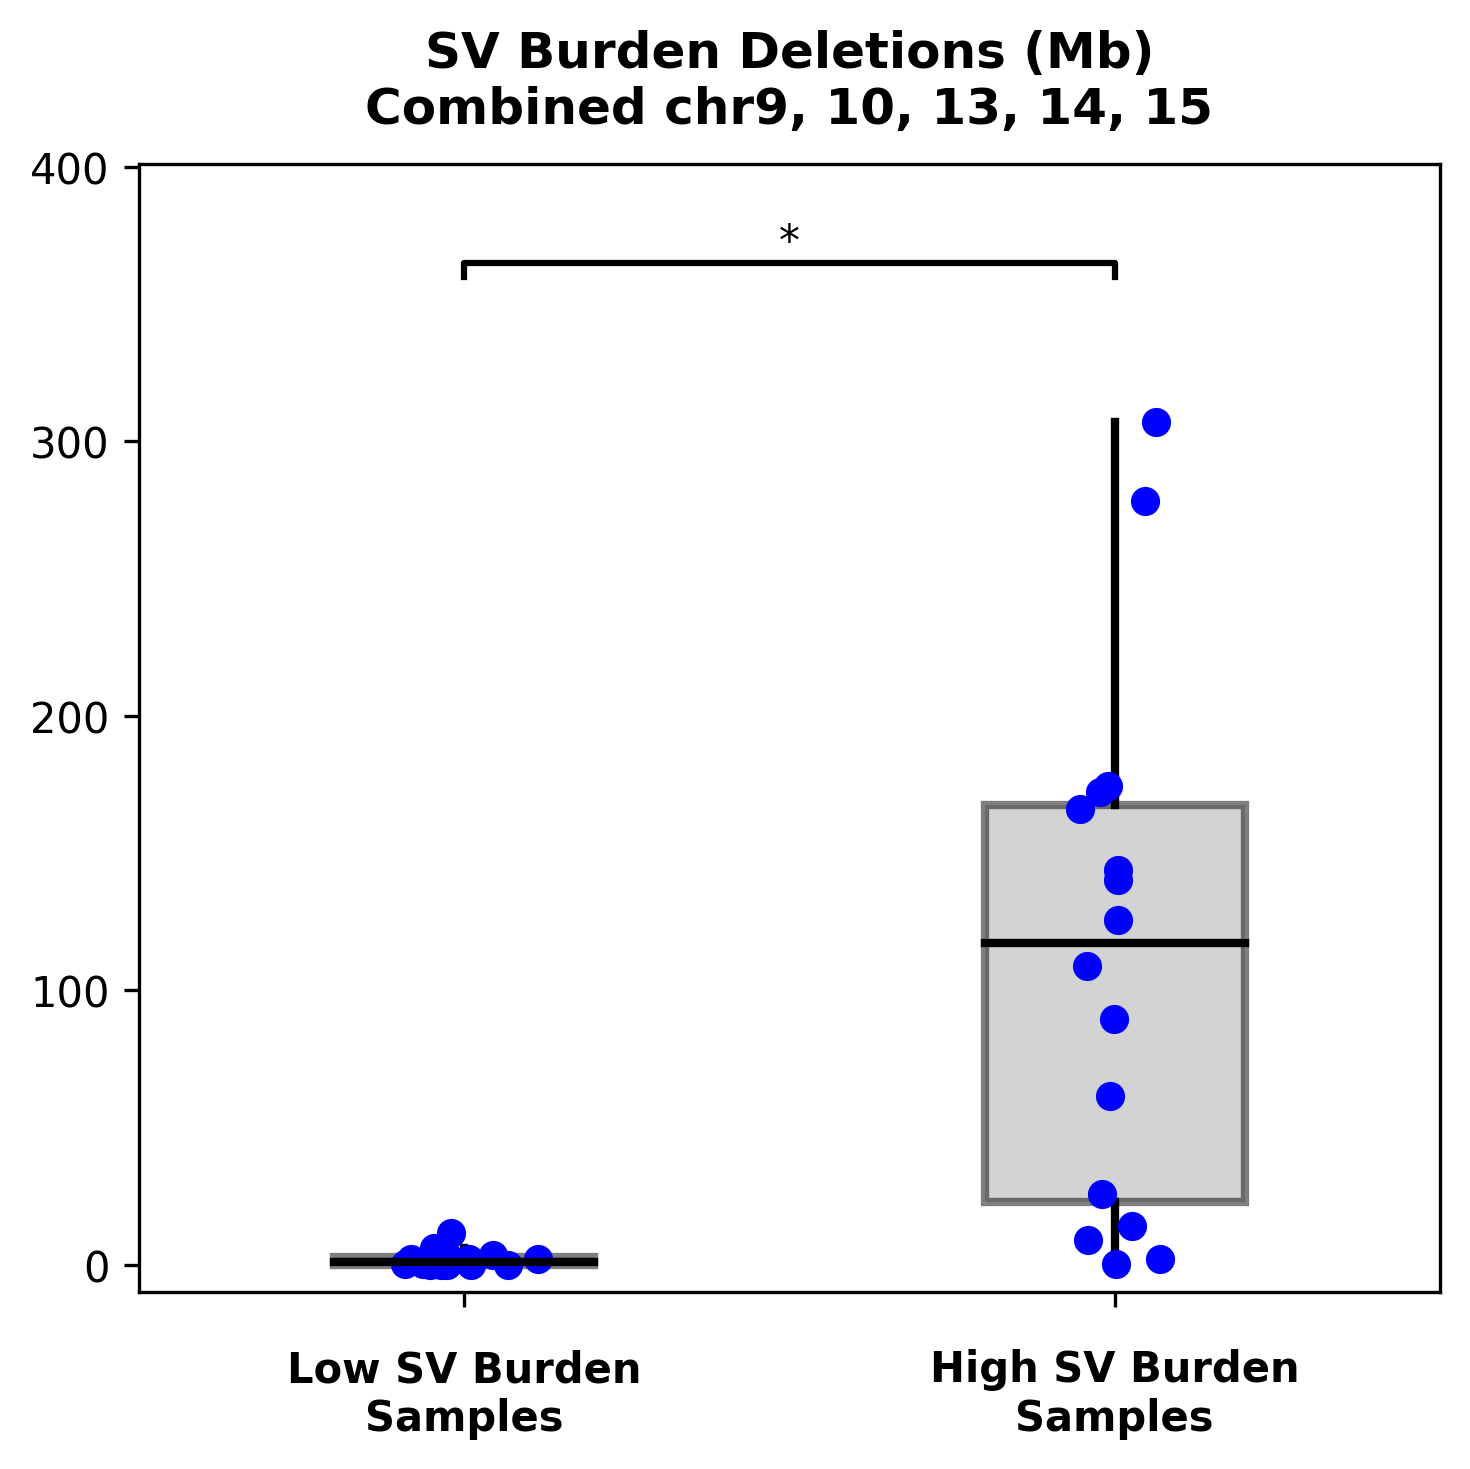

In [33]:
temp_low_burden_by_chrom_dict = {}
temp_high_burden_by_chrom_dict = {}

for s_id in low_burden_sample_id:

    temp_low_burden_by_chrom_dict[s_id] = 0
    
for s_id in high_burden_sample_id:

    temp_high_burden_by_chrom_dict[s_id] = 0

for s_id in low_burden_sample_id:
    
    for chrom in ['chr9', 'chr10', 'chr13', 'chr14', 'chr15']:

        temp_low_burden_by_chrom_dict[s_id] += large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom]

for s_id in high_burden_sample_id:
    
    for chrom in ['chr9', 'chr10', 'chr13', 'chr14', 'chr15']:

        temp_high_burden_by_chrom_dict[s_id] += large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom]

temp_low_burden_by_chrom = [temp_low_burden_by_chrom_dict[i] for i in temp_low_burden_by_chrom_dict]
temp_high_burden_by_chrom = [temp_high_burden_by_chrom_dict[i] for i in temp_high_burden_by_chrom_dict]

# Perform T-test
t_stat, p_value = stats.ttest_ind(temp_low_burden_by_chrom, temp_high_burden_by_chrom, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
mpl.rcParams['font.family'] = 'sans-serif'

# Define data for plotting
data = [temp_low_burden_by_chrom, temp_high_burden_by_chrom]
positions = [1.5, 2.5]
labels = ['Low SV Burden\nSamples', 'High SV Burden\nSamples']
colors = ['blue', 'blue']

# Add box plot
box = ax.boxplot(data, positions=positions, widths=0.4, patch_artist=True, showfliers=False, 
                 boxprops=dict(facecolor='darkgray', color='black', alpha=0.5, linewidth=2),
                 medianprops=dict(color='black', linewidth=2),
                 whiskerprops=dict(color='black', linewidth=2),
                 capprops=dict(color='none'))

# Add scatter plot 
for pos, single_data, color in zip(positions, data, colors):
    jitter = np.random.normal(pos, 0.05, size=len(single_data))
    ax.scatter(jitter, single_data, color=color, zorder=2)
    
# Styling and labels
ax.set_title('SV Burden Deletions (Mb)\nCombined chr9, 10, 13, 14, 15', weight='bold', pad=10)
ax.set_xticks(positions)
ax.set_xticklabels(labels, weight='bold')

# Adjust axis limits
ax.set_xlim(1, 3)
ax.set_ylim(-10, 401)
ax.set_yticks(range(0, 401, 100))

# Increase the distance between the xticklabels and the plot
ax.tick_params(axis='x', pad=10)

# Add significance bracket
x1, x2 = positions
y, h, col = 360, 5, 'k'  # Y-coordinate, height, and color
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

plt.tight_layout()
fig.savefig('/Users/ryanyutian/Desktop/Manuscript/driver_heatmap/burden_comparison/del_combined.png', dpi=300, bbox_inches='tight')
plt.show()


t-statistic: -4.7290343419471945
p-value: 0.0002671694537938835


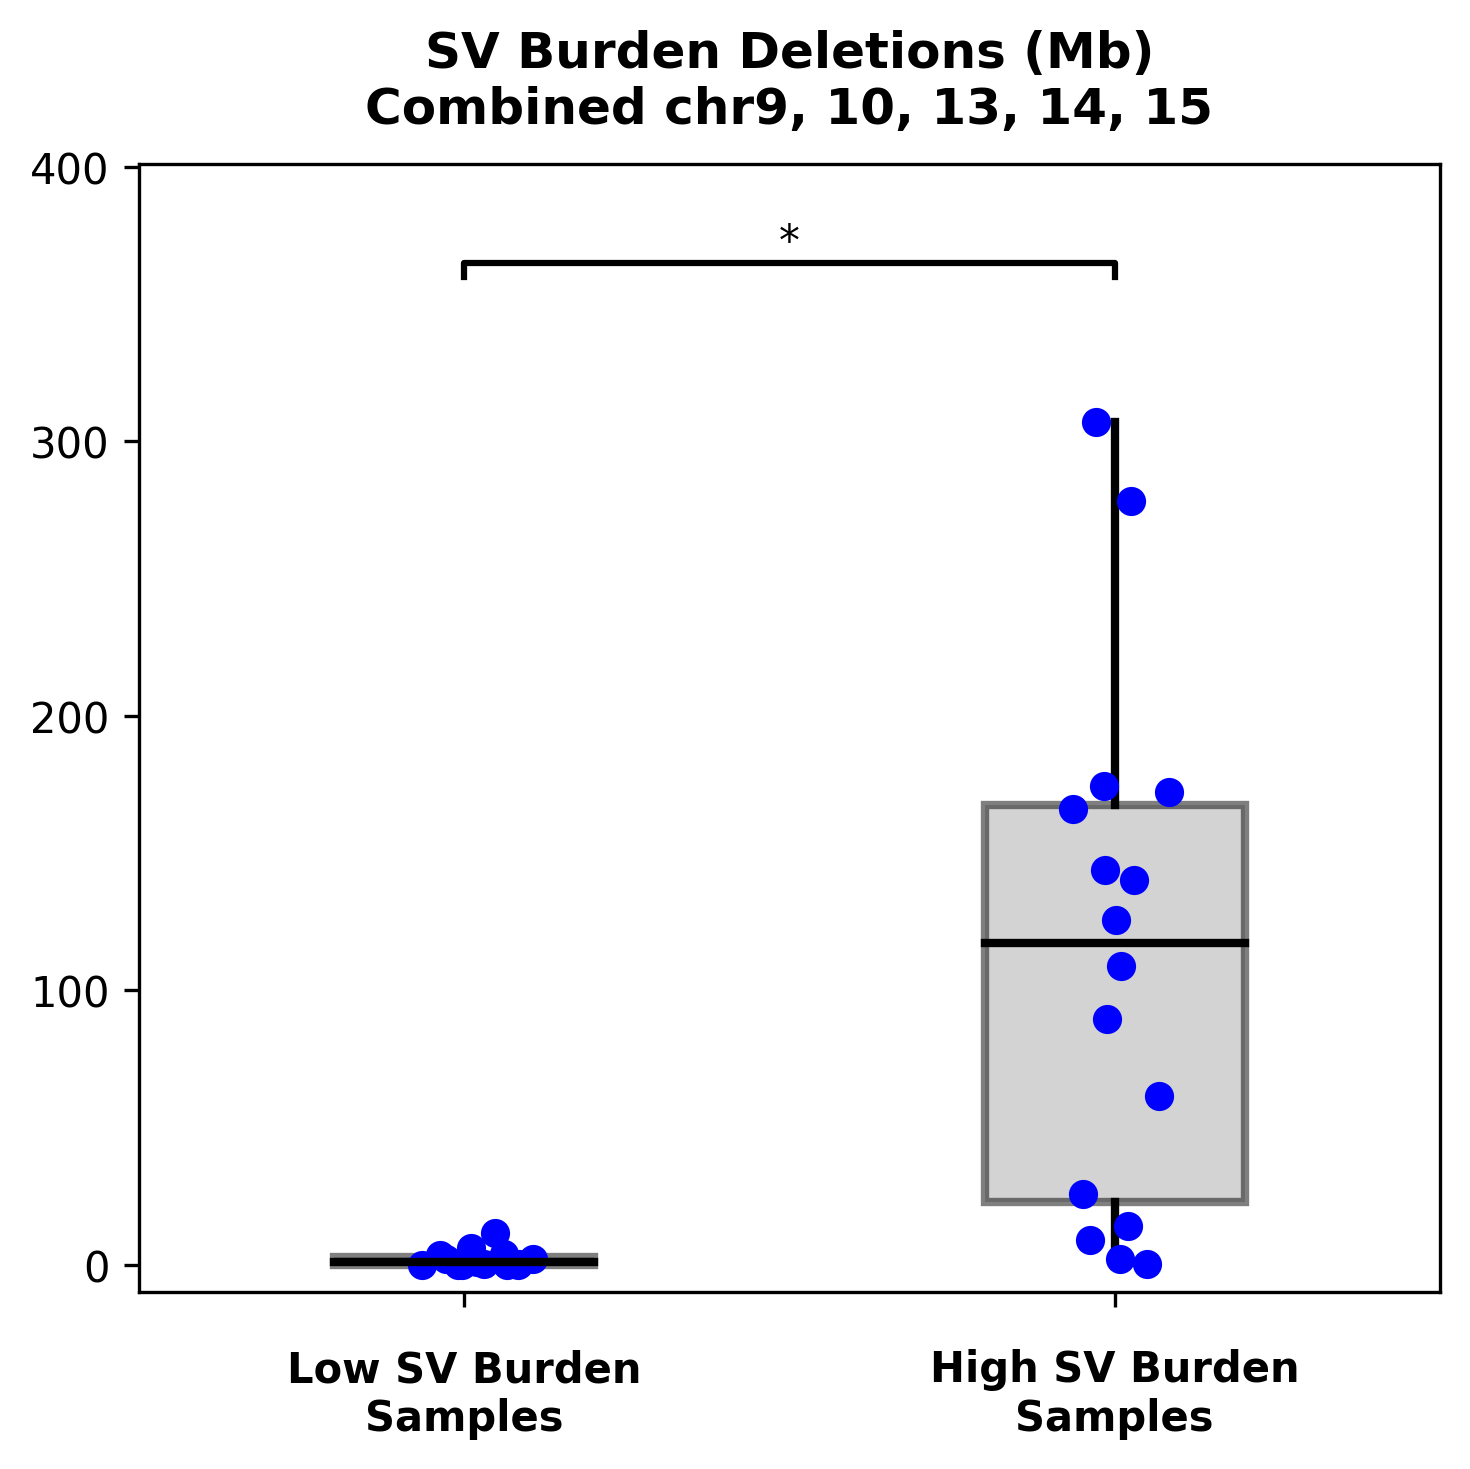

In [44]:
temp_low_burden_by_chrom_dict = {}
temp_high_burden_by_chrom_dict = {}

for s_id in low_burden_sample_id:

    temp_low_burden_by_chrom_dict[s_id] = 0
    
for s_id in high_burden_sample_id:

    temp_high_burden_by_chrom_dict[s_id] = 0

for s_id in low_burden_sample_id:
    
    for chrom in ['chr9', 'chr10', 'chr13', 'chr14', 'chr15']:

        temp_low_burden_by_chrom_dict[s_id] += large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom]

for s_id in high_burden_sample_id:
    
    for chrom in ['chr9', 'chr10', 'chr13', 'chr14', 'chr15']:

        temp_high_burden_by_chrom_dict[s_id] += large_DEL_burden_per_chrom_dicts[s_id + '_DEL_burden_by_chrom'][chrom]

temp_low_burden_by_chrom = [temp_low_burden_by_chrom_dict[i] for i in temp_low_burden_by_chrom_dict]
temp_high_burden_by_chrom = [temp_high_burden_by_chrom_dict[i] for i in temp_high_burden_by_chrom_dict]

# Perform T-test
t_stat, p_value = stats.ttest_ind(temp_low_burden_by_chrom, temp_high_burden_by_chrom, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
mpl.rcParams['font.family'] = 'sans-serif'

# Define data for plotting
data = [temp_low_burden_by_chrom, temp_high_burden_by_chrom]
positions = [1.5, 2.5]
labels = ['Low SV Burden\nSamples', 'High SV Burden\nSamples']
colors = ['blue', 'blue']

# Add box plot
box = ax.boxplot(data, positions=positions, widths=0.4, patch_artist=True, showfliers=False, 
                 boxprops=dict(facecolor='darkgray', color='black', alpha=0.5, linewidth=2),
                 medianprops=dict(color='black', linewidth=2),
                 whiskerprops=dict(color='black', linewidth=2),
                 capprops=dict(color='none'))

# Add scatter plot 
for pos, single_data, color in zip(positions, data, colors):
    jitter = np.random.normal(pos, 0.05, size=len(single_data))
    ax.scatter(jitter, single_data, color=color, zorder=2)
    
# Styling and labels
ax.set_title('SV Burden Deletions (Mb)\nCombined chr9, 10, 13, 14, 15', weight='bold', pad=10)
ax.set_xticks(positions)
ax.set_xticklabels(labels, weight='bold')

# Adjust axis limits
ax.set_xlim(1, 3)
ax.set_ylim(-10, 401)
ax.set_yticks(range(0, 401, 100))

# Increase the distance between the xticklabels and the plot
ax.tick_params(axis='x', pad=10)

# Add significance bracket
x1, x2 = positions
y, h, col = 360, 5, 'k'  # Y-coordinate, height, and color
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

plt.tight_layout()
fig.savefig('/Users/ryanyutian/Desktop/Manuscript/driver_heatmap/burden_comparison/del_combined.png', dpi=300, bbox_inches='tight')
plt.show()


t-statistic: -4.467370463990419
p-value: 0.00029554679026626225


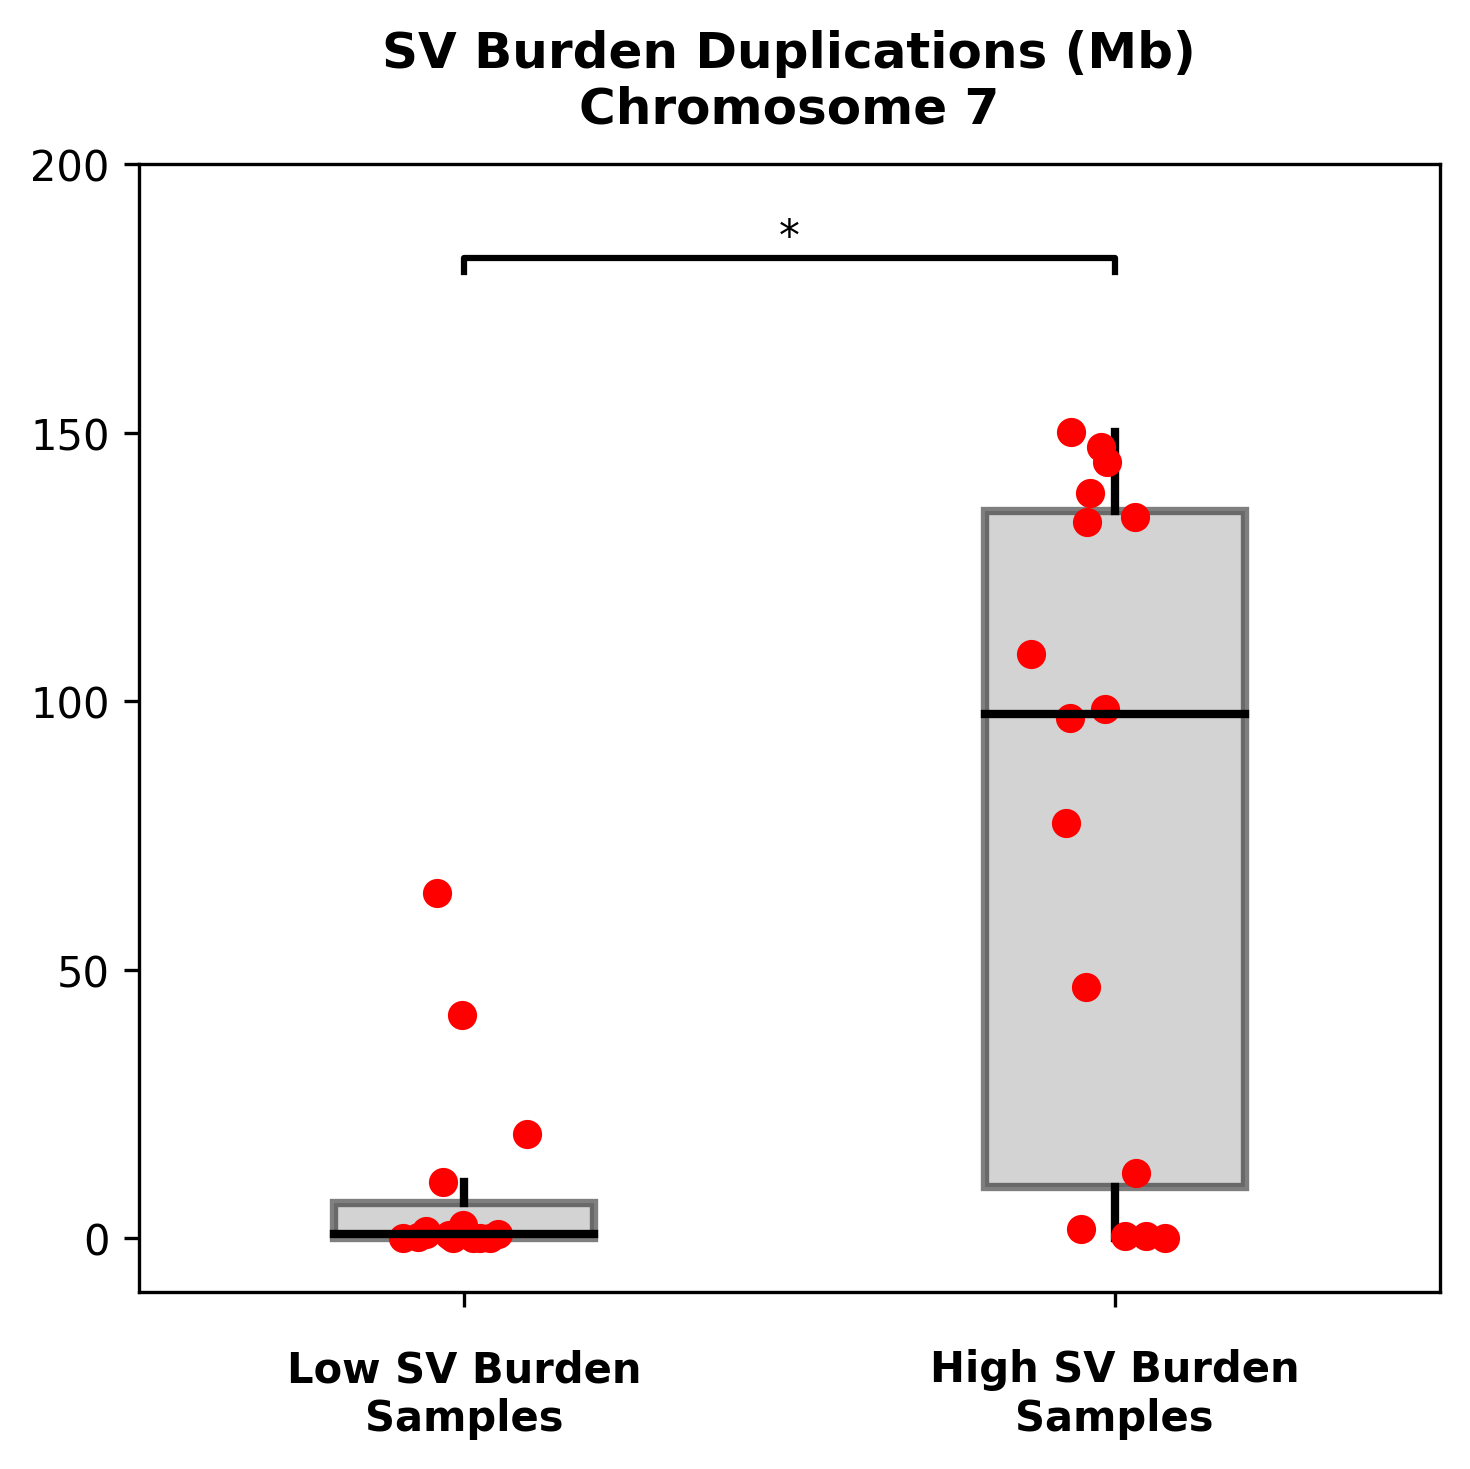

In [43]:
chrom = 'chr7'

temp_low_burden_by_chrom = []
temp_high_burden_by_chrom = []

###
for s_id in low_burden_sample_id:

    temp_low_burden_by_chrom.append(large_DUP_burden_per_chrom_dicts[s_id + '_DUP_burden_by_chrom'][chrom])

###
for s_id in high_burden_sample_id:

    temp_high_burden_by_chrom.append(large_DUP_burden_per_chrom_dicts[s_id + '_DUP_burden_by_chrom'][chrom])

# Perform T-test
t_stat, p_value = stats.ttest_ind(temp_low_burden_by_chrom, temp_high_burden_by_chrom, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
mpl.rcParams['font.family'] = 'sans-serif'

# Define data for plotting
data = [temp_low_burden_by_chrom, temp_high_burden_by_chrom]
positions = [1.5, 2.5]  
labels = ['Low SV Burden\nSamples', 'High SV Burden\nSamples']
colors = ['red', 'red']

# Add box plot
box = ax.boxplot(data, positions=positions, widths=0.4, patch_artist=True, showfliers=False, 
                 boxprops=dict(facecolor='darkgray', color='black', alpha=0.5, linewidth=2),
                 medianprops=dict(color='black', linewidth=2),
                 whiskerprops=dict(color='black', linewidth=2),
                 capprops=dict(color='none'))

# Add scatter plot 
for pos, single_data, color in zip(positions, data, colors):
    jitter = np.random.normal(pos, 0.05, size=len(single_data))
    ax.scatter(jitter, single_data, color=color, zorder=2)

# Styling and labels
ax.set_title('SV Burden Duplications (Mb)\nChromosome 7', weight='bold', pad=10) 
ax.set_xticks(positions)
ax.set_xticklabels(labels, weight='bold')

# Adjust axis limits
ax.set_xlim(1, 3)
ax.set_ylim(-10, 200)
ax.set_yticks(range(0, 201, 50))
ax.tick_params(axis='x', pad=10)

# Add significance bracket
x1, x2 = positions
y, h, col = 180, 2.5, 'k'  # Y-coordinate, height, and color
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

plt.tight_layout()
plt.show()
fig.savefig('/Users/ryanyutian/Desktop/Manuscript/driver_heatmap/burden_comparison/dup_chr7.png', dpi=300, bbox_inches='tight')